# AlphaPept Systems Check

This notebook will run several tests and compare the performance to MaxQuant. Depending on the machine, this can take several hours.
Each run is called via the `test_ci.py` script, which downloads files to a temporary folder which can be specified in this file.

This notebook requires the `matplotlib_venn` (`!pip install matplotlib_venn`) package.

## Reference Data

Download MaxQuant reference files. Referance MaxQuant data from `PXD006109` and `PXD010012` were taken from the paper, the others were analyzed with `MaxQuant_1.6.14`, default settings w/o second peptides and provided with the given contaminants file.

In [1]:
import os
import sys
sys.path.append(os.path.join(".."))
import test_ci

try:
    import wget
except ImportError:
    !pip install wget
    import wget
    
FILE_DICT = {}
#FILE_DICT['PXD006109_ref.txt'] = 'https://datashare.biochem.mpg.de/s/1E2G1IwgcgdsCHC/download' #OLD MQ FILES
#FILE_DICT['PXD006109_ref_evd.txt'] = 'https://datashare.biochem.mpg.de/s/Fn2uxeYNL60JSd3/download'

#FILE_DICT['PXD006109_ref.txt'] = 'https://datashare.biochem.mpg.de/s/vMNferEoSoROJbb/download' #AP Files
#FILE_DICT['PXD006109_ref_evd.txt'] = 'https://datashare.biochem.mpg.de/s/KLBotZbodMByigh/download'

FILE_DICT['PXD006109_ref.txt'] = 'https://datashare.biochem.mpg.de/s/fLhxQ8mVb29x9xH/download'
FILE_DICT['PXD006109_ref_evd.txt'] = 'https://datashare.biochem.mpg.de/s/BkMMHPregCQgKLg/download'
FILE_DICT['PXD010012_ref.txt'] = 'https://datashare.biochem.mpg.de/s/ps226k7Fme1K0jf/download'
FILE_DICT['PXD010012_ref_evd.txt'] = 'https://datashare.biochem.mpg.de/s/pyhKMrytjdDU2sX/download'
FILE_DICT['bruker_HeLa_evd.txt'] = 'https://datashare.biochem.mpg.de/s/fRcoGuwlcbH2SBJ/download'
FILE_DICT['thermo_HeLa_evd.txt'] = 'https://datashare.biochem.mpg.de/s/p4Omj9K5hHmSoDl/download'

tmp_folder = os.path.join(os.getcwd(),'temp/')


BASE_DIR = os.path.join(tmp_folder , 'test_files/') # Storarge location for test files
TEST_DIR = os.path.join(tmp_folder, 'test_temp/')
ARCHIVE_DIR = os.path.join(tmp_folder, ' test_archive/')

MONGODB_USER = 'github_actions'
MONGODB_URL = 'ci.yue0n.mongodb.net/'

if not os.path.isdir(tmp_folder):
    os.mkdir(tmp_folder)


test_ci.config_test_paths(BASE_DIR, TEST_DIR, ARCHIVE_DIR, MONGODB_USER, MONGODB_URL)

for file in FILE_DICT:
    target = os.path.join(tmp_folder, file)
    if not os.path.isfile(target):
        wget.download(FILE_DICT[file], target)
        
software_1 = 'AlphaPept'
software_2 = 'MaxQuant'

## Single Files

Compare to the single HeLa test files

### Thermo IRT

In [2]:
%run -i ../test_ci.py $tmp_folder thermo_irt

2021-05-30 23:57:56> Logging to C:\Users\admin\alphapept\logs\log_20210530235756.txt.
2021-05-30 23:57:56> Platform information:
2021-05-30 23:57:56> system     - Windows
2021-05-30 23:57:56> release    - 10
2021-05-30 23:57:56> version    - 10.0.18362
2021-05-30 23:57:56> machine    - AMD64
2021-05-30 23:57:56> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2021-05-30 23:57:56> cpu count  - 24
2021-05-30 23:57:56> ram memory - 122.0/127.7 Gb (available/total)
2021-05-30 23:57:56> 
2021-05-30 23:57:56> Python information:
2021-05-30 23:57:56> SQLAlchemy     - 1.3.22
2021-05-30 23:57:56> alphapept      - 0.3.24
2021-05-30 23:57:56> biopython      - 1.78
2021-05-30 23:57:56> click          - 7.1.2
2021-05-30 23:57:56> comtypes       - 1.1.7
2021-05-30 23:57:56> fastcore       - 1.3.5
2021-05-30 23:57:56> h5py           - 3.2.1
2021-05-30 23:57:56> lxml           - 4.6.2
2021-05-30 23:57:56> matplotlib     - 3.3.3
2021-05-30 23:57:57> nbdev          - 1.1.5
2021-05-30 23:

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-30 23:57:57> FASTA contains 247 entries.


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [00:29<00:00, 29.33s/it]

2021-05-30 23:58:26> Digested 247 proteins and generated 50,840 spectra
2021-05-30 23:58:27> Database saved to F:\alphapept\sandbox\temp\test_temp\database.hdf. Filesize of database is 0.02 GB



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-30 23:58:27> Processing 1 files for step raw_conversion
2021-05-30 23:58:27> File F:\alphapept\sandbox\temp/test_temp\thermo_IRT has extension .raw - converting from Thermo.


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [00:34<00:00, 34.89s/it]

2021-05-30 23:58:32> File conversion complete. Extracted 2,603 precursors.
2021-05-30 23:58:32> File conversion of file F:\alphapept\sandbox\temp/test_temp\thermo_IRT.raw complete.
2021-05-30 23:58:32> init



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-30 23:58:40> Processing 1 files for step find_features
2021-05-30 23:58:40> No *.hdf file with features found for F:\alphapept\sandbox\temp/test_temp\thermo_IRT.ms_data.hdf. Adding to feature finding list.
2021-05-30 23:58:40> Feature finding on F:\alphapept\sandbox\temp/test_temp\thermo_IRT.raw
2021-05-30 23:58:43> Number of hills 45,516, len = 20.18
2021-05-30 23:58:43> Repeating hill extraction with centroid_tol 5.10
2021-05-30 23:58:44> Number of hills 52,919, len = 21.29
2021-05-30 23:58:49> After split hill_ptrs 79,545
2021-05-30 23:58:50> After filter hill_ptrs 77,220
2021-05-30 23:59:03> Extracting hill stats complete
2021-05-30 23:59:05> Found 7,527 pre isotope patterns.
2021-05-30 23:59:19> Extracted 7,135 isotope patterns.
2021-05-30 23:59:25> Report complete.
2021-05-30 23:59:25> Note: NumExpr detected 24 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2021-05-30 23:59:25> NumExpr defaulting to 8 threads.
2021-05-30 23:59:25> Matching features


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-30 23:59:26> Starting first search.
2021-05-30 23:59:26> Processing 1 files for step search_db
2021-05-30 23:59:26> Calibrating fragments
2021-05-30 23:59:28> Performing search on 3,187 query and 50,840 db entries with frag_tol = 30.00 and prec_tol = 30.00.


  0%|                                                                                            | 0/1 [00:49<?, ?it/s]


2021-05-30 23:59:32> Compared 12,726 spectra and found 51 psms.
2021-05-30 23:59:32> Extracting columns for scoring.
2021-05-30 23:59:37> Extracted columns from 51 spectra.
2021-05-30 23:59:37> Saving first_search results to F:\alphapept\sandbox\temp/test_temp\thermo_IRT.ms_data.hdf
2021-05-30 23:59:37> Search of file F:\alphapept\sandbox\temp/test_temp\thermo_IRT.raw complete.
2021-05-30 23:59:37> First search complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-30 23:59:37> Processing 1 files for step calibrate_hdf
2021-05-30 23:59:38> Scoring using X-Tandem
2021-05-30 23:59:38> Last q_value 0.000 of dataset is smaller than fdr_level 0.010
2021-05-30 23:59:38> 17 target (0 decoy) of 17 PSMs. fdr 0.000000 for a cutoff of 18.90 (set fdr was 0.01)
2021-05-30 23:59:38> Not enough data points present. Skipping recalibration.
2021-05-30 23:59:38> Calibration of file F:\alphapept\sandbox\temp/test_temp\thermo_IRT.ms_data.hdf complete.
2021-05-30 23:59:38> Calibrating fragments
2021-05-30 23:59:38> Median fragment offset 2.35 - std 13.98 ppm




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-30 23:59:38> Starting second search with DB.
2021-05-30 23:59:38> Processing 1 files for step search_db
2021-05-30 23:59:38> Found calibrated prec_tol with value 7.72
2021-05-30 23:59:38> Performing search on 3,187 query and 50,840 db entries with frag_tol = 30.00 and prec_tol = 7.72.
2021-05-30 23:59:38> Compared 3,428 spectra and found 47 psms.
2021-05-30 23:59:38> Extracting columns for scoring.
2021-05-30 23:59:38> Extracted columns from 47 spectra.
2021-05-30 23:59:38> Saving second_search results to F:\alphapept\sandbox\temp/test_temp\thermo_IRT.ms_data.hdf
2021-05-30 23:59:38> Search of file F:\alphapept\sandbox\temp/test_temp\thermo_IRT.raw complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-30 23:59:38> Second search complete.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-30 23:59:38> Processing 1 files for step score_hdf
2021-05-30 23:59:39> Found second search psms for scoring.
2021-05-30 23:59:39> Last q_value 0.000 of dataset is smaller than fdr_level 0.100
2021-05-30 23:59:39> 17 target (0 decoy) of 17 PSMs. fdr 0.000000 for a cutoff of 18.90 (set fdr was 0.1)
2021-05-30 23:59:39> The total number of available decoys is lower than the initial set of high scoring targets.
2021-05-30 23:59:39> ML failed. Defaulting to x_tandem score
2021-05-30 23:59:39> There are fewer high scoring targets or decoys than required by 'min_train'.
2021-05-30 23:59:39> Converting x_tandem score to probabilities
2021-05-30 23:59:39> Filter df with custom score
2021-05-30 23:59:39> Global FDR on precursor
2021-05-30 23:59:39> Last q_value 0.000 of dataset is smaller than fdr_level 0.010
2021-05-30 23:59:39> 17 target (0 decoy) of 17 PSMs. fdr 0.000000 for a cutoff of 0.09 (set fdr was 0.01)
2021-05-30 23:59:39> FDR on peptides complete. For 0.01 FDR found 17 targe


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-30 23:59:39> Fasta dict with length 247, Pept dict with length 50,842
2021-05-30 23:59:39> Extracting protein groups.





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


2021-05-30 23:59:40> A total of 13 unique and 0 shared peptides.
2021-05-30 23:59:40> A total of 0 ambigious proteins
2021-05-30 23:59:40> A total of 0 unique and 0 shared peptides.
2021-05-30 23:59:40> A total of 0 ambigious proteins
2021-05-30 23:59:40> Global FDR on protein_group
2021-05-30 23:59:40> Last q_value 0.000 of dataset is smaller than fdr_level 0.010
2021-05-30 23:59:40> 3 target (0 decoy) of 3 PSMs. fdr 0.000000 for a cutoff of 0.11 (set fdr was 0.01)
2021-05-30 23:59:40> FDR on proteins complete. For 0.01 FDR found 17 targets and 0 decoys. A total of 3 proteins found.
2021-05-30 23:59:40> Saving complete.
2021-05-30 23:59:40> Protein groups complete.
2021-05-30 23:59:40> Complete. 
2021-05-30 23:59:40> Starting profile extraction.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2605: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block5_values] [items->Index(['ion_int', 'ion_types', 'naked_sequence', 'precursor', 'sequence',
       'filename', 'shortname', 'protein', 'protein_group', 'razor',
       'protein_idx', 'n_possible_proteins'],
      dtype='object')]

  pytables.to_hdf(

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-30 23:59:40> LFQ complete.
2021-05-30 23:59:40> Exporting as csv.
2021-05-30 23:59:40> Saved df of length 17 saved to F:\alphapept\sandbox\temp\test_temp\results


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.85it/s]


2021-05-30 23:59:40> Settings saved to F:\alphapept\sandbox\temp\test_temp\results.yaml
2021-05-30 23:59:40> Analysis complete.


### Thermo HeLa

In [3]:
%run -i ../test_ci.py $tmp_folder thermo_hela

2021-05-30 23:59:41> Creating dir F:\alphapept\sandbox\temp/test_temp.
2021-05-30 23:59:43> Logging to C:\Users\admin\alphapept\logs\log_20210530235943.txt.
2021-05-30 23:59:43> Platform information:
2021-05-30 23:59:43> system     - Windows
2021-05-30 23:59:43> release    - 10
2021-05-30 23:59:43> version    - 10.0.18362
2021-05-30 23:59:43> machine    - AMD64
2021-05-30 23:59:43> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2021-05-30 23:59:43> cpu count  - 24
2021-05-30 23:59:43> ram memory - 119.0/127.7 Gb (available/total)
2021-05-30 23:59:43> 
2021-05-30 23:59:43> Python information:
2021-05-30 23:59:43> SQLAlchemy     - 1.3.22
2021-05-30 23:59:43> alphapept      - 0.3.24
2021-05-30 23:59:43> biopython      - 1.78
2021-05-30 23:59:43> click          - 7.1.2
2021-05-30 23:59:43> comtypes       - 1.1.7
2021-05-30 23:59:43> fastcore       - 1.3.5
2021-05-30 23:59:43> h5py           - 3.2.1
2021-05-30 23:59:43> lxml           - 4.6.2
2021-05-30 23:59:43> matplotlib


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-30 23:59:44> FASTA contains 36,789 entries.


  0%|                                                                                            | 0/1 [01:30<?, ?it/s]

  3%|█▋                                                              | 0.02702702702702703/1 [01:27<52:25, 3232.64s/it]
  5%|███▍                                                            | 0.05405405405405406/1 [01:29<21:46, 1381.47s/it]
  8%|█████▎                                                           | 0.08108108108108109/1 [01:31<12:02, 785.82s/it]
 11%|███████                                                          | 0.10810810810810811/1 [01:33<07:30, 505.25s/it]
 14%|████████▊                                                        | 0.13513513513513514/1 [01:35<04:55, 342.14s/it]
 16%|██████████▌                                                      | 0.16216216216216217/1 [01:37<03:30, 250.74s/it]
 19%|████████████▍                                                     | 0.1891891891891892/1 [01:38<02:30, 185.16s/it]
 22%|██████████████                    

2021-05-31 00:02:29> Digested 36,789 proteins and generated 9,107,982 spectra
2021-05-31 00:03:54> Database saved to F:\alphapept\sandbox\temp\test_temp\database.hdf. Filesize of database is 3.42 GB


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 00:04:09> Processing 1 files for step raw_conversion
2021-05-31 00:04:09> File F:\alphapept\sandbox\temp/test_temp\thermo_HeLa has extension .raw - converting from Thermo.
2021-05-31 00:06:23> File conversion complete. Extracted 120,226 precursors.
2021-05-31 00:06:24> File conversion of file F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 00:06:24> Processing 1 files for step find_features
2021-05-31 00:06:24> No *.hdf file with features found for F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf. Adding to feature finding list.
2021-05-31 00:06:25> Feature finding on F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw
2021-05-31 00:06:31> Number of hills 1,105,353, len = 17.35
2021-05-31 00:06:31> Repeating hill extraction with centroid_tol 5.87
2021-05-31 00:06:37> Number of hills 1,227,331, len = 19.44
2021-05-31 00:06:56> After split hill_ptrs 1,635,903
2021-05-31 00:06:57> After filter hill_ptrs 1,585,989


  0%|                                                                                            | 0/1 [02:49<?, ?it/s]


2021-05-31 00:09:53> Extracting hill stats complete
2021-05-31 00:10:06> Found 190,099 pre isotope patterns.
2021-05-31 00:11:12> Extracted 223,430 isotope patterns.
2021-05-31 00:11:15> Report complete.
2021-05-31 00:11:15> Matching features to query data.
2021-05-31 00:11:17> Saving feature table.
2021-05-31 00:11:17> Feature table saved to F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf
2021-05-31 00:11:17> Saving features.
2021-05-31 00:11:17> Feature finding of file F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 00:11:17> Starting first search.
2021-05-31 00:11:17> Processing 1 files for step search_db
2021-05-31 00:11:17> Calibrating fragments


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2021-05-31 00:11:35> Performing search on 258,808 query and 9,107,982 db entries with frag_tol = 30.00 and prec_tol = 30.00.
2021-05-31 00:12:35> Compared 300,348,940 spectra and found 2,922,767 psms.
2021-05-31 00:12:35> Extracting columns for scoring.


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [14:03<00:00, 843.62s/it]
  0%|                                                                                            | 0/1 [07:21<?, ?it/s]


2021-05-31 00:18:38> Extracted columns from 2,922,767 spectra.
2021-05-31 00:18:38> Saving first_search results to F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf
2021-05-31 00:18:48> Search of file F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.
2021-05-31 00:19:18> First search complete.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 00:19:18> Processing 1 files for step calibrate_hdf
2021-05-31 00:19:23> Scoring using X-Tandem
2021-05-31 00:19:29> 38,757 target (387 decoy) of 105628 PSMs. fdr 0.009985 for a cutoff of 26.98 (set fdr was 0.01)
2021-05-31 00:19:32> Calibration of file F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf complete.
2021-05-31 00:19:32> Calibrating fragments
2021-05-31 00:19:35> Median fragment offset -6.01 - std 14.38 ppm




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 00:19:36> Starting second search with DB.
2021-05-31 00:19:36> Processing 1 files for step search_db
2021-05-31 00:19:36> Found calibrated prec_tol with value 3.09
2021-05-31 00:19:38> Performing search on 258,808 query and 9,107,982 db entries with frag_tol = 30.00 and prec_tol = 3.09.


  0%|                                                                                            | 0/1 [00:27<?, ?it/s]


2021-05-31 00:19:46> Compared 34,838,834 spectra and found 554,297 psms.
2021-05-31 00:19:46> Extracting columns for scoring.


  0%|                                                                                            | 0/1 [08:44<?, ?it/s]


2021-05-31 00:20:56> Extracted columns from 554,297 spectra.
2021-05-31 00:20:56> Saving second_search results to F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf
2021-05-31 00:20:58> Search of file F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.
2021-05-31 00:21:26> Second search complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 00:21:27> Processing 1 files for step score_hdf
2021-05-31 00:21:28> Found second search psms for scoring.
2021-05-31 00:21:37> 62,731 target (6,273 decoy) of 88923 PSMs. fdr 0.099998 for a cutoff of 20.77 (set fdr was 0.1)
2021-05-31 00:21:38> Training & cross-validation on 13558 targets and 13558 decoys
2021-05-31 00:21:57> The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 50, 'clf__max_leaf_nodes': 250}
2021-05-31 00:21:58> The train accuracy was 0.9384127452426612
2021-05-31 00:21:58> Testing on 54232 targets and 54232 decoys
2021-05-31 00:21:58> The test accuracy was 0.9094353887003983
2021-05-31 00:21:58> Top features {'y_hits': 0.236096141193671, 'x_tandem': 0.22325033984117407, 'hits': 0.16613947852981925, 'matched_ion_fraction': 0.05436845652472752, 'n_ions': 0.04454040065659487, 'matched_int_ratio': 0.03942089240441735, 'n_missed': 0.03581233304906717, 'matched_int': 0.023223844522476875, 'b_hits': 0.020184197937078315, 'dist': 0.01317


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 00:22:23> Fasta dict with length 36,789, Pept dict with length 9,107,988
2021-05-31 00:22:23> Extracting protein groups.





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 00:22:24> A total of 42,947 unique and 2,871 shared peptides.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


2021-05-31 00:22:25> A total of 879 ambigious proteins
2021-05-31 00:22:25> A total of 480 unique and 33 shared peptides.
2021-05-31 00:22:25> A total of 33 ambigious proteins
2021-05-31 00:22:26> Global FDR on protein_group
2021-05-31 00:22:26> 5,876 target (58 decoy) of 7124 PSMs. fdr 0.009871 for a cutoff of 0.97 (set fdr was 0.01)
2021-05-31 00:22:26> FDR on proteins complete. For 0.01 FDR found 51,697 targets and 66 decoys. A total of 5,934 proteins found.
2021-05-31 00:22:28> Saving complete.
2021-05-31 00:22:28> Protein groups complete.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2605: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['ion_int', 'ion_types', 'naked_sequence', 'precursor', 'sequence',
       'filename', 'shortname', 'protein', 'protein_group', 'razor',
       'protein_idx'],
      dtype='object')]

  pytables.to_hdf(


2021-05-31 00:22:28> Complete. 
2021-05-31 00:22:28> Starting profile extraction.



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.39it/s]

2021-05-31 00:22:29> LFQ complete.
2021-05-31 00:22:29> Exporting as csv.
2021-05-31 00:22:31> Saved df of length 51,763 saved to F:\alphapept\sandbox\temp\test_temp\results


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.19s/it]


2021-05-31 00:22:38> Settings saved to F:\alphapept\sandbox\temp\test_temp\results.yaml
2021-05-31 00:22:38> Analysis complete.


In [4]:
try:
    import matplotlib_venn
except ModuleNotFoundError:
    !pip install matplotlib_venn
    import matplotlib_venn

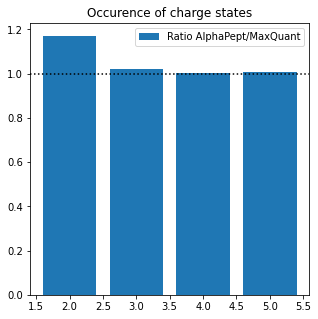

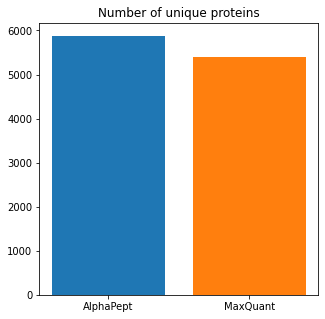

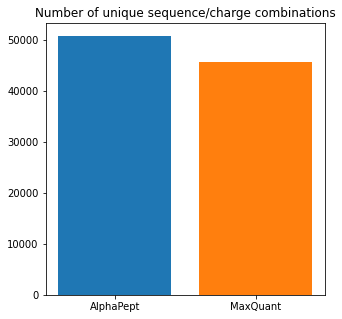

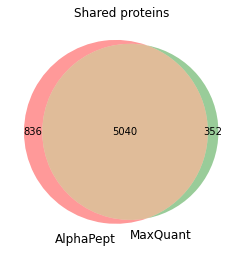

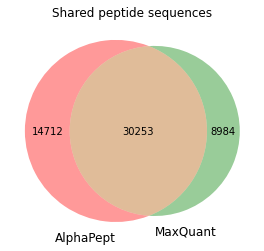

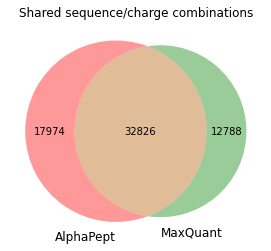

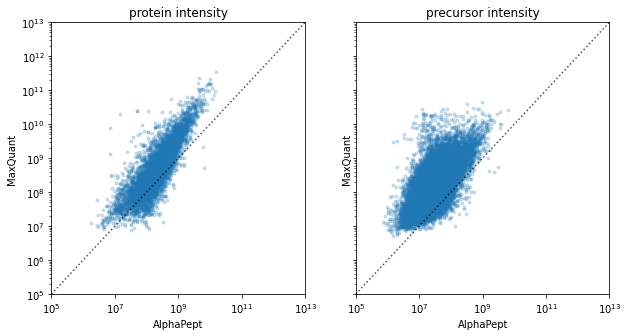

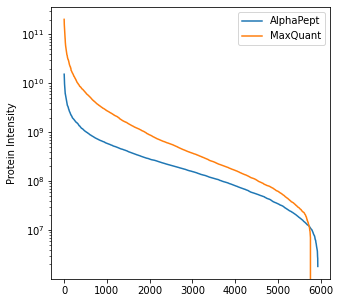

In [5]:
from test_helper import prepare_files, compare_field, compare_populations, compare_intensities, protein_rank
import os

df1, df2 = prepare_files(os.path.join(TEST_DIR,'results.hdf'), os.path.join(tmp_folder,'thermo_HeLa_evd.txt'))
for field in ['charge','protein','precursor']:
    compare_field(df1, df2, software_1, software_2, field)
    
for field in ['protein','sequence','precursor']:
    compare_populations(df1, df2, software_1, software_2, field)
    
compare_intensities(df1, df2,software_1, software_2)

protein_rank(df1, df2,software_1, software_2)

### Calling custom steps of the pipeline

Work with already processed results and call individual steps

--- ML ---
2021-05-31 00:22:53> 62,731 target (6,273 decoy) of 88923 PSMs. fdr 0.099998 for a cutoff of 20.77 (set fdr was 0.1)
2021-05-31 00:22:54> Training & cross-validation on 13558 targets and 13558 decoys
2021-05-31 00:23:12> The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 50, 'clf__max_leaf_nodes': 250}
2021-05-31 00:23:12> The train accuracy was 0.9384127452426612
2021-05-31 00:23:12> Testing on 54232 targets and 54232 decoys
2021-05-31 00:23:13> The test accuracy was 0.9094353887003983
2021-05-31 00:23:13> Top features {'y_hits': 0.236096141193671, 'x_tandem': 0.22325033984117407, 'hits': 0.16613947852981925, 'matched_ion_fraction': 0.05436845652472752, 'n_ions': 0.04454040065659487, 'matched_int_ratio': 0.03942089240441735, 'n_missed': 0.03581233304906717, 'matched_int': 0.023223844522476875, 'b_hits': 0.020184197937078315, 'dist': 0.013171912450855335, 'mz': 0.010693239446886564, 'o_mass': 0.01002136471231672, 'y-NH3_hits': 0.00991378781719965

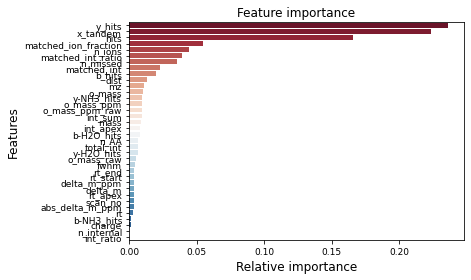

2021-05-31 00:23:13> Filter df with x_tandem score
2021-05-31 00:23:19> Global FDR on precursor
2021-05-31 00:23:19> 51,658 target (516 decoy) of 86708 PSMs. fdr 0.009989 for a cutoff of 0.82 (set fdr was 0.01)


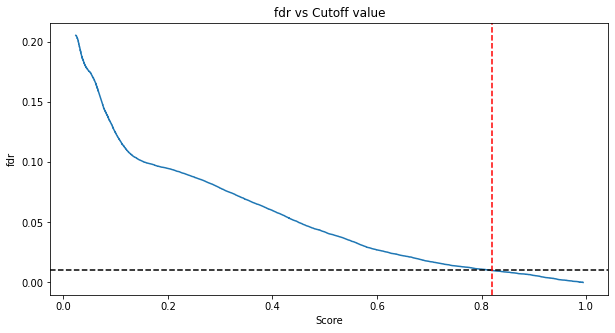

C:\Users\admin\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


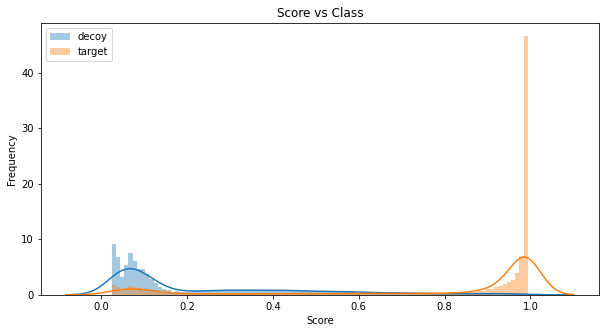

--- x! ---
2021-05-31 00:23:20> Filter df with x_tandem score
2021-05-31 00:23:20> Global FDR on precursor
2021-05-31 00:23:21> Last q_value 0.010 of dataset is smaller than fdr_level 0.010
2021-05-31 00:23:21> 51,658 target (516 decoy) of 52174 PSMs. fdr 0.009989 for a cutoff of 20.78 (set fdr was 0.01)


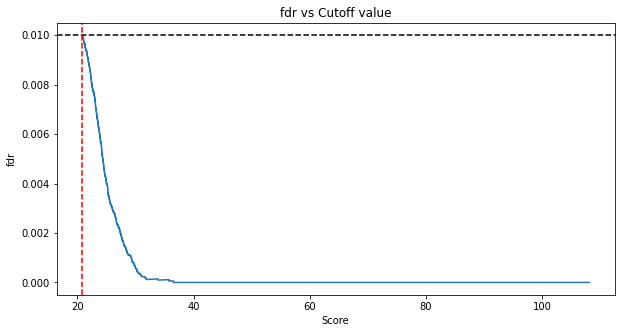

C:\Users\admin\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


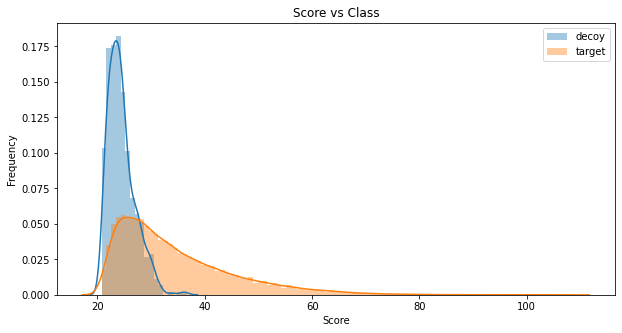

In [6]:
import alphapept.io
from alphapept.score import get_ML_features, filter_with_ML, filter_with_x_tandem, cut_global_fdr, train_RF

ms_file = alphapept.io.MS_Data_File(os.path.join(TEST_DIR,'thermo_HeLa.ms_data.hdf'))

df = ms_file.read(dataset_name='second_search')
df = get_ML_features(df)

print('--- ML ---')
cv, features = train_RF(df, plot=True)
df = filter_with_ML(df, cv, features = features)
df = cut_global_fdr(df, analyte_level='precursor',  plot=True)

print('--- x! ---')
df = filter_with_x_tandem(df)
df = cut_global_fdr(df, analyte_level='precursor',  plot=True)

# Quantification Test

This notebook will run `PXD006109` and `PXD010012` and compare the quantificaiton performance.

## PXD006109

In [7]:
%run -i ../test_ci.py $tmp_folder PXD006109 
#test_ci.main(runtype="PXD006109", new_files=False)

2021-05-31 00:23:23> Creating dir F:\alphapept\sandbox\temp/test_temp.
2021-05-31 00:23:29> Logging to C:\Users\admin\alphapept\logs\log_20210531002329.txt.
2021-05-31 00:23:29> Platform information:
2021-05-31 00:23:29> system     - Windows
2021-05-31 00:23:29> release    - 10
2021-05-31 00:23:29> version    - 10.0.18362
2021-05-31 00:23:29> machine    - AMD64
2021-05-31 00:23:29> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2021-05-31 00:23:29> cpu count  - 24
2021-05-31 00:23:29> ram memory - 112.0/127.7 Gb (available/total)
2021-05-31 00:23:29> 
2021-05-31 00:23:29> Python information:
2021-05-31 00:23:29> SQLAlchemy     - 1.3.22
2021-05-31 00:23:29> alphapept      - 0.3.24
2021-05-31 00:23:29> biopython      - 1.78
2021-05-31 00:23:29> click          - 7.1.2
2021-05-31 00:23:29> comtypes       - 1.1.7
2021-05-31 00:23:29> fastcore       - 1.3.5
2021-05-31 00:23:29> h5py           - 3.2.1
2021-05-31 00:23:29> lxml           - 4.6.2
2021-05-31 00:23:29> matplotlib


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 00:23:31> FASTA contains 43,752 entries.



  0%|                                                                                            | 0/1 [02:15<?, ?it/s]

  5%|██▊                                                            | 0.045454545454545456/1 [01:09<20:20, 1278.57s/it]
  7%|████▍                                                            | 0.06818181818181818/1 [01:09<10:57, 705.94s/it]
  9%|█████▉                                                           | 0.09090909090909091/1 [01:20<09:20, 616.53s/it]
 11%|███████▍                                                         | 0.11363636363636363/1 [01:33<08:40, 587.60s/it]
 14%|████████▊                                                        | 0.13636363636363635/1 [01:35<06:02, 419.39s/it]
 16%|██████████▌                                                       | 0.1590909090909091/1 [01:37<04:22, 312.28s/it]
 18%|███████████▊                                                     | 0.18181818181818182/1 [01:38<03:13, 235.99s/it]
 20%|█████████████▎                   

2021-05-31 00:25:59> Digested 43,752 proteins and generated 6,163,992 spectra
2021-05-31 00:26:58> Database saved to F:\alphapept\sandbox\temp\test_temp\database.hdf. Filesize of database is 2.33 GB


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 00:27:09> Processing 6 files for step raw_conversion
AlphaPool was set to 24 processes. Setting max to 24.


 67%|████████████████████████████████████████████▋                      | 0.6666666666666666/1 [01:26<00:32, 98.65s/it]

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 00:28:36> Processing 6 files for step find_features
2021-05-31 00:28:36> Setting Process limit to 15
AlphaPool was set to 15 processes. Setting max to 15.




 17%|██████████▋                                                     | 0.16666666666666666/1 [06:35<32:55, 2371.08s/it]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 00:35:11> Starting first search.
2021-05-31 00:35:11> Processing 6 files for step search_db
2021-05-31 00:35:11> Searching. Setting Process limit to 20.
AlphaPool was set to 20 processes. Setting max to 20.





 17%|██████████▊                                                      | 0.16666666666666666/1 [01:57<09:49, 707.16s/it]


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [10:22<00:00, 622.82s/it]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [08:56<00:00, 536.21s/it]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [14:09<00:00, 849.88s/it]


2021-05-31 00:37:48> First search complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 00:37:48> Processing 6 files for step calibrate_hdf
AlphaPool was set to 24 processes. Setting max to 24.


 67%|████████████████████████████████████████████▋                      | 0.6666666666666666/1 [00:15<00:05, 17.35s/it]
  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 00:38:03> Starting second search with DB.
2021-05-31 00:38:03> Processing 6 files for step search_db
2021-05-31 00:38:03> Searching. Setting Process limit to 19.
AlphaPool was set to 19 processes. Setting max to 19.



 17%|██████████▊                                                      | 0.16666666666666666/1 [00:45<03:47, 272.81s/it]
100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [01:06<00:00, 66.88s/it]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [03:50<00:00, 230.81s/it]


2021-05-31 00:39:11> Second search complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 00:39:12> Processing 6 files for step score_hdf
AlphaPool was set to 24 processes. Setting max to 24.


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [01:31<00:00, 91.30s/it]


2021-05-31 00:40:55> Total deviation before calibration {'mz': 3.9967441111809955e-06, 'rt': 7.578102484848466}
2021-05-31 00:40:55> Mean deviation before calibration {'mz': 2.6644960741206635e-07, 'rt': 0.505206832323231}
2021-05-31 00:40:55> Solving equation system
2021-05-31 00:40:55> Regression score is 0.9997649641360891
2021-05-31 00:40:55> Solving equation system complete.
2021-05-31 00:40:55> Applying offset
2021-05-31 00:40:56> Saving F:\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_1.ms_data.hdf - peptide_fdr.
2021-05-31 00:40:56> Saving F:\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_1.ms_data.hdf - feature_table.
2021-05-31 00:40:56> Saving F:\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_2.ms_data.hdf - peptide_fdr.
2021-05-31 00:40:56> Saving F:\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_2.ms_data.hdf - feature_table.
2021-05-31 00:40:57> Saving F:\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_3.ms_data.hdf - peptide_fdr.
2021-05-31 00:40:57> Savin

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 00:41:12> Fasta dict with length 43,752, Pept dict with length 6,163,998
2021-05-31 00:41:12> Extracting protein groups.




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


2021-05-31 00:41:14> A total of 58,659 unique and 11,724 shared peptides.
2021-05-31 00:41:19> A total of 2029 ambigious proteins
2021-05-31 00:41:20> A total of 1,730 unique and 213 shared peptides.
2021-05-31 00:41:20> A total of 202 ambigious proteins
2021-05-31 00:41:21> Global FDR on protein_group
2021-05-31 00:41:22> 6,959 target (69 decoy) of 10699 PSMs. fdr 0.009915 for a cutoff of 0.94 (set fdr was 0.01)
2021-05-31 00:41:23> FDR on proteins complete. For 0.01 FDR found 251,377 targets and 190 decoys. A total of 7,028 proteins found.
2021-05-31 00:41:34> Saving complete.
2021-05-31 00:41:34> Protein groups complete.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2605: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['ion_int', 'ion_types', 'naked_sequence', 'precursor', 'sequence',
       'filename', 'shortname', 'protein', 'protein_group', 'razor',
       'protein_idx'],
      dtype='object')]

  pytables.to_hdf(


2021-05-31 00:41:35> Delayed Normalization.
2021-05-31 00:41:36> Setting minimum occurence to 5.0


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


2021-05-31 00:41:39> Complete. 
2021-05-31 00:41:39> Starting profile extraction.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2605: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['ion_int', 'ion_types', 'naked_sequence', 'precursor', 'sequence',
       'filename', 'shortname', 'protein', 'protein_group', 'razor',
       'protein_idx'],
      dtype='object')]

  pytables.to_hdf(
  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 00:41:40> Preparing protein table for parallel processing.


 20%|█████████████▎                                                     | 0.1993739328400683/1 [00:08<00:30, 38.12s/it]

2021-05-31 00:41:48> Starting protein extraction for 7028 proteins.
AlphaPool was set to 24 processes. Setting max to 24.


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [03:51<00:00, 253.17s/it]

2021-05-31 00:45:37> LFQ complete.
2021-05-31 00:45:37> Exporting as csv.
2021-05-31 00:45:48> Saved df of length 251,567 saved to F:\alphapept\sandbox\temp\test_temp\results
2021-05-31 00:45:55> Settings saved to F:\alphapept\sandbox\temp\test_temp\results.yaml
2021-05-31 00:45:55> Analysis complete.


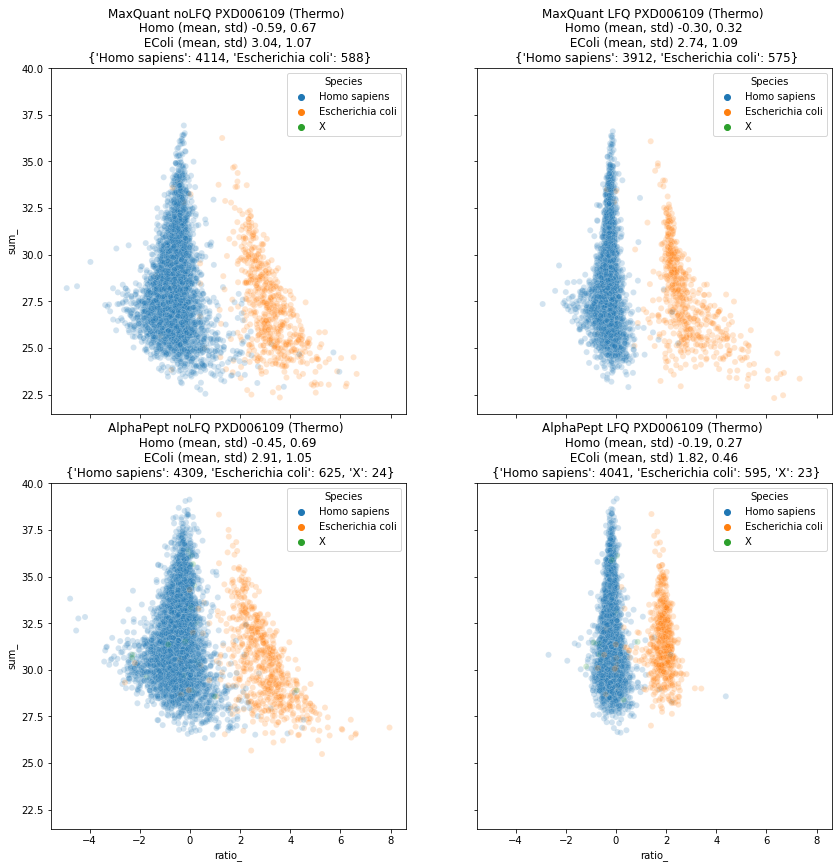

In [8]:
from test_helper import get_plot_df, add_species_column
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

fig, axes = plt.subplots(2, 2, figsize=(14,14), sharex=True,sharey=True)

ref = pd.read_csv(os.path.join(tmp_folder,'PXD006109_ref.txt'), sep='\t') 
no_rev_cont = [(x[0]!="+") & (x[1] !="+") for x in ref[["Reverse","Potential contaminant"]].values]
ref = ref[no_rev_cont]
add_species_column(ref)
ref['Species'] = ref['Species'].replace(np.nan, "X")

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = 'LFQ i'
    else:
        x = 'I'
        
    base_columns = [f"{x}ntensity Shotgun_02-01_{i}" for i in range(1,4)]
    ratio_columns = [f"{x}ntensity Shotgun_12-01_{i}" for i in range(1,4)]

    id_ = 'MaxQuant ' +_+' PXD006109 (Thermo)'
    get_plot_df(ref, base_columns, ratio_columns, axes[0,j], id_)


path = os.path.join(TEST_DIR, 'results.hdf') #TEST_DIR as set in test_ci.py
ref = pd.read_hdf(path, 'protein_table')
ref.columns = [os.path.split(_)[1].replace('.ms_data.hdf','') for _ in ref.columns]


species = []
for _ in ref.index:
    if 'HUMAN' in _:
        species.append('Homo sapiens')
    elif 'ECO' in _:
        species.append('Escherichia coli')
    else:
        species.append('X')
        
ref['Species'] = species

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = '_LFQ'
    else:
        x = ''
        
    base_columns = [f"PXD006109_HeLa2_{i}{x}" for i in range(1,4)]
    ratio_columns = [f"PXD006109_HeLa12_{i}{x}" for i in range(1,4)]

    id_ = 'AlphaPept ' +_+' PXD006109 (Thermo)'
    get_plot_df(ref, base_columns, ratio_columns, axes[1,j], id_)

plt.show()

## CV plot

<ipython-input-9-65f12a426c22>:22: RuntimeWarning: invalid value encountered in true_divide
  cv = np.nanstd(ref[base_columns + ratio_columns], axis=1) / np.nanmean(ref[base_columns + ratio_columns], axis=1)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\lib\nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
<ipython-input-9-65f12a426c22>:52: RuntimeWarning: Mean of empty slice
  cv = np.nanstd(ref[base_columns + ratio_columns], axis=1) / np.nanmean(ref[base_columns + ratio_columns], axis=1)


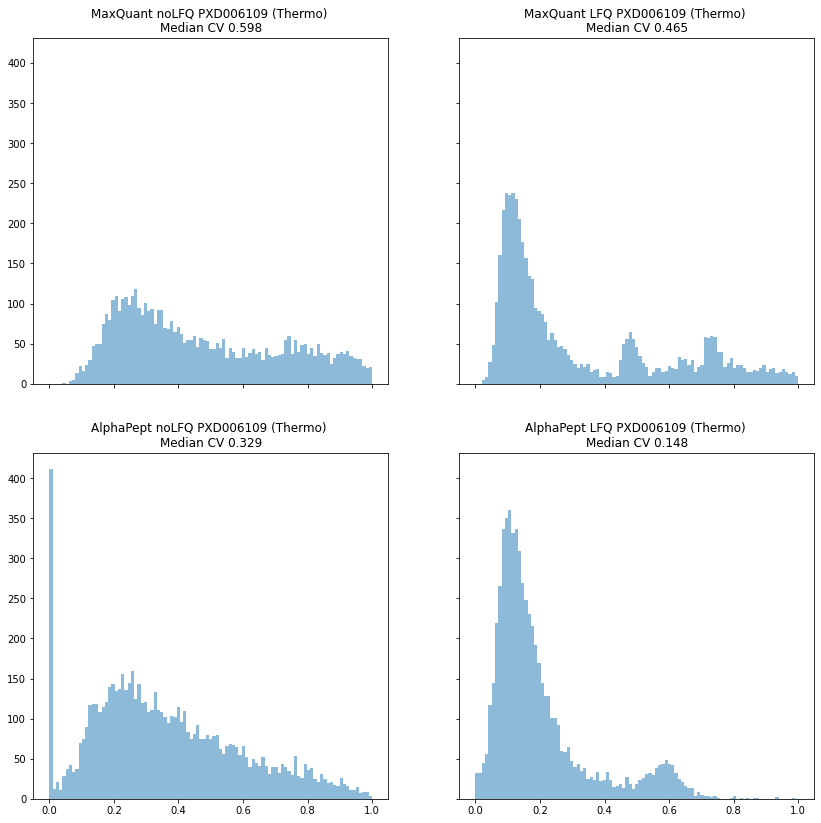

In [9]:
bins = np.linspace(0,1,100)

fig, axes = plt.subplots(2, 2, figsize=(14,14), sharex=True,sharey=True)

ref = pd.read_csv(os.path.join(tmp_folder,'PXD006109_ref.txt'), sep='\t') 
no_rev_cont = [(x[0]!="+") & (x[1] !="+") for x in ref[["Reverse","Potential contaminant"]].values]
ref = ref[no_rev_cont]
add_species_column(ref)
ref['Species'] = ref['Species'].replace(np.nan, "X")

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = 'LFQ i'
    else:
        x = 'I'
        
    base_columns = [f"{x}ntensity Shotgun_02-01_{i}" for i in range(1,4)]
    ratio_columns = [f"{x}ntensity Shotgun_12-01_{i}" for i in range(1,4)]

    id_ = 'MaxQuant ' +_+' PXD006109 (Thermo)'
    
    cv = np.nanstd(ref[base_columns + ratio_columns], axis=1) / np.nanmean(ref[base_columns + ratio_columns], axis=1)

    axes[0,j].hist(cv, bins = bins, label = id_, alpha = 0.5)
    axes[0,j].set_title(f'{id_} \nMedian CV {np.nanmedian(cv):.3f}')

path = os.path.join(TEST_DIR,'results.hdf') #TEST_DIR as set in test_ci.py
ref = pd.read_hdf(path, 'protein_table')
ref.columns = [os.path.split(_)[1].replace('.ms_data.hdf','') for _ in ref.columns]

species = []
for _ in ref.index:
    if 'HUMAN' in _:
        species.append('Homo sapiens')
    elif 'ECO' in _:
        species.append('Escherichia coli')
    else:
        species.append('X')
        
ref['Species'] = species

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = '_LFQ'
    else:
        x = ''
        
    base_columns = [f"PXD006109_HeLa2_{i}{x}" for i in range(1,4)]
    ratio_columns = [f"PXD006109_HeLa12_{i}{x}" for i in range(1,4)]

    id_ = 'AlphaPept ' +_+' PXD006109 (Thermo)'
    cv = np.nanstd(ref[base_columns + ratio_columns], axis=1) / np.nanmean(ref[base_columns + ratio_columns], axis=1)

    axes[1,j].hist(cv, bins = bins, label = id_, alpha = 0.5)
    axes[1,j].set_title(f'{id_} \nMedian CV {np.nanmedian(cv):.3f}')

plt.show()

## Algorithm Test

Test performance of LFQ algorithm on MaxQuant evidence file.

In [10]:
try: 
    import ipywidgets
except ModuleNotFoundError:
    !pip install ipywidgets

2021-05-31 00:45:59> Loading files
2021-05-31 00:46:01> A total of 6 files.
2021-05-31 00:46:11> A total of 6,854 proteins.
2021-05-31 00:46:22> Setting minimum occurence to 6.0


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


2021-05-31 00:46:24> Preparing protein table for parallel processing.
2021-05-31 00:46:31> Starting protein extraction for 6854 proteins.
AlphaPool was set to 24 processes. Setting max to 24.


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [09:53<00:00, 593.14s/it]
  0%|                                                                                            | 0/1 [06:44<?, ?it/s]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [06:17<00:00, 377.12s/it]


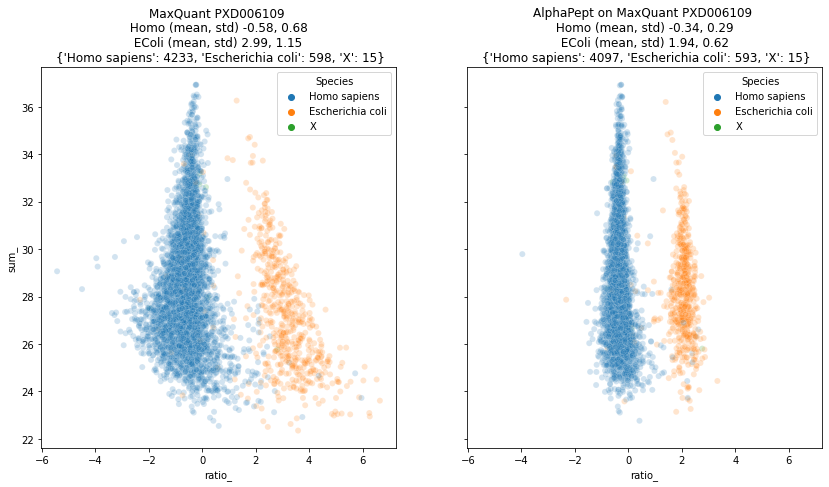

In [11]:
from alphapept.quantification import protein_profile_parallel_mq
import test_helper
import pandas as pd


evidence_path = os.path.join(tmp_folder,'PXD006109_ref_evd.txt')
protein_group_path = os.path.join(tmp_folder,'PXD006109_ref.txt')

pt = protein_profile_parallel_mq(evidence_path, protein_group_path)

ref = pd.read_csv(protein_group_path, sep='\t')
test_helper.add_species_column(ref)
species_dict = pd.Series(ref['Species'].values, index=ref['Protein IDs']).to_dict()
pt['Species'] = [species_dict[_] for _ in pt.index]


pre_lfq = [_ for _ in pt.columns if not _.endswith('_LFQ')]
lfq = [_ for _ in pt.columns if _.endswith('_LFQ')]

test_id = 'PXD006109'

fig, axes = plt.subplots(1, 2, figsize=(14,7), sharex=True,sharey=True)

ids = [f'{software_2} {test_id}', f'{software_1} on {software_2} {test_id}']

for i, ds in enumerate([pre_lfq, lfq]):

    base_columns = [_ for _ in ds if 'HeLa2' in _]
    ratio_columns = [_ for _ in ds if 'HeLa12' in _]
    test_helper.get_plot_df(pt, base_columns, ratio_columns, axes[i], ids[i])

## Normalization Checks

### Check only the delayed normalization part

2021-05-31 00:49:19> Setting minimum occurence to 4.0


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


2021-05-31 00:49:19> Setting minimum occurence to 4.0


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\a

2021-05-31 00:49:20> Setting minimum occurence to 4.0


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\a

2021-05-31 00:49:21> Setting minimum occurence to 4.0


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\a

2021-05-31 00:49:22> Setting minimum occurence to 4.0


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


2021-05-31 00:49:23> Setting minimum occurence to 4.0


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


2021-05-31 00:49:24> Setting minimum occurence to 4.0


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\a

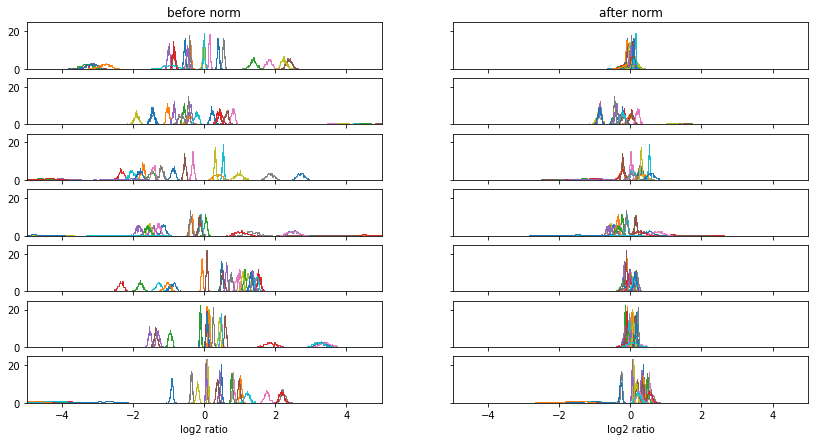

In [12]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import test_helper
from alphapept.quantification import delayed_normalization


def visualize_normalization(simulated_df, axis, value = "Intensity",show_per_colpair = True):
    
    shortnames = df["filename"].unique()
    df["namefrac"] = [f"{n}_{f}" for n,f in zip(simulated_df["filename"], simulated_df["fraction"])]
    simulated_reformat = pd.pivot_table(simulated_df, values=value, columns="namefrac" ,index=["protein_group", "precursor" ])
    
    for namepair in itertools.combinations(shortnames, 2):
        cols1 = [x for x in simulated_reformat.columns if namepair[0] in x]
        cols2 = [x for x in simulated_reformat.columns if namepair[1] in x]
        for colpair in itertools.product(cols1, cols2):
            fcs = np.log2(simulated_reformat[colpair[0]]) - np.log2(simulated_reformat[colpair[1]])
            axis.hist(fcs, histtype = 'step', bins = 50, label = f"{colpair}", density = True)
            axis.set_xlim(-5, 5)

samplenames = ["A1", "A2","B1"]
fractions = [3, 2, 3]

ntests = 7
fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize=(14,7), sharex=True,sharey=True)
count_axis = 0
axes[0][0].set_title("before norm")
axes[-1][0].set_xlabel('log2 ratio')
axes[0][1].set_title("after norm")
axes[-1][1].set_xlabel('log2 ratio')
for _ in range(ntests):
    df = test_helper.simulate_biased_peptides(5000, samplenames, fractions)
    df_del, normed = delayed_normalization(df, field ='Intensity')
    visualize_normalization(df, axes[count_axis][0],value = "Intensity", show_per_colpair = False)
    visualize_normalization(df_del, axes[count_axis][1],value = "Intensity_dn", show_per_colpair = False)
    count_axis+=1

### Check delayed normalization + protein intensity estimation

2021-05-31 00:49:26> Setting minimum occurence to 3.0


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


2021-05-31 00:49:27> Preparing protein table for parallel processing.
2021-05-31 00:49:28> Starting protein extraction for 3362 proteins.
AlphaPool was set to 24 processes. Setting max to 24.
2021-05-31 00:49:56> Preparing protein table for parallel processing.
2021-05-31 00:49:57> Starting protein extraction for 3362 proteins.
AlphaPool was set to 24 processes. Setting max to 24.


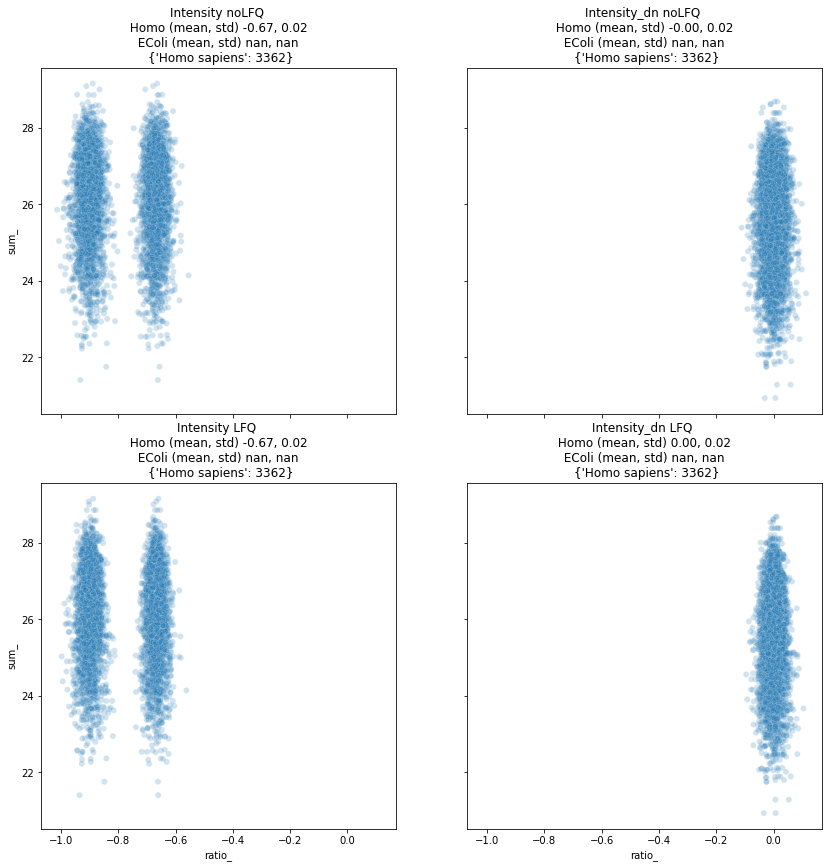

In [13]:
from alphapept.quantification import delayed_normalization, protein_profile_parallel
import test_helper
import pandas as pd
import matplotlib.pyplot as plt
import itertools

samplenames = ["A1", "A2", "B1"]
fractions = [1, 1, 1]
test_id = 'PXD006109'

df = test_helper.simulate_biased_peptides(20000, samplenames, fractions)
df, normed = delayed_normalization(df, field ='Intensity')

fields = ['Intensity', 'Intensity_dn']
tests = ['noLFQ', 'LFQ']

fig, axes = plt.subplots(2, 2, figsize=(14,14), sharex=True, sharey=True)

for j, field in  enumerate(fields):
    
    pt = protein_profile_parallel(df, minimum_ratios=1, field=field)
    pt['Species'] = ["Homo sapiens" for x in range(len(pt.index))]
    
    pre_lfq = [_ for _ in pt.columns if not _.endswith('_LFQ')]
    lfq = [_ for _ in pt.columns if _.endswith('_LFQ')]
    
    for i, cols in enumerate([pre_lfq, lfq]):
        
        ax = axes[i, j]
        samplepairs = itertools.product([x for x in cols if "A" in x ], [x for x in cols if "B" in x ])
        
        for pair in samplepairs:
            
            base_columns = [pair[0]]
            ratio_columns = [pair[1]]
            test_helper.get_plot_df(pt, base_columns, ratio_columns, ax, f"{fields[j]} {tests[i]}", valid_filter = False)
            
            ax.get_legend().remove()
 
plt.show()

### Bruker HeLa

In [14]:
%run -i ../test_ci.py $tmp_folder bruker_hela

2021-05-31 00:50:28> Creating dir F:\alphapept\sandbox\temp/test_temp.
2021-05-31 00:50:33> Logging to C:\Users\admin\alphapept\logs\log_20210531005033.txt.
2021-05-31 00:50:33> Platform information:
2021-05-31 00:50:33> system     - Windows
2021-05-31 00:50:33> release    - 10
2021-05-31 00:50:33> version    - 10.0.18362
2021-05-31 00:50:33> machine    - AMD64
2021-05-31 00:50:33> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2021-05-31 00:50:33> cpu count  - 24
2021-05-31 00:50:33> ram memory - 115.6/127.7 Gb (available/total)
2021-05-31 00:50:33> 
2021-05-31 00:50:33> Python information:
2021-05-31 00:50:33> SQLAlchemy     - 1.3.22
2021-05-31 00:50:33> alphapept      - 0.3.24
2021-05-31 00:50:33> biopython      - 1.78
2021-05-31 00:50:33> click          - 7.1.2
2021-05-31 00:50:33> comtypes       - 1.1.7
2021-05-31 00:50:33> fastcore       - 1.3.5
2021-05-31 00:50:33> h5py           - 3.2.1
2021-05-31 00:50:33> lxml           - 4.6.2
2021-05-31 00:50:33> matplotlib

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 00:50:34> FASTA contains 36,789 entries.


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [02:20<00:00, 48.75s/it]

2021-05-31 00:53:12> Digested 36,789 proteins and generated 9,107,982 spectra
2021-05-31 00:54:37> Database saved to F:\alphapept\sandbox\temp\test_temp\database.hdf. Filesize of database is 3.42 GB



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 00:54:54> Processing 1 files for step raw_conversion
2021-05-31 00:54:54> File F:\alphapept\sandbox\temp/test_temp\bruker_HeLa has extension .d - converting from Bruker.
2021-05-31 01:24:22> File conversion complete. Extracted 299,728 precursors.
2021-05-31 01:24:25> File conversion of file F:\alphapept\sandbox\temp/test_temp\bruker_HeLa.d complete.




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 01:24:25> Processing 1 files for step find_features
2021-05-31 01:24:25> No *.hdf file with features found for F:\alphapept\sandbox\temp/test_temp\bruker_HeLa.ms_data.hdf. Adding to feature finding list.
2021-05-31 01:24:25> Feature finding on F:\alphapept\sandbox\temp/test_temp\bruker_HeLa.d
2021-05-31 01:24:25> Using Windows FF
2021-05-31 01:24:27> TopLevelUffWorkflow: Initializing 4d Feature Finder Workflow for lc-timstof data
2021-05-31 01:24:27> bdal.uff.TopLevelUffWorkflow: This is Universal Feature Finder 3.13.1.0
2021-05-31 01:24:27> 
2021-05-31 01:24:27> bdal.uff.cmdline: Parameters for ParameterSet path '':
2021-05-31 01:24:27> 
2021-05-31 01:24:27>  directory containing the data to be processed." , "required":true , "hidden":false , "type":"class std::basic_string<char,struct std::char_traits<char>,class std::allocator<char> >" , "constraint":null , "value":"F:\alphapept\sandbox\temp/test_temp\bruker_HeLa.d"}
2021-05-31 01:24:27> 
2021-05-31 01:24:27> nable lcms d

2021-05-31 01:24:27> 
2021-05-31 01:24:27> "Parameter for writing raw msms peaks of non-deisotoped peaks if writeAllRawPeaks is false." , "required":false , "hidden":true , "type":"double" , "constraint":null , "value":150}
2021-05-31 01:24:27> 
2021-05-31 01:24:27>  non-deconvoluted peaks are filled up." , "required":false , "hidden":true , "type":"class std::basic_string<char,struct std::char_traits<char>,class std::allocator<char> >" , "constraint":"[topN,threshold] (class std::basic_string<char,struct std::char_traits<char>,class std::allocator<char> >)" , "value":"topN"}
2021-05-31 01:24:27> 
2021-05-31 01:24:27> , all raw peaks are written. Otherwise, only deisotoped peaks are written" , "required":false , "hidden":false , "type":"bool" , "constraint":null , "value":false}
2021-05-31 01:24:27> 
2021-05-31 01:24:27> ':
2021-05-31 01:24:27> 
2021-05-31 01:24:27> 
2021-05-31 01:24:27> :
2021-05-31 01:24:27> 
2021-05-31 01:24:27> c":"intensity threshold for matching calibrant peaks" 

2021-05-31 01:24:27> 
2021-05-31 01:24:27> ectors with group ids of reference peaks, for calibration-segment calibration" , "required":false , "hidden":false , "type":"class std::vector<class std::vector<int,class std::allocator<int> >,class std::allocator<class std::vector<int,class std::allocator<int> > > >" , "constraint":null , "value":unprintable type}
2021-05-31 01:24:27> 
2021-05-31 01:24:27> :"end (RT) of the calibration segment" , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":1e+22}
2021-05-31 01:24:27> 
2021-05-31 01:24:27> c":"begin (RT) of the calibration segment" , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":0}
2021-05-31 01:24:27> 
2021-05-31 01:24:27> mum intensity of a calibrant" , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":1e+22}
2021-05-31 01:24:27> 
2021-05-31 01:24:27> lag indicating which algorithm to use: false = use calibration-segment, true = do not u

2021-05-31 01:24:27> 
2021-05-31 01:24:27> value for range to read metadata / recalibrate masses in" , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":0}
2021-05-31 01:24:27> 
2021-05-31 01:24:27>  "desc":"Lower RT value for range to look for mobility calibrants" , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":0}
2021-05-31 01:24:27> 
2021-05-31 01:24:27> .Calibration.ReadTimsCalibrants':
2021-05-31 01:24:27> 
2021-05-31 01:24:27> 
2021-05-31 01:24:27> Ms.Calibration.WriteCalibration':
2021-05-31 01:24:27> 
2021-05-31 01:24:27> "vector of CCS values of reference peaks for mobility calibration" , "required":false , "hidden":false , "type":"class std::vector<double,class std::allocator<double> >" , "constraint":null , "value":[]}
2021-05-31 01:24:27> 
2021-05-31 01:24:27> .Calibration.WriteCalibration':
2021-05-31 01:24:27> 
2021-05-31 01:24:27> 
2021-05-31 01:24:27> Ms.ClusterDeisotoping':
2021-05-31 01:24:27> 
2021-0

2021-05-31 01:24:28> 
2021-05-31 01:24:28> sc":"assignment precondition: if true, the M/Z center of the isolation window must lie within the feature interval" , "required":false , "hidden":false , "type":"bool" , "constraint":null , "value":false}
2021-05-31 01:24:28> 
2021-05-31 01:24:28> raction of isotope pattern which must be covered (starting from the largest peaks)" , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":0.95}
2021-05-31 01:24:28> 
2021-05-31 01:24:28> l molecules: path to file with table: 6 x M/Z and 6 isotope intensities" , "required":false , "hidden":false , "type":"class std::basic_string<char,struct std::char_traits<char>,class std::allocator<char> >" , "constraint":null , "value":"isotopePatterns3.txt"}
2021-05-31 01:24:28> 
2021-05-31 01:24:28> e threshold for incorporation of non-essential isotopes into feature. if <= 0, not used (abs. threshold maxIsotopePatternError used)." , "required":false , "hidden":false , "type":"double

2021-05-31 01:24:28> 
2021-05-31 01:24:28> equired":false , "hidden":false , "type":"double" , "constraint":null , "value":0}
2021-05-31 01:24:28> 
2021-05-31 01:24:28> quired":false , "hidden":false , "type":"double" , "constraint":null , "value":0}
2021-05-31 01:24:28> 
2021-05-31 01:24:28> " , "required":false , "hidden":false , "type":"bool" , "constraint":null , "value":false}
2021-05-31 01:24:28> 
2021-05-31 01:24:28> quired":false , "hidden":false , "type":"double" , "constraint":null , "value":0}
2021-05-31 01:24:28> 
2021-05-31 01:24:28> rue, all peaks for positions [-1, maxIsotopes-1] (with pos. 0 first isotope of feature) are reported" , "required":false , "hidden":false , "type":"bool" , "constraint":null , "value":false}
2021-05-31 01:24:28> 
2021-05-31 01:24:28> fraction of the maximum intensity is considered as not saturated (for bigger intensities we don't know)" , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":0.8}
2021-05-31 01:24:28

2021-05-31 01:24:28> required":false , "hidden":false , "type":"double" , "constraint":null , "value":1}
2021-05-31 01:24:28> 
2021-05-31 01:24:28> quired":false , "hidden":false , "type":"double" , "constraint":null , "value":0.03}
2021-05-31 01:24:28> 
2021-05-31 01:24:28>  , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":2}
2021-05-31 01:24:28> 
2021-05-31 01:24:28> ed":false , "hidden":false , "type":"double" , "constraint":null , "value":0.014}
2021-05-31 01:24:28> 
2021-05-31 01:24:28> d":false , "hidden":false , "type":"double" , "constraint":null , "value":0.01}
2021-05-31 01:24:28> 
2021-05-31 01:24:28> d":false , "hidden":false , "type":"double" , "constraint":null , "value":4}
2021-05-31 01:24:28> 
2021-05-31 01:24:28> " , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":1}
2021-05-31 01:24:28> 
2021-05-31 01:24:28> equired":false , "hidden":false , "type":"double" , "constraint":null , "value":3.5}
2021-05-

2021-05-31 01:24:28> 
2021-05-31 01:24:28>  sqlite result file '<shortFilename>.features'" , "required":false , "hidden":false , "type":"bool" , "constraint":null , "value":true}
2021-05-31 01:24:28> 
2021-05-31 01:24:28> aw peaks for each cluster are written" , "required":false , "hidden":true , "type":"bool" , "constraint":null , "value":false}
2021-05-31 01:24:28> 
2021-05-31 01:24:28> .IsotopeClustersOutput':
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> Ms.PrecursorInfoSource':
2021-05-31 01:24:28> 
2021-05-31 01:24:28> value for read range" , "required":false , "hidden":true , "type":"double" , "constraint":null , "value":1e+22}
2021-05-31 01:24:28> 
2021-05-31 01:24:28> value for read range" , "required":false , "hidden":true , "type":"double" , "constraint":null , "value":0}
2021-05-31 01:24:28> 
2021-05-31 01:24:28> .PrecursorInfoSource':
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> Ms.ReadTimsData':
2021-05-31 01:24:28> 
2021-05-31 01:24

2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 00000
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 0000
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 00
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 0000.000000
2021-05-31 01:24:28> 
2021-05-31 01:24:28> e
2021-05-31 01:24:28> th.enableRecalibration=true
2021

2021-05-31 01:24:28> false
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 10
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> alse
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> ing=20
2021-05-31 01:24:28> 00000
2021-05-31 01:24:28> or=2.000000
2021-05-31 01:24:28> 300000
2021-05-31 01:24:28> 0
2021-05-31 01:24:28> 50000
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> .000000
2021-05-31 01:24:28> 
2021-05-31 01:24:28> 
2021-05-31 01:24:28> ters=<unprintable type>
2021-05-31 01:24:28> ue
2021-05-31 01:24:28> eaks=false
2021-05-31 01:24:28> nds=10000000000000000000000.000000
2021-05-31 01:24:28> nds=0.000000
2021-05-31 01:24:28> meNrTolerance=2
2021-05-31 01:24:28> imalFrequency=20
2021-05-31 01:24:28> nNrTolerance=20
2021-05-31 01:24:28> lerance=3
2021-05-31 01:24:28> eClustering"
2021-05-31 01:24:28> ue
2021-0

2021-05-31 01:48:49> bdal.algorithm.LcmsClusterDeisotoping: 2052951 clusters after splitting (if active).
2021-05-31 01:48:49> bdal.algorithm.LcmsClusterDeisotoping:  min/max apex intensity: 34.7222/1.31159e+06
2021-05-31 01:48:59> bdal.algorithm.PerioTab.InitPerioTabStream: User-defined periodic table extension is empty or file could not be opened. Proceeding with standard elements.
2021-05-31 01:48:59> bdal.algorithm.LcmsClusterDeisotoping: correlation threshold: 10623.9
2021-05-31 01:48:59> bdal.algorithm.LcmsClusterDeisotoping: Progress: 0% (1/2052951)
2021-05-31 01:49:00> bdal.algorithm.LcmsClusterDeisotoping: Progress: 0.487104% (10001/2052951)
2021-05-31 01:49:01> bdal.algorithm.LcmsClusterDeisotoping: Progress: 0.974207% (20001/2052951)
2021-05-31 01:49:02> bdal.algorithm.LcmsClusterDeisotoping: Progress: 1.46131% (30001/2052951)
2021-05-31 01:49:04> bdal.algorithm.LcmsClusterDeisotoping: Progress: 1.94841% (40001/2052951)
2021-05-31 01:49:05> bdal.algorithm.LcmsClusterDeisotop

2021-05-31 01:50:30> bdal.algorithm.LcmsClusterDeisotoping: Progress: 39.4554% (810001/2052951)
2021-05-31 01:50:31> bdal.algorithm.LcmsClusterDeisotoping: Progress: 39.9425% (820001/2052951)
2021-05-31 01:50:32> bdal.algorithm.LcmsClusterDeisotoping: Progress: 40.4296% (830001/2052951)
2021-05-31 01:50:33> bdal.algorithm.LcmsClusterDeisotoping: Progress: 40.9167% (840001/2052951)
2021-05-31 01:50:33> bdal.algorithm.LcmsClusterDeisotoping: Progress: 41.4038% (850001/2052951)
2021-05-31 01:50:34> bdal.algorithm.LcmsClusterDeisotoping: Progress: 41.8909% (860001/2052951)
2021-05-31 01:50:35> bdal.algorithm.LcmsClusterDeisotoping: Progress: 42.378% (870001/2052951)
2021-05-31 01:50:36> bdal.algorithm.LcmsClusterDeisotoping: Progress: 42.8651% (880001/2052951)
2021-05-31 01:50:37> bdal.algorithm.LcmsClusterDeisotoping: Progress: 43.3522% (890001/2052951)
2021-05-31 01:50:38> bdal.algorithm.LcmsClusterDeisotoping: Progress: 43.8393% (900001/2052951)
2021-05-31 01:50:39> bdal.algorithm.LcmsC

2021-05-31 01:51:38> bdal.algorithm.LcmsClusterDeisotoping: Progress: 80.8592% (1660001/2052951)
2021-05-31 01:51:39> bdal.algorithm.LcmsClusterDeisotoping: Progress: 81.3463% (1670001/2052951)
2021-05-31 01:51:39> bdal.algorithm.LcmsClusterDeisotoping: Progress: 81.8334% (1680001/2052951)
2021-05-31 01:51:40> bdal.algorithm.LcmsClusterDeisotoping: Progress: 82.3205% (1690001/2052951)
2021-05-31 01:51:41> bdal.algorithm.LcmsClusterDeisotoping: Progress: 82.8076% (1700001/2052951)
2021-05-31 01:51:41> bdal.algorithm.LcmsClusterDeisotoping: Progress: 83.2947% (1710001/2052951)
2021-05-31 01:51:42> bdal.algorithm.LcmsClusterDeisotoping: Progress: 83.7818% (1720001/2052951)
2021-05-31 01:51:43> bdal.algorithm.LcmsClusterDeisotoping: Progress: 84.2689% (1730001/2052951)
2021-05-31 01:51:43> bdal.algorithm.LcmsClusterDeisotoping: Progress: 84.756% (1740001/2052951)
2021-05-31 01:51:44> bdal.algorithm.LcmsClusterDeisotoping: Progress: 85.2431% (1750001/2052951)
2021-05-31 01:51:45> bdal.algor




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 02:28:24> Starting first search.
2021-05-31 02:28:24> Processing 1 files for step search_db
2021-05-31 02:28:25> Calibrating fragments


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2021-05-31 02:28:53> Performing search on 664,992 query and 9,107,982 db entries with frag_tol = 30.00 and prec_tol = 30.00.
2021-05-31 02:31:10> Compared 744,452,374 spectra and found 955,641 psms.
2021-05-31 02:31:11> Extracting columns for scoring.


100%|██████████████████████████████████████████████████████████████████████████████| 1.0/1 [1:40:42<00:00, 6042.34s/it]
  0%|                                                                                          | 0/1 [1:06:50<?, ?it/s]


2021-05-31 02:33:35> Extracted columns from 955,641 spectra.
2021-05-31 02:33:35> Saving first_search results to F:\alphapept\sandbox\temp/test_temp\bruker_HeLa.ms_data.hdf
2021-05-31 02:33:39> Search of file F:\alphapept\sandbox\temp/test_temp\bruker_HeLa.d complete.
2021-05-31 02:34:09> First search complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 02:34:09> Processing 1 files for step calibrate_hdf
2021-05-31 02:34:11> Scoring using X-Tandem
2021-05-31 02:34:14> 66,546 target (665 decoy) of 116192 PSMs. fdr 0.009993 for a cutoff of 17.77 (set fdr was 0.01)
2021-05-31 02:34:22> Calibration of file F:\alphapept\sandbox\temp/test_temp\bruker_HeLa.ms_data.hdf complete.
2021-05-31 02:34:22> Calibrating fragments
2021-05-31 02:34:24> Median fragment offset -4.73 - std 15.19 ppm



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 02:34:25> Starting second search with DB.
2021-05-31 02:34:25> Processing 1 files for step search_db
2021-05-31 02:34:25> Found calibrated prec_tol with value 8.24
2021-05-31 02:34:29> Performing search on 664,992 query and 9,107,982 db entries with frag_tol = 30.00 and prec_tol = 8.24.


  0%|                                                                                            | 0/1 [01:04<?, ?it/s]


2021-05-31 02:35:15> Compared 242,794,472 spectra and found 468,019 psms.
2021-05-31 02:35:15> Extracting columns for scoring.


  0%|                                                                                            | 0/1 [07:08<?, ?it/s]


2021-05-31 02:36:21> Extracted columns from 468,019 spectra.
2021-05-31 02:36:22> Saving second_search results to F:\alphapept\sandbox\temp/test_temp\bruker_HeLa.ms_data.hdf
2021-05-31 02:36:23> Search of file F:\alphapept\sandbox\temp/test_temp\bruker_HeLa.d complete.
2021-05-31 02:36:52> Second search complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 02:36:53> Processing 1 files for step score_hdf
2021-05-31 02:36:54> Found second search psms for scoring.
2021-05-31 02:37:02> 88,995 target (8,899 decoy) of 105606 PSMs. fdr 0.099994 for a cutoff of 12.67 (set fdr was 0.1)
2021-05-31 02:37:03> Training & cross-validation on 18396 targets and 18395 decoys
2021-05-31 02:37:32> The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 25, 'clf__max_leaf_nodes': 250}
2021-05-31 02:37:32> The train accuracy was 0.9376749748579816
2021-05-31 02:37:32> Testing on 73582 targets and 73583 decoys
2021-05-31 02:37:33> The test accuracy was 0.922957224883634
2021-05-31 02:37:33> Top features {'y_hits': 0.21723423472679745, 'hits': 0.19193158928254234, 'x_tandem': 0.1493409391392731, 'matched_int_ratio': 0.06333859560323891, 'total_int': 0.057469890763776905, 'matched_ion_fraction': 0.05549701176626915, 'n_ions': 0.038144571004678024, 'int_sum': 0.03084639492638869, 'n_missed': 0.026768463371152584, 'dist': 0.0266



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 02:38:05> Fasta dict with length 36,789, Pept dict with length 9,107,988
2021-05-31 02:38:05> Extracting protein groups.





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 02:38:06> A total of 61,370 unique and 3,420 shared peptides.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


2021-05-31 02:38:08> A total of 909 ambigious proteins
2021-05-31 02:38:08> A total of 709 unique and 47 shared peptides.
2021-05-31 02:38:08> A total of 46 ambigious proteins
2021-05-31 02:38:08> Global FDR on protein_group
2021-05-31 02:38:09> 6,777 target (67 decoy) of 8292 PSMs. fdr 0.009886 for a cutoff of 0.89 (set fdr was 0.01)
2021-05-31 02:38:09> FDR on proteins complete. For 0.01 FDR found 75,554 targets and 71 decoys. A total of 6,844 proteins found.
2021-05-31 02:38:12> Saving complete.
2021-05-31 02:38:12> Protein groups complete.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2605: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['ion_int', 'ion_types', 'naked_sequence', 'precursor', 'sequence',
       'filename', 'shortname', 'protein', 'protein_group', 'razor',
       'protein_idx'],
      dtype='object')]

  pytables.to_hdf(


2021-05-31 02:38:13> Complete. 
2021-05-31 02:38:13> Starting profile extraction.




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.00it/s]

2021-05-31 02:38:13> LFQ complete.
2021-05-31 02:38:13> Exporting as csv.
2021-05-31 02:38:16> Saved df of length 75,625 saved to F:\alphapept\sandbox\temp\test_temp\results


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.16s/it]


2021-05-31 02:38:19> Settings saved to F:\alphapept\sandbox\temp\test_temp\results.yaml
2021-05-31 02:38:19> Analysis complete.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\IPython\core\interactiveshell.py:3361: DtypeWarning: Columns (12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


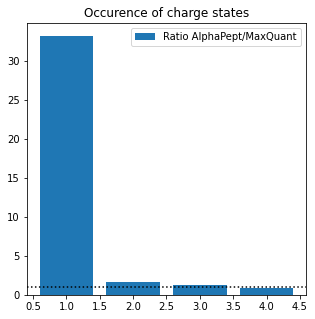

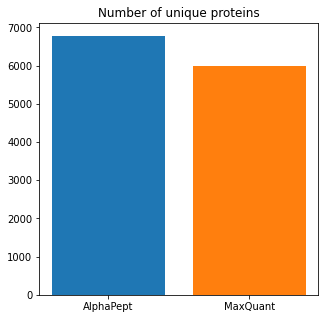

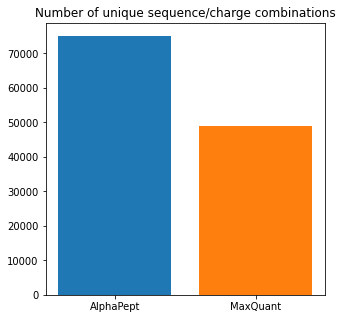

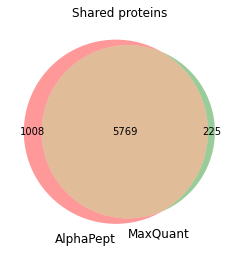

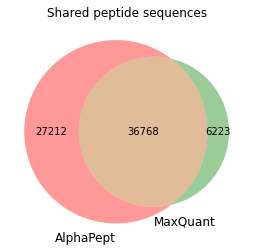

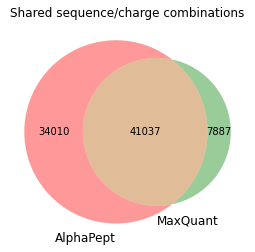

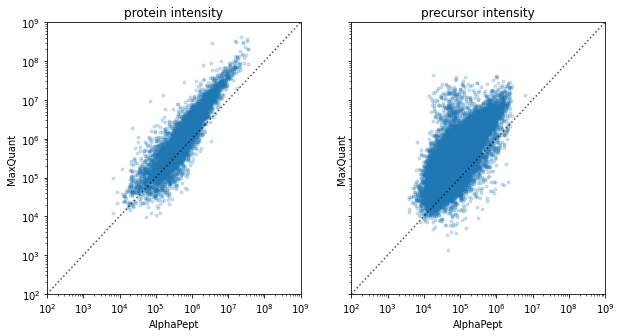

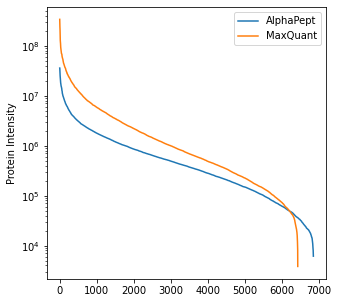

In [15]:
from test_helper import prepare_files, compare_field, compare_populations, compare_intensities, protein_rank

df1, df2 = prepare_files(os.path.join(TEST_DIR, "results.hdf"), os.path.join(tmp_folder,'bruker_HeLa_evd.txt'))
for field in ['charge','protein','precursor']:
    compare_field(df1, df2, software_1, software_2, field)
    
for field in ['protein','sequence','precursor']:
    compare_populations(df1, df2, software_1, software_2, field)
    
compare_intensities(df1, df2,software_1, software_2)

protein_rank(df1, df2,software_1, software_2)

## PXD010012

In [18]:
%run -i ../test_ci.py $tmp_folder PXD010012

2021-05-31 09:27:12> Downloading F:\alphapept\sandbox\temp/test_files\PXD010012_CT_2_C2_01_Ratio.d.
-1 / unknown2021-05-31 09:35:29> Unzipping.
2021-05-31 09:35:47> Cleaning up zipfile
2021-05-31 09:35:47> Downloading F:\alphapept\sandbox\temp/test_files\PXD010012_CT_3_C2_01_Ratio.d.
-1 / unknown2021-05-31 09:45:10> Unzipping.
2021-05-31 09:45:28> Cleaning up zipfile
2021-05-31 09:45:28> Downloading F:\alphapept\sandbox\temp/test_files\PXD010012_CT_4_C2_01_Ratio.d.
-1 / unknown2021-05-31 09:54:00> Unzipping.
2021-05-31 09:54:17> Cleaning up zipfile
2021-05-31 09:54:17> Downloading F:\alphapept\sandbox\temp/test_files\PXD010012_CT_5_C2_01_Ratio.d.
-1 / unknown2021-05-31 10:02:57> Unzipping.
2021-05-31 10:03:14> Cleaning up zipfile
2021-05-31 10:03:14> Creating dir F:\alphapept\sandbox\temp/test_temp.
2021-05-31 10:05:16> Logging to C:\Users\admin\alphapept\logs\log_20210531100516.txt.
2021-05-31 10:05:16> Platform information:
2021-05-31 10:05:16> system     - Windows
2021-05-31 10:05:1

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 10:05:17> FASTA contains 43,752 entries.


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [02:19<00:00, 24.89s/it]

2021-05-31 10:07:52> Digested 43,752 proteins and generated 6,163,992 spectra
2021-05-31 10:08:52> Database saved to F:\alphapept\sandbox\temp\test_temp\database.hdf. Filesize of database is 2.33 GB



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 10:09:03> Processing 10 files for step raw_conversion
AlphaPool was set to 24 processes. Setting max to 24.



 10%|███████▋                                                                     | 0.1/1 [28:14<4:14:14, 16949.19s/it]
 40%|████████████████████████████████                                                | 0.4/1 [28:19<32:11, 3219.42s/it]
 60%|████████████████████████████████████████████████                                | 0.6/1 [28:33<12:18, 1846.53s/it]
 80%|████████████████████████████████████████████████████████████████                | 0.8/1 [29:34<04:11, 1255.03s/it]

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 10:38:38> Processing 10 files for step find_features
2021-05-31 10:38:38> Using Bruker Feature Finder. Setting Process limit to 4.
AlphaPool was set to 4 processes. Setting max to 4.




 10%|███████▋                                                                     | 0.1/1 [44:28<6:40:16, 26685.22s/it]

 40%|████████████████████████████████                                                | 0.4/1 [44:33<50:37, 5063.00s/it]

 50%|█████████████████████████████████████▌                                     | 0.5/1 [1:28:11<1:31:11, 10943.03s/it]

 70%|██████████████████████████████████████████████████████▌                       | 0.7/1 [1:28:25<30:37, 6126.40s/it]

 80%|██████████████████████████████████████████████████████████████▍               | 0.8/1 [1:30:52<16:41, 5005.44s/it]

 90%|██████████████████████████████████████████████████████████████████████▏       | 0.9/1 [2:06:16<15:15, 9156.30s/it]

100%|██████████████████████████████████████████████████████████████████████████████| 1.0/1 [2:06:52<00:00, 6803.96s/it]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 12:45:31> Starting first search.
2021-05-31 12:45:31> Processing 10 files for step search_db
2021-05-31 12:45:31> Searching. Setting Process limit to 20.
AlphaPool was set to 20 processes. Setting max to 20.





 10%|███████▊                                                                      | 0.1/1 [10:52<1:37:50, 6523.12s/it]


 20%|████████████████                                                                | 0.2/1 [11:25<38:22, 2878.69s/it]


 30%|████████████████████████                                                        | 0.3/1 [11:26<18:18, 1569.14s/it]


100%|█████████████████████████████████████████████████████████████████████████████| 1.0/1 [2:48:12<00:00, 10092.24s/it]
100%|██████████████████████████████████████████████████████████████████████████████| 1.0/1 [2:18:37<00:00, 8317.79s/it]
100%|█████████████████████████████████████████████████████████████████████████████| 1.0/1 [2:52:06<00:00, 10326.96s/it]


2021-05-31 12:57:34> First search complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 12:57:34> Processing 10 files for step calibrate_hdf
AlphaPool was set to 24 processes. Setting max to 24.


 60%|█████████████████████████████████████████████████▏                                | 0.6/1 [00:29<00:12, 30.47s/it]
  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 12:58:04> Starting second search with DB.
2021-05-31 12:58:04> Processing 10 files for step search_db
2021-05-31 12:58:04> Searching. Setting Process limit to 19.


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [00:30<00:00, 30.03s/it]


AlphaPool was set to 19 processes. Setting max to 19.



 10%|████████                                                                        | 0.1/1 [02:53<26:04, 1738.14s/it]
 30%|████████████████████████▎                                                        | 0.3/1 [02:54<05:18, 454.90s/it]
 40%|████████████████████████████████▍                                                | 0.4/1 [02:58<03:06, 310.95s/it]
 50%|████████████████████████████████████████▌                                        | 0.5/1 [03:03<01:51, 222.08s/it]
 60%|████████████████████████████████████████████████▌                                | 0.6/1 [03:03<01:00, 152.31s/it]
 70%|████████████████████████████████████████████████████████▋                        | 0.7/1 [03:05<00:33, 110.17s/it]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [15:53<00:00, 953.46s/it]


2021-05-31 13:01:34> Second search complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 13:01:35> Processing 10 files for step score_hdf
AlphaPool was set to 24 processes. Setting max to 24.


 60%|████████████████████████████████████████████████▌                                | 0.6/1 [03:21<01:13, 184.73s/it]

2021-05-31 13:04:57> Also using mobility for calibration.


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [03:23<00:00, 203.35s/it]


2021-05-31 13:05:42> Total deviation before calibration {'mz': 8.774288434190024e-06, 'rt': 3.3105204264323174, 'mobility': 0.050599072448525434}
2021-05-31 13:05:42> Mean deviation before calibration {'mz': 1.94984187426445e-07, 'rt': 0.07356712058738483, 'mobility': 0.0011244238321894541}
2021-05-31 13:05:42> Solving equation system
2021-05-31 13:05:42> Regression score is 0.9969591000219014
2021-05-31 13:05:42> Solving equation system complete.
2021-05-31 13:05:42> Applying offset
2021-05-31 13:05:42> Saving F:\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C1_01_Base.ms_data.hdf - peptide_fdr.
2021-05-31 13:05:42> Saving F:\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C1_01_Base.ms_data.hdf - feature_table.
2021-05-31 13:05:42> Saving F:\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C1_01_Base.ms_data.hdf - peptide_fdr.
2021-05-31 13:05:43> Saving F:\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C1_01_Base.ms_data.hdf - feature_table.
2021-05-31 13:05:43> Saving F:\alphapep

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 13:06:35> Fasta dict with length 43,752, Pept dict with length 6,163,998
2021-05-31 13:06:35> Extracting protein groups.




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


2021-05-31 13:06:39> A total of 60,149 unique and 8,422 shared peptides.
2021-05-31 13:06:43> A total of 1938 ambigious proteins
2021-05-31 13:06:43> A total of 2,682 unique and 328 shared peptides.
2021-05-31 13:06:44> A total of 307 ambigious proteins
2021-05-31 13:06:46> Global FDR on protein_group
2021-05-31 13:06:46> 7,588 target (75 decoy) of 12581 PSMs. fdr 0.009884 for a cutoff of 0.97 (set fdr was 0.01)
2021-05-31 13:06:50> FDR on proteins complete. For 0.01 FDR found 480,204 targets and 237 decoys. A total of 7,663 proteins found.
2021-05-31 13:07:12> Saving complete.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2605: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['ion_int', 'ion_types', 'naked_sequence', 'precursor', 'sequence',
       'filename', 'shortname', 'protein', 'protein_group', 'razor',
       'protein_idx'],
      dtype='object')]

  pytables.to_hdf(


2021-05-31 13:07:12> Protein groups complete.
2021-05-31 13:07:14> Delayed Normalization.
2021-05-31 13:07:14> Setting minimum occurence to 10.0
2021-05-31 13:07:15> Normalization with SLSQP failed. Trying BFGS
2021-05-31 13:07:22> Complete. 
2021-05-31 13:07:22> Starting profile extraction.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2605: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['ion_int', 'ion_types', 'naked_sequence', 'precursor', 'sequence',
       'filename', 'shortname', 'protein', 'protein_group', 'razor',
       'protein_idx'],
      dtype='object')]

  pytables.to_hdf(
  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 13:07:23> Preparing protein table for parallel processing.


 20%|█████████████▎                                                     | 0.1989821218843795/1 [00:15<00:57, 72.37s/it]

2021-05-31 13:07:38> Starting protein extraction for 7663 proteins.
AlphaPool was set to 24 processes. Setting max to 24.


100%|█████████████████████████████████████████████████████████████████▉| 0.9997912044891035/1 [03:34<00:00, 224.84s/it]

2021-05-31 13:11:04> LFQ complete.
2021-05-31 13:11:04> Exporting as csv.
2021-05-31 13:11:24> Saved df of length 480,441 saved to F:\alphapept\sandbox\temp\test_temp\results
2021-05-31 13:11:59> Settings saved to F:\alphapept\sandbox\temp\test_temp\results.yaml
2021-05-31 13:11:59> Analysis complete.


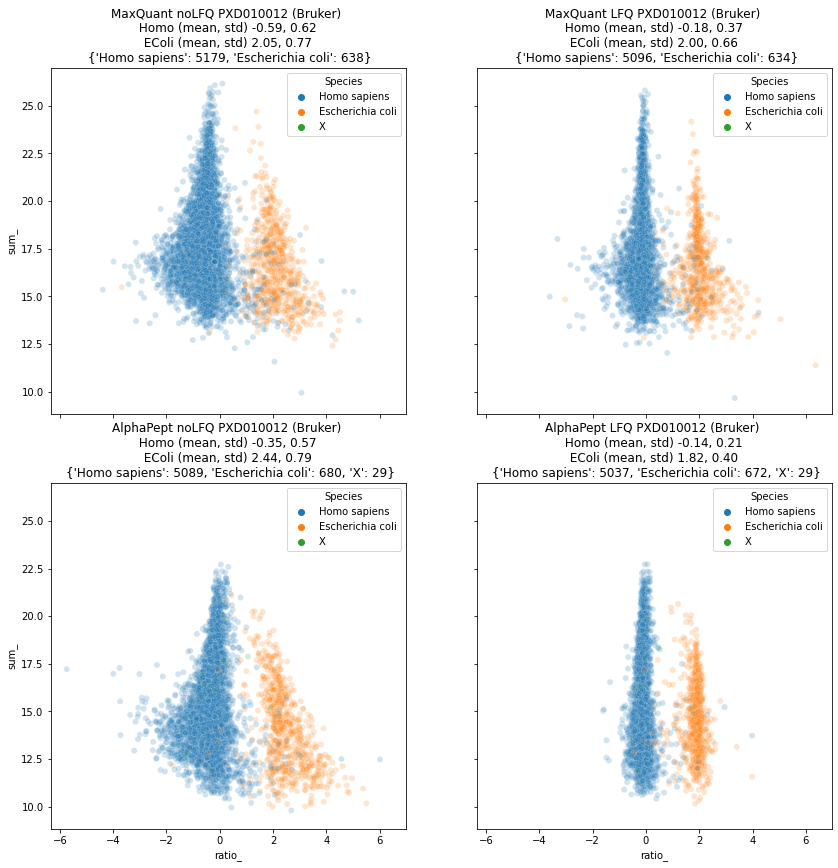

In [19]:
from test_helper import get_plot_df
import matplotlib.pyplot as plt
import seaborn as sns
import os

fig, axes = plt.subplots(2, 2, figsize=(14,14), sharex=True,sharey=True)

ref = pd.read_csv(os.path.join(tmp_folder,'PXD010012_ref.txt'), sep='\t') 

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = 'LFQ i'
    else:
        x = 'I'
        
    base_columns = [f"{x}ntensity Base_{i}" for i in range(1,6)]
    ratio_columns = [f"{x}ntensity Ratio_{i}" for i in range(1,6)]

    id_ = 'MaxQuant ' +_+' PXD010012 (Bruker)'
    get_plot_df(ref, base_columns, ratio_columns, axes[0,j], id_)


path = os.path.join(TEST_DIR, "results.hdf") #TEST_DIR as set in test_ci.py
ref = pd.read_hdf(path, 'protein_table')
ref.columns = [os.path.split(_)[1].replace('.ms_data.hdf','') for _ in ref.columns]

species = []
for _ in ref.index:
    if 'HUMAN' in _:
        species.append('Homo sapiens')
    elif 'ECO' in _:
        species.append('Escherichia coli')
    else:
        species.append('X')
        
ref['Species'] = species

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = '_LFQ'
    else:
        x = ''
        
    base_columns = [f"PXD010012_CT_{i}_C1_01_Base{x}" for i in range(1,4)]
    ratio_columns = [f"PXD010012_CT_{i}_C2_01_Ratio{x}" for i in range(1,4)]

    id_ = 'AlphaPept ' +_+' PXD010012 (Bruker)'
    get_plot_df(ref, base_columns, ratio_columns, axes[1,j], id_)

plt.show()

2021-05-31 13:41:39> Loading files


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\IPython\core\interactiveshell.py:3361: DtypeWarning: Columns (54) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


2021-05-31 13:41:42> A total of 10 files.
2021-05-31 13:41:53> A total of 7,413 proteins.


100%|████████████████████████████████████████████████████████████████████████████████| 1.0/1 [43:51<00:00, 2631.16s/it]
  0%|                                                                                            | 0/1 [35:20<?, ?it/s]
100%|████████████████████████████████████████████████████████████████████████████████| 1.0/1 [34:32<00:00, 2072.98s/it]


2021-05-31 13:42:05> Setting minimum occurence to 10.0


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


2021-05-31 13:42:11> Preparing protein table for parallel processing.
2021-05-31 13:42:23> Starting protein extraction for 7413 proteins.
AlphaPool was set to 24 processes. Setting max to 24.


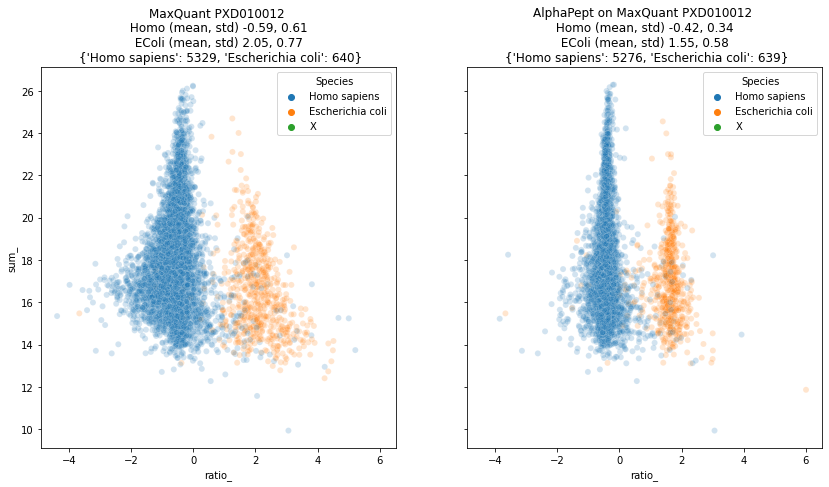

In [20]:
from alphapept.quantification import protein_profile_parallel_mq
from test_helper import get_plot_df

evidence_path = os.path.join(tmp_folder,'PXD010012_ref_evd.txt')
protein_group_path = os.path.join(tmp_folder,'PXD010012_ref.txt')

pt = protein_profile_parallel_mq(evidence_path, protein_group_path)

ref = pd.read_csv(protein_group_path, sep='\t')
species_dict = pd.Series(ref['Species'].values, index=ref['Protein IDs']).to_dict()
pt['Species'] = [species_dict[_] for _ in pt.index]


pre_lfq = [_ for _ in pt.columns if not _.endswith('_LFQ')]
lfq = [_ for _ in pt.columns if _.endswith('_LFQ')]

test_id = 'PXD010012'

fig, axes = plt.subplots(1, 2, figsize=(14,7), sharex=True,sharey=True)

ids = [f'{software_2} {test_id}', f'{software_1} on {software_2} {test_id}']

for i, ds in enumerate([pre_lfq, lfq]):

    base_columns = [_ for _ in ds if 'Base' in _]
    ratio_columns = [_ for _ in ds if 'Ratio' in _]
    get_plot_df(pt, base_columns, ratio_columns, axes[i], ids[i])

### Large Fasta

In [21]:
%run -i ../test_ci.py $tmp_folder thermo_hela_large_fasta

2021-05-31 13:44:40> Downloading F:\alphapept\sandbox\temp/test_files\all_uniprot_reviewed.fasta.
100% [......................................................................] 279464450 / 2794644502021-05-31 13:45:00> Creating dir F:\alphapept\sandbox\temp/test_temp.
2021-05-31 13:45:03> Logging to C:\Users\admin\alphapept\logs\log_20210531134503.txt.
2021-05-31 13:45:03> Platform information:
2021-05-31 13:45:03> system     - Windows
2021-05-31 13:45:04> release    - 10
2021-05-31 13:45:04> version    - 10.0.18362
2021-05-31 13:45:04> machine    - AMD64
2021-05-31 13:45:04> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2021-05-31 13:45:04> cpu count  - 24
2021-05-31 13:45:04> ram memory - 118.1/127.7 Gb (available/total)
2021-05-31 13:45:04> 
2021-05-31 13:45:04> Python information:
2021-05-31 13:45:04> SQLAlchemy     - 1.3.22
2021-05-31 13:45:04> alphapept      - 0.3.24
2021-05-31 13:45:04> biopython      - 1.78
2021-05-31 13:45:04> click          - 7.1.2
2021-05-31

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 13:45:04> Processing 1 files for step raw_conversion
2021-05-31 13:45:04> File F:\alphapept\sandbox\temp/test_temp\thermo_HeLa has extension .raw - converting from Thermo.
2021-05-31 13:47:16> File conversion complete. Extracted 120,226 precursors.
2021-05-31 13:47:18> File conversion of file F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 13:47:18> Processing 1 files for step find_features
2021-05-31 13:47:18> No *.hdf file with features found for F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf. Adding to feature finding list.
2021-05-31 13:47:18> Feature finding on F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw
2021-05-31 13:47:24> Number of hills 1,105,353, len = 17.35
2021-05-31 13:47:24> Repeating hill extraction with centroid_tol 5.87
2021-05-31 13:47:31> Number of hills 1,227,331, len = 19.44
2021-05-31 13:47:51> After split hill_ptrs 1,635,903
2021-05-31 13:47:52> After filter hill_ptrs 1,585,989
2021-05-31 13:50:51> Extracting hill stats complete


  0%|                                                                                            | 0/1 [05:47<?, ?it/s]


2021-05-31 13:51:07> Found 190,099 pre isotope patterns.
2021-05-31 13:52:15> Extracted 223,430 isotope patterns.
2021-05-31 13:52:18> Report complete.
2021-05-31 13:52:18> Matching features to query data.
2021-05-31 13:52:20> Saving feature table.
2021-05-31 13:52:20> Feature table saved to F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf
2021-05-31 13:52:20> Saving features.
2021-05-31 13:52:20> Feature finding of file F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 13:52:20> Starting first search.
2021-05-31 13:52:31> Number of FASTA entries: 564,523 - FASTA settings {'mods_fixed': ['cC'], 'mods_fixed_terminal': [], 'mods_variable': ['oxM'], 'mods_variable_terminal': [], 'mods_fixed_terminal_prot': [], 'mods_variable_terminal_prot': ['a<^'], 'n_missed_cleavages': 2, 'pep_length_min': 6, 'pep_length_max': 27, 'isoforms_max': 1024, 'n_modifications_max': 8, 'pseudo_reverse': True, 'AL_swap': False, 'KR_swap': False, 'protease': 'trypsin', 'spectra_block': 100000, 'fasta_block': 1000, 'save_db': True, 'fasta_size_max': 100}
AlphaPool was set to 60 processes. Setting max to 24.
2021-05-31 13:54:19> Block 1 of 565 complete - 0.18 % - created peptides 137,200 


  0%|                                                          | 0.0017699115044247787/1 [01:58<18:36:02, 67081.14s/it]

2021-05-31 13:54:20> Block 2 of 565 complete - 0.35 % - created peptides 131,706 


  0%|                                                                                            | 0/1 [07:07<?, ?it/s]

2021-05-31 13:54:25> Block 3 of 565 complete - 0.53 % - created peptides 141,928 



  1%|▎                                                           | 0.005309734513274336/1 [02:06<4:38:12, 16782.05s/it]

2021-05-31 13:54:26> Block 4 of 565 complete - 0.71 % - created peptides 150,010 


  1%|▍                                                           | 0.007079646017699115/1 [02:10<3:04:01, 11120.37s/it]

2021-05-31 13:54:31> Block 5 of 565 complete - 0.88 % - created peptides 142,782 


  1%|▌                                                            | 0.008849557522123894/1 [02:14<2:09:55, 7865.41s/it]

2021-05-31 13:54:34> Block 6 of 565 complete - 1.06 % - created peptides 153,884 


  1%|▋                                                            | 0.010619469026548672/1 [02:17<1:36:39, 5861.67s/it]

2021-05-31 13:54:38> Block 7 of 565 complete - 1.24 % - created peptides 145,388 


  1%|▊                                                            | 0.012389380530973451/1 [02:22<1:20:04, 4864.99s/it]

2021-05-31 13:54:43> Block 8 of 565 complete - 1.42 % - created peptides 151,508 


  1%|▉                                                             | 0.01415929203539823/1 [02:26<1:06:16, 4033.27s/it]

2021-05-31 13:54:47> Block 9 of 565 complete - 1.59 % - created peptides 136,294 


  2%|█                                                               | 0.01592920353982301/1 [02:30<56:24, 3439.05s/it]

2021-05-31 13:54:51> Block 10 of 565 complete - 1.77 % - created peptides 158,708 


  2%|█                                                              | 0.017699115044247787/1 [02:33<47:14, 2885.23s/it]

2021-05-31 13:54:53> Block 11 of 565 complete - 1.95 % - created peptides 134,370 


  2%|█▏                                                             | 0.019469026548672566/1 [02:37<43:09, 2640.49s/it]

2021-05-31 13:54:57> Block 12 of 565 complete - 2.12 % - created peptides 170,612 


  2%|█▎                                                             | 0.021238938053097345/1 [02:41<42:21, 2597.16s/it]

2021-05-31 13:55:02> Block 13 of 565 complete - 2.30 % - created peptides 168,696 


  2%|█▍                                                             | 0.023008849557522124/1 [02:45<40:38, 2495.82s/it]

2021-05-31 13:55:06> Block 14 of 565 complete - 2.48 % - created peptides 175,322 


  2%|█▌                                                             | 0.024778761061946902/1 [02:49<39:29, 2429.39s/it]

2021-05-31 13:55:10> Block 15 of 565 complete - 2.65 % - created peptides 172,810 


  3%|█▋                                                              | 0.02654867256637168/1 [02:54<41:18, 2545.82s/it]

2021-05-31 13:55:15> Block 16 of 565 complete - 2.83 % - created peptides 175,712 


  3%|█▊                                                              | 0.02831858407079646/1 [03:01<46:34, 2876.02s/it]

2021-05-31 13:55:21> Block 17 of 565 complete - 3.01 % - created peptides 176,542 


  3%|█▉                                                              | 0.03008849557522124/1 [03:05<45:03, 2787.46s/it]

2021-05-31 13:55:26> Block 18 of 565 complete - 3.19 % - created peptides 160,432 


  3%|██                                                              | 0.03185840707964602/1 [03:13<53:22, 3307.70s/it]

2021-05-31 13:55:34> Block 19 of 565 complete - 3.36 % - created peptides 181,094 


  3%|██                                                             | 0.033628318584070796/1 [03:20<55:25, 3441.18s/it]

2021-05-31 13:55:40> Block 20 of 565 complete - 3.54 % - created peptides 181,926 


  4%|██▏                                                          | 0.035398230088495575/1 [03:28<1:01:48, 3844.59s/it]

2021-05-31 13:55:49> Block 21 of 565 complete - 3.72 % - created peptides 182,860 


  4%|██▎                                                           | 0.03716814159292035/1 [03:36<1:03:54, 3982.39s/it]

2021-05-31 13:55:56> Block 22 of 565 complete - 3.89 % - created peptides 193,612 


  4%|██▍                                                           | 0.03893805309734513/1 [03:43<1:05:03, 4061.72s/it]

2021-05-31 13:56:04> Block 23 of 565 complete - 4.07 % - created peptides 176,668 


  4%|██▌                                                           | 0.04070796460176991/1 [03:50<1:04:25, 4029.26s/it]

2021-05-31 13:56:11> Block 24 of 565 complete - 4.25 % - created peptides 206,820 


  4%|██▋                                                           | 0.04247787610619469/1 [04:00<1:10:02, 4388.60s/it]

2021-05-31 13:56:20> Block 25 of 565 complete - 4.42 % - created peptides 132,994 


  4%|██▋                                                           | 0.04424778761061947/1 [04:08<1:12:12, 4532.98s/it]

2021-05-31 13:56:29> Block 26 of 565 complete - 4.60 % - created peptides 133,548 


  5%|██▊                                                           | 0.04601769911504425/1 [04:15<1:07:44, 4260.40s/it]

2021-05-31 13:56:35> Block 27 of 565 complete - 4.78 % - created peptides 130,340 


  5%|██▉                                                          | 0.047787610619469026/1 [04:22<1:06:16, 4176.52s/it]

2021-05-31 13:56:42> Block 28 of 565 complete - 4.96 % - created peptides 147,430 


  5%|███                                                          | 0.049557522123893805/1 [04:28<1:02:55, 3972.69s/it]

2021-05-31 13:56:48> Block 29 of 565 complete - 5.13 % - created peptides 174,392 


  5%|███▏                                                          | 0.05132743362831858/1 [04:36<1:04:44, 4095.06s/it]

2021-05-31 13:56:56> Block 30 of 565 complete - 5.31 % - created peptides 163,276 


  5%|███▎                                                          | 0.05309734513274336/1 [04:46<1:13:49, 4678.33s/it]

2021-05-31 13:57:07> Block 31 of 565 complete - 5.49 % - created peptides 164,200 


  5%|███▍                                                          | 0.05486725663716814/1 [04:57<1:19:58, 5077.42s/it]

2021-05-31 13:57:17> Block 32 of 565 complete - 5.66 % - created peptides 134,648 


  6%|███▌                                                          | 0.05663716814159292/1 [05:05<1:18:10, 4972.07s/it]

2021-05-31 13:57:26> Block 33 of 565 complete - 5.84 % - created peptides 181,200 


  6%|███▋                                                           | 0.0584070796460177/1 [05:16<1:23:06, 5296.18s/it]

2021-05-31 13:57:36> Block 34 of 565 complete - 6.02 % - created peptides 146,326 


  6%|███▋                                                          | 0.06017699115044248/1 [05:28<1:28:31, 5651.69s/it]

2021-05-31 13:57:48> Block 35 of 565 complete - 6.19 % - created peptides 185,570 


  6%|███▊                                                         | 0.061946902654867256/1 [05:35<1:20:18, 5136.43s/it]

2021-05-31 13:57:55> Block 36 of 565 complete - 6.37 % - created peptides 171,860 


  6%|███▉                                                          | 0.06371681415929203/1 [05:44<1:21:27, 5220.60s/it]

2021-05-31 13:58:05> Block 37 of 565 complete - 6.55 % - created peptides 171,700 


  7%|████                                                          | 0.06548672566371681/1 [05:54<1:24:15, 5409.30s/it]

2021-05-31 13:58:15> Block 38 of 565 complete - 6.73 % - created peptides 149,212 


  7%|████▏                                                         | 0.06725663716814159/1 [06:02<1:17:52, 5009.81s/it]

2021-05-31 13:58:22> Block 39 of 565 complete - 6.90 % - created peptides 225,264 


  7%|████▎                                                         | 0.06902654867256637/1 [06:13<1:23:39, 5391.63s/it]

2021-05-31 13:58:33> Block 40 of 565 complete - 7.08 % - created peptides 212,378 


  7%|████▍                                                         | 0.07079646017699115/1 [06:21<1:18:45, 5085.21s/it]

2021-05-31 13:58:41> Block 41 of 565 complete - 7.26 % - created peptides 216,084 


  7%|████▍                                                         | 0.07256637168141593/1 [06:32<1:24:44, 5481.91s/it]

2021-05-31 13:58:52> Block 42 of 565 complete - 7.43 % - created peptides 202,198 


  7%|████▋                                                          | 0.0743362831858407/1 [06:44<1:30:28, 5864.25s/it]

2021-05-31 13:59:04> Block 43 of 565 complete - 7.61 % - created peptides 206,834 


  8%|████▋                                                         | 0.07610619469026549/1 [06:55<1:32:57, 6037.28s/it]

2021-05-31 13:59:16> Block 44 of 565 complete - 7.79 % - created peptides 198,478 


  8%|████▊                                                         | 0.07787610619469026/1 [07:05<1:29:45, 5840.48s/it]

2021-05-31 13:59:25> Block 45 of 565 complete - 7.96 % - created peptides 214,350 


  8%|████▉                                                         | 0.07964601769911504/1 [07:15<1:30:34, 5905.15s/it]

2021-05-31 13:59:36> Block 46 of 565 complete - 8.14 % - created peptides 235,102 


  8%|█████                                                         | 0.08141592920353982/1 [07:27<1:34:06, 6146.45s/it]

2021-05-31 13:59:48> Block 47 of 565 complete - 8.32 % - created peptides 181,538 


  8%|█████▏                                                         | 0.0831858407079646/1 [07:35<1:25:03, 5566.96s/it]

2021-05-31 13:59:55> Block 48 of 565 complete - 8.50 % - created peptides 208,136 


  8%|█████▎                                                        | 0.08495575221238938/1 [07:44<1:22:08, 5385.61s/it]

2021-05-31 14:00:04> Block 49 of 565 complete - 8.67 % - created peptides 150,464 


  9%|█████▍                                                        | 0.08672566371681416/1 [07:54<1:24:44, 5567.33s/it]

2021-05-31 14:00:15> Block 50 of 565 complete - 8.85 % - created peptides 139,836 


  9%|█████▍                                                        | 0.08849557522123894/1 [08:07<1:32:20, 6078.89s/it]

2021-05-31 14:00:27> Block 51 of 565 complete - 9.03 % - created peptides 142,328 


  9%|█████▌                                                        | 0.09026548672566372/1 [08:17<1:30:49, 5989.99s/it]

2021-05-31 14:00:38> Block 52 of 565 complete - 9.20 % - created peptides 200,772 


  9%|█████▊                                                         | 0.0920353982300885/1 [08:31<1:37:28, 6441.44s/it]

2021-05-31 14:00:51> Block 53 of 565 complete - 9.38 % - created peptides 161,286 


  9%|█████▊                                                        | 0.09380530973451327/1 [08:39<1:30:31, 5993.91s/it]

2021-05-31 14:01:00> Block 54 of 565 complete - 9.56 % - created peptides 175,328 


 10%|█████▉                                                        | 0.09557522123893805/1 [08:54<1:41:01, 6702.50s/it]

2021-05-31 14:01:15> Block 55 of 565 complete - 9.73 % - created peptides 152,274 


 10%|██████                                                        | 0.09734513274336283/1 [09:03<1:33:09, 6192.02s/it]

2021-05-31 14:01:23> Block 56 of 565 complete - 9.91 % - created peptides 171,034 


 10%|██████▏                                                       | 0.09911504424778761/1 [09:15<1:35:19, 6349.12s/it]

2021-05-31 14:01:35> Block 57 of 565 complete - 10.09 % - created peptides 210,320 


 10%|██████▎                                                       | 0.10088495575221239/1 [09:25<1:32:44, 6189.26s/it]

2021-05-31 14:01:46> Block 58 of 565 complete - 10.27 % - created peptides 192,526 


 10%|██████▎                                                       | 0.10265486725663717/1 [09:39<1:38:44, 6602.18s/it]

2021-05-31 14:01:59> Block 59 of 565 complete - 10.44 % - created peptides 145,706 


 10%|██████▍                                                       | 0.10442477876106195/1 [09:49<1:35:22, 6389.94s/it]

2021-05-31 14:02:09> Block 60 of 565 complete - 10.62 % - created peptides 200,642 


 11%|██████▌                                                       | 0.10619469026548672/1 [10:03<1:42:23, 6873.78s/it]

2021-05-31 14:02:24> Block 61 of 565 complete - 10.80 % - created peptides 184,958 


 11%|██████▊                                                        | 0.1079646017699115/1 [10:13<1:36:32, 6493.29s/it]

2021-05-31 14:02:33> Block 62 of 565 complete - 10.97 % - created peptides 184,052 


 11%|██████▊                                                       | 0.10973451327433628/1 [10:28<1:43:59, 7008.91s/it]

2021-05-31 14:02:48> Block 63 of 565 complete - 11.15 % - created peptides 165,616 


 11%|██████▉                                                       | 0.11150442477876106/1 [10:36<1:34:58, 6413.70s/it]

2021-05-31 14:02:57> Block 64 of 565 complete - 11.33 % - created peptides 170,182 


 11%|███████                                                       | 0.11327433628318584/1 [10:49<1:38:15, 6648.99s/it]

2021-05-31 14:03:10> Block 65 of 565 complete - 11.50 % - created peptides 168,210 


 12%|███████▏                                                      | 0.11504424778761062/1 [10:59<1:32:20, 6261.06s/it]

2021-05-31 14:03:19> Block 66 of 565 complete - 11.68 % - created peptides 176,008 


 12%|███████▎                                                       | 0.1168141592920354/1 [11:07<1:25:32, 5810.89s/it]

2021-05-31 14:03:28> Block 67 of 565 complete - 11.86 % - created peptides 212,550 


 12%|███████▎                                                      | 0.11858407079646018/1 [11:21<1:35:06, 6474.41s/it]

2021-05-31 14:03:42> Block 68 of 565 complete - 12.04 % - created peptides 226,892 


 12%|███████▍                                                      | 0.12035398230088495/1 [11:32<1:32:59, 6342.54s/it]

2021-05-31 14:03:52> Block 69 of 565 complete - 12.21 % - created peptides 200,942 


 12%|███████▌                                                      | 0.12212389380530973/1 [11:46<1:40:33, 6872.61s/it]

2021-05-31 14:04:07> Block 70 of 565 complete - 12.39 % - created peptides 147,694 


 12%|███████▋                                                      | 0.12389380530973451/1 [11:56<1:33:44, 6419.94s/it]

2021-05-31 14:04:16> Block 71 of 565 complete - 12.57 % - created peptides 193,414 


 13%|███████▉                                                       | 0.1256637168141593/1 [12:06<1:30:44, 6227.19s/it]

2021-05-31 14:04:26> Block 72 of 565 complete - 12.74 % - created peptides 229,114 


 13%|███████▉                                                      | 0.12743362831858407/1 [12:20<1:37:49, 6727.12s/it]

2021-05-31 14:04:40> Block 73 of 565 complete - 12.92 % - created peptides 152,250 


 13%|████████                                                      | 0.12920353982300886/1 [12:29<1:31:05, 6276.52s/it]

2021-05-31 14:04:50> Block 74 of 565 complete - 13.10 % - created peptides 234,608 


 13%|████████                                                      | 0.13097345132743363/1 [12:45<1:42:07, 7051.28s/it]

2021-05-31 14:05:05> Block 75 of 565 complete - 13.27 % - created peptides 184,850 


 13%|████████▏                                                     | 0.13274336283185842/1 [12:57<1:39:59, 6918.23s/it]

2021-05-31 14:05:17> Block 76 of 565 complete - 13.45 % - created peptides 151,570 


 13%|████████▎                                                     | 0.13451327433628318/1 [13:06<1:33:46, 6500.66s/it]

2021-05-31 14:05:27> Block 77 of 565 complete - 13.63 % - created peptides 193,852 


 14%|████████▍                                                     | 0.13628318584070798/1 [13:21<1:40:56, 7012.35s/it]

2021-05-31 14:05:41> Block 78 of 565 complete - 13.81 % - created peptides 199,456 


 14%|████████▌                                                     | 0.13805309734513274/1 [13:31<1:35:51, 6672.20s/it]

2021-05-31 14:05:52> Block 79 of 565 complete - 13.98 % - created peptides 150,592 


 14%|████████▋                                                     | 0.13982300884955753/1 [13:47<1:44:30, 7290.24s/it]

2021-05-31 14:06:07> Block 80 of 565 complete - 14.16 % - created peptides 183,342 


 14%|████████▉                                                      | 0.1415929203539823/1 [13:59<1:41:50, 7118.28s/it]

2021-05-31 14:06:19> Block 81 of 565 complete - 14.34 % - created peptides 177,422 


 14%|█████████                                                      | 0.1433628318584071/1 [14:09<1:35:27, 6686.20s/it]

2021-05-31 14:06:29> Block 82 of 565 complete - 14.51 % - created peptides 142,104 


 15%|████████▉                                                     | 0.14513274336283186/1 [14:26<1:47:15, 7528.36s/it]

2021-05-31 14:06:46> Block 83 of 565 complete - 14.69 % - created peptides 171,176 


 15%|█████████                                                     | 0.14690265486725665/1 [14:36<1:39:35, 7004.56s/it]

2021-05-31 14:06:56> Block 84 of 565 complete - 14.87 % - created peptides 199,534 


 15%|█████████▎                                                     | 0.1486725663716814/1 [14:45<1:32:06, 6492.15s/it]

2021-05-31 14:07:06> Block 85 of 565 complete - 15.04 % - created peptides 182,478 


 15%|█████████▍                                                     | 0.1504424778761062/1 [15:05<1:50:54, 7832.68s/it]

2021-05-31 14:07:25> Block 86 of 565 complete - 15.22 % - created peptides 218,448 


 15%|█████████▍                                                    | 0.15221238938053097/1 [15:16<1:45:30, 7467.24s/it]

2021-05-31 14:07:37> Block 87 of 565 complete - 15.40 % - created peptides 193,426 


 15%|█████████▌                                                    | 0.15398230088495576/1 [15:29<1:44:28, 7408.97s/it]

2021-05-31 14:07:50> Block 88 of 565 complete - 15.58 % - created peptides 199,258 


 16%|█████████▋                                                    | 0.15575221238938053/1 [15:42<1:44:22, 7418.06s/it]

2021-05-31 14:08:03> Block 89 of 565 complete - 15.75 % - created peptides 181,748 


 16%|█████████▊                                                    | 0.15752212389380532/1 [15:59<1:52:23, 8004.57s/it]

2021-05-31 14:08:19> Block 90 of 565 complete - 15.93 % - created peptides 200,434 


 16%|██████████                                                     | 0.1592920353982301/1 [16:10<1:44:57, 7490.27s/it]

2021-05-31 14:08:30> Block 91 of 565 complete - 16.11 % - created peptides 161,900 


 16%|█████████▉                                                    | 0.16106194690265488/1 [16:21<1:38:48, 7066.12s/it]

2021-05-31 14:08:41> Block 92 of 565 complete - 16.28 % - created peptides 192,288 


 16%|██████████                                                    | 0.16283185840707964/1 [16:37<1:48:17, 7761.36s/it]

2021-05-31 14:08:58> Block 93 of 565 complete - 16.46 % - created peptides 190,196 


 16%|██████████▏                                                   | 0.16460176991150444/1 [16:49<1:42:56, 7393.94s/it]

2021-05-31 14:09:09> Block 94 of 565 complete - 16.64 % - created peptides 149,864 


 17%|██████████▍                                                    | 0.1663716814159292/1 [17:00<1:37:53, 7046.30s/it]

2021-05-31 14:09:20> Block 95 of 565 complete - 16.81 % - created peptides 178,320 


 17%|██████████▊                                                     | 0.168141592920354/1 [17:18<1:50:02, 7936.68s/it]

2021-05-31 14:09:38> Block 96 of 565 complete - 16.99 % - created peptides 230,228 


 17%|██████████▌                                                   | 0.16991150442477876/1 [17:28<1:41:57, 7369.27s/it]

2021-05-31 14:09:49> Block 97 of 565 complete - 17.17 % - created peptides 151,016 


 17%|██████████▋                                                   | 0.17168141592920355/1 [17:37<1:32:10, 6677.05s/it]

2021-05-31 14:09:58> Block 98 of 565 complete - 17.35 % - created peptides 186,390 


 17%|██████████▊                                                   | 0.17345132743362832/1 [17:48<1:28:13, 6404.74s/it]

2021-05-31 14:10:08> Block 99 of 565 complete - 17.52 % - created peptides 161,746 


 18%|███████████                                                    | 0.1752212389380531/1 [18:05<1:42:05, 7427.21s/it]

2021-05-31 14:10:25> Block 100 of 565 complete - 17.70 % - created peptides 188,974 


 18%|██████████▉                                                   | 0.17699115044247787/1 [18:15<1:35:00, 6926.83s/it]

2021-05-31 14:10:36> Block 101 of 565 complete - 17.88 % - created peptides 144,978 


 18%|███████████                                                   | 0.17876106194690267/1 [18:27<1:34:24, 6897.65s/it]

2021-05-31 14:10:48> Block 102 of 565 complete - 18.05 % - created peptides 148,160 


 18%|███████████▏                                                  | 0.18053097345132743/1 [18:44<1:44:50, 7676.31s/it]

2021-05-31 14:11:04> Block 103 of 565 complete - 18.23 % - created peptides 200,970 


 18%|███████████▎                                                  | 0.18230088495575222/1 [18:57<1:42:39, 7532.79s/it]

2021-05-31 14:11:17> Block 104 of 565 complete - 18.41 % - created peptides 188,426 


 18%|███████████▊                                                    | 0.184070796460177/1 [19:08<1:36:26, 7092.35s/it]

2021-05-31 14:11:28> Block 105 of 565 complete - 18.58 % - created peptides 174,134 


 19%|███████████▌                                                  | 0.18584070796460178/1 [19:19<1:34:38, 6974.33s/it]

2021-05-31 14:11:40> Block 106 of 565 complete - 18.76 % - created peptides 157,028 


 19%|███████████▋                                                  | 0.18761061946902655/1 [19:38<1:48:50, 8039.18s/it]

2021-05-31 14:11:58> Block 107 of 565 complete - 18.94 % - created peptides 182,438 


 19%|███████████▋                                                  | 0.18938053097345134/1 [19:50<1:43:39, 7672.03s/it]

2021-05-31 14:12:11> Block 108 of 565 complete - 19.12 % - created peptides 157,718 


 19%|████████████                                                   | 0.1911504424778761/1 [20:02<1:40:27, 7452.15s/it]

2021-05-31 14:12:23> Block 109 of 565 complete - 19.29 % - created peptides 160,210 


 19%|████████████▏                                                  | 0.1929203539823009/1 [20:14<1:35:38, 7110.02s/it]

2021-05-31 14:12:34> Block 110 of 565 complete - 19.47 % - created peptides 156,360 


 19%|████████████                                                  | 0.19469026548672566/1 [20:31<1:46:53, 7964.40s/it]

2021-05-31 14:12:52> Block 111 of 565 complete - 19.65 % - created peptides 148,316 


 20%|████████████▏                                                 | 0.19646017699115045/1 [20:41<1:36:15, 7187.80s/it]

2021-05-31 14:13:01> Block 112 of 565 complete - 19.82 % - created peptides 169,722 


 20%|████████████▎                                                 | 0.19823008849557522/1 [20:52<1:33:29, 6996.47s/it]

2021-05-31 14:13:13> Block 113 of 565 complete - 20.00 % - created peptides 152,464 


 20%|███████████████▌                                                              | 0.2/1 [21:02<1:26:42, 6502.64s/it]

2021-05-31 14:13:22> Block 114 of 565 complete - 20.18 % - created peptides 156,726 


 20%|████████████▌                                                 | 0.20176991150442478/1 [21:22<1:47:01, 8045.23s/it]

2021-05-31 14:13:43> Block 115 of 565 complete - 20.35 % - created peptides 210,872 


 20%|████████████▌                                                 | 0.20353982300884957/1 [21:33<1:38:53, 7450.07s/it]

2021-05-31 14:13:54> Block 116 of 565 complete - 20.53 % - created peptides 180,536 


 21%|████████████▋                                                 | 0.20530973451327433/1 [21:45<1:35:57, 7244.83s/it]

2021-05-31 14:14:05> Block 117 of 565 complete - 20.71 % - created peptides 147,526 


 21%|████████████▊                                                 | 0.20707964601769913/1 [21:56<1:31:38, 6934.94s/it]

2021-05-31 14:14:16> Block 118 of 565 complete - 20.88 % - created peptides 159,952 


 21%|█████████████▏                                                 | 0.2088495575221239/1 [22:06<1:26:50, 6585.79s/it]

2021-05-31 14:14:27> Block 119 of 565 complete - 21.06 % - created peptides 154,866 


 21%|█████████████                                                 | 0.21061946902654868/1 [22:25<1:42:24, 7783.82s/it]

2021-05-31 14:14:45> Block 120 of 565 complete - 21.24 % - created peptides 222,658 


 21%|█████████████▏                                                | 0.21238938053097345/1 [22:36<1:35:53, 7304.74s/it]

2021-05-31 14:14:56> Block 121 of 565 complete - 21.42 % - created peptides 195,164 


 21%|█████████████▎                                                | 0.21415929203539824/1 [22:46<1:29:52, 6861.81s/it]

2021-05-31 14:15:07> Block 122 of 565 complete - 21.59 % - created peptides 242,590 


 22%|█████████████▊                                                  | 0.215929203539823/1 [22:57<1:27:15, 6676.96s/it]

2021-05-31 14:15:18> Block 123 of 565 complete - 21.77 % - created peptides 175,664 


 22%|█████████████▋                                                 | 0.2176991150442478/1 [23:19<1:47:47, 8267.49s/it]

2021-05-31 14:15:39> Block 124 of 565 complete - 21.95 % - created peptides 118,604 


 22%|█████████████▌                                                | 0.21946902654867256/1 [23:28<1:36:16, 7400.30s/it]

2021-05-31 14:15:48> Block 125 of 565 complete - 22.12 % - created peptides 226,130 


 22%|█████████████▋                                                | 0.22123893805309736/1 [23:38<1:28:36, 6826.40s/it]

2021-05-31 14:15:58> Block 126 of 565 complete - 22.30 % - created peptides 213,292 


 22%|█████████████▊                                                | 0.22300884955752212/1 [23:49<1:26:44, 6697.68s/it]

2021-05-31 14:16:09> Block 127 of 565 complete - 22.48 % - created peptides 190,570 


 22%|██████████████▏                                                | 0.2247787610619469/1 [23:59<1:21:51, 6335.92s/it]

2021-05-31 14:16:19> Block 128 of 565 complete - 22.65 % - created peptides 158,736 


 23%|██████████████                                                | 0.22654867256637168/1 [24:19<1:41:28, 7871.55s/it]

2021-05-31 14:16:39> Block 129 of 565 complete - 22.83 % - created peptides 181,780 


 23%|██████████████▏                                               | 0.22831858407079647/1 [24:31<1:36:35, 7509.60s/it]

2021-05-31 14:16:51> Block 130 of 565 complete - 23.01 % - created peptides 190,868 


 23%|██████████████▎                                               | 0.23008849557522124/1 [24:41<1:30:20, 7039.86s/it]

2021-05-31 14:17:02> Block 131 of 565 complete - 23.19 % - created peptides 167,154 


 23%|██████████████▍                                               | 0.23185840707964603/1 [24:51<1:24:43, 6618.12s/it]

2021-05-31 14:17:12> Block 132 of 565 complete - 23.36 % - created peptides 184,644 


 23%|██████████████▋                                                | 0.2336283185840708/1 [25:03<1:23:36, 6546.21s/it]

2021-05-31 14:17:23> Block 133 of 565 complete - 23.54 % - created peptides 149,960 


 24%|██████████████▌                                               | 0.23539823008849559/1 [25:22<1:41:00, 7926.54s/it]

2021-05-31 14:17:43> Block 134 of 565 complete - 23.72 % - created peptides 151,244 


 24%|██████████████▋                                               | 0.23716814159292035/1 [25:33<1:33:20, 7341.15s/it]

2021-05-31 14:17:53> Block 135 of 565 complete - 23.89 % - created peptides 175,630 


 24%|██████████████▊                                               | 0.23893805309734514/1 [25:43<1:26:03, 6784.59s/it]

2021-05-31 14:18:03> Block 136 of 565 complete - 24.07 % - created peptides 144,486 


 24%|███████████████▏                                               | 0.2407079646017699/1 [25:53<1:22:57, 6554.85s/it]

2021-05-31 14:18:14> Block 137 of 565 complete - 24.25 % - created peptides 191,560 


 24%|███████████████▎                                               | 0.2424778761061947/1 [26:03<1:19:37, 6307.21s/it]

2021-05-31 14:18:24> Block 138 of 565 complete - 24.42 % - created peptides 139,342 


 24%|███████████████▏                                              | 0.24424778761061947/1 [26:25<1:41:19, 8044.29s/it]

2021-05-31 14:18:45> Block 139 of 565 complete - 24.60 % - created peptides 188,606 


 25%|███████████████▎                                              | 0.24601769911504426/1 [26:35<1:33:24, 7433.85s/it]

2021-05-31 14:18:56> Block 140 of 565 complete - 24.78 % - created peptides 142,766 


 25%|███████████████▎                                              | 0.24778761061946902/1 [26:47<1:29:23, 7130.93s/it]

2021-05-31 14:19:07> Block 141 of 565 complete - 24.96 % - created peptides 164,846 


 25%|███████████████▍                                              | 0.24955752212389382/1 [26:58<1:25:43, 6853.35s/it]

2021-05-31 14:19:18> Block 142 of 565 complete - 25.13 % - created peptides 144,476 


 25%|███████████████▊                                               | 0.2513274336283186/1 [27:09<1:23:47, 6715.10s/it]

2021-05-31 14:19:30> Block 143 of 565 complete - 25.31 % - created peptides 210,538 


 25%|███████████████▋                                              | 0.25309734513274335/1 [27:21<1:22:44, 6647.04s/it]

2021-05-31 14:19:41> Block 144 of 565 complete - 25.49 % - created peptides 147,202 


 25%|███████████████▊                                              | 0.25486725663716814/1 [27:42<1:42:33, 8258.92s/it]

2021-05-31 14:20:02> Block 145 of 565 complete - 25.66 % - created peptides 191,098 


 26%|███████████████▉                                              | 0.25663716814159293/1 [27:53<1:35:00, 7669.14s/it]

2021-05-31 14:20:13> Block 146 of 565 complete - 25.84 % - created peptides 216,994 


 26%|████████████████▎                                              | 0.2584070796460177/1 [28:03<1:26:42, 7014.79s/it]

2021-05-31 14:20:23> Block 147 of 565 complete - 26.02 % - created peptides 186,032 


 26%|████████████████▏                                             | 0.26017699115044246/1 [28:13<1:22:29, 6689.68s/it]

2021-05-31 14:20:34> Block 148 of 565 complete - 26.19 % - created peptides 178,618 


 26%|████████████████▏                                             | 0.26194690265486725/1 [28:23<1:18:11, 6356.11s/it]

2021-05-31 14:20:44> Block 149 of 565 complete - 26.37 % - created peptides 204,878 


 26%|████████████████▎                                             | 0.26371681415929205/1 [28:45<1:40:48, 8214.47s/it]

2021-05-31 14:21:06> Block 150 of 565 complete - 26.55 % - created peptides 176,392 


 27%|████████████████▍                                             | 0.26548672566371684/1 [28:57<1:33:39, 7650.62s/it]

2021-05-31 14:21:17> Block 151 of 565 complete - 26.73 % - created peptides 177,984 


 27%|████████████████▊                                              | 0.2672566371681416/1 [29:08<1:29:25, 7322.89s/it]

2021-05-31 14:21:29> Block 152 of 565 complete - 26.90 % - created peptides 171,596 


 27%|████████████████▋                                             | 0.26902654867256637/1 [29:20<1:25:52, 7048.94s/it]

2021-05-31 14:21:40> Block 153 of 565 complete - 27.08 % - created peptides 147,076 


 27%|████████████████▊                                             | 0.27079646017699116/1 [29:28<1:17:32, 6380.59s/it]

2021-05-31 14:21:49> Block 154 of 565 complete - 27.26 % - created peptides 159,518 


 27%|████████████████▉                                             | 0.27256637168141595/1 [29:39<1:17:03, 6355.74s/it]

2021-05-31 14:22:00> Block 155 of 565 complete - 27.43 % - created peptides 168,394 


 27%|█████████████████▎                                             | 0.2743362831858407/1 [30:00<1:37:08, 8032.00s/it]

2021-05-31 14:22:21> Block 156 of 565 complete - 27.61 % - created peptides 226,022 


 28%|█████████████████▍                                             | 0.2761061946902655/1 [30:13<1:32:49, 7693.37s/it]

2021-05-31 14:22:33> Block 157 of 565 complete - 27.79 % - created peptides 207,402 


 28%|█████████████████▌                                             | 0.2778761061946903/1 [30:24<1:29:11, 7410.54s/it]

2021-05-31 14:22:45> Block 158 of 565 complete - 27.96 % - created peptides 162,304 


 28%|█████████████████▎                                            | 0.27964601769911507/1 [30:35<1:24:37, 7048.38s/it]

2021-05-31 14:22:56> Block 159 of 565 complete - 28.14 % - created peptides 192,848 


 28%|█████████████████▋                                             | 0.2814159292035398/1 [30:47<1:22:21, 6876.84s/it]

2021-05-31 14:23:07> Block 160 of 565 complete - 28.32 % - created peptides 175,270 


 28%|█████████████████▊                                             | 0.2831858407079646/1 [30:57<1:17:33, 6492.53s/it]

2021-05-31 14:23:17> Block 161 of 565 complete - 28.50 % - created peptides 193,232 


 28%|█████████████████▉                                             | 0.2849557522123894/1 [31:20<1:40:54, 8466.72s/it]

2021-05-31 14:23:40> Block 162 of 565 complete - 28.67 % - created peptides 162,394 


 29%|██████████████████                                             | 0.2867256637168142/1 [31:32<1:35:15, 8012.74s/it]

2021-05-31 14:23:53> Block 163 of 565 complete - 28.85 % - created peptides 205,550 


 29%|██████████████████▏                                            | 0.2884955752212389/1 [31:45<1:31:12, 7691.32s/it]

2021-05-31 14:24:05> Block 164 of 565 complete - 29.03 % - created peptides 176,826 


 29%|██████████████████▎                                            | 0.2902654867256637/1 [31:56<1:26:30, 7313.77s/it]

2021-05-31 14:24:16> Block 165 of 565 complete - 29.20 % - created peptides 213,498 


 29%|██████████████████▍                                            | 0.2920353982300885/1 [32:06<1:20:54, 6856.61s/it]

2021-05-31 14:24:27> Block 166 of 565 complete - 29.38 % - created peptides 172,390 


 29%|██████████████████▌                                            | 0.2938053097345133/1 [32:17<1:17:36, 6593.24s/it]

2021-05-31 14:24:37> Block 167 of 565 complete - 29.56 % - created peptides 149,158 


 30%|██████████████████▎                                           | 0.29557522123893804/1 [32:43<1:45:44, 9006.34s/it]

2021-05-31 14:25:03> Block 168 of 565 complete - 29.73 % - created peptides 180,820 


 30%|██████████████████▋                                            | 0.2973451327433628/1 [32:54<1:36:51, 8270.66s/it]

2021-05-31 14:25:15> Block 169 of 565 complete - 29.91 % - created peptides 150,036 


 30%|██████████████████▊                                            | 0.2991150442477876/1 [33:07<1:32:27, 7914.48s/it]

2021-05-31 14:25:27> Block 170 of 565 complete - 30.09 % - created peptides 153,560 


 30%|██████████████████▉                                            | 0.3008849557522124/1 [33:18<1:26:35, 7431.83s/it]

2021-05-31 14:25:38> Block 171 of 565 complete - 30.27 % - created peptides 171,850 


 30%|██████████████████▊                                           | 0.30265486725663715/1 [33:26<1:16:21, 6569.89s/it]

2021-05-31 14:25:46> Block 172 of 565 complete - 30.44 % - created peptides 146,874 


 30%|██████████████████▊                                           | 0.30442477876106194/1 [33:37<1:15:17, 6494.97s/it]

2021-05-31 14:25:58> Block 173 of 565 complete - 30.62 % - created peptides 173,846 


 31%|██████████████████▉                                           | 0.30619469026548674/1 [33:47<1:11:54, 6218.36s/it]

2021-05-31 14:26:08> Block 174 of 565 complete - 30.80 % - created peptides 156,236 


 31%|███████████████████                                           | 0.30796460176991153/1 [34:12<1:38:18, 8524.11s/it]

2021-05-31 14:26:32> Block 175 of 565 complete - 30.97 % - created peptides 141,456 


 31%|███████████████████▏                                          | 0.30973451327433627/1 [34:23<1:30:02, 7826.33s/it]

2021-05-31 14:26:43> Block 176 of 565 complete - 31.15 % - created peptides 159,864 


 31%|███████████████████▎                                          | 0.31150442477876106/1 [34:32<1:20:11, 6988.31s/it]

2021-05-31 14:26:52> Block 177 of 565 complete - 31.33 % - created peptides 146,956 


 31%|███████████████████▍                                          | 0.31327433628318585/1 [34:39<1:10:41, 6177.06s/it]

2021-05-31 14:27:00> Block 178 of 565 complete - 31.50 % - created peptides 207,560 


 32%|███████████████████▌                                          | 0.31504424778761064/1 [34:45<1:01:12, 5361.22s/it]

2021-05-31 14:27:06> Block 179 of 565 complete - 31.68 % - created peptides 148,658 


 32%|████████████████████▌                                            | 0.3168141592920354/1 [34:50<52:24, 4602.83s/it]

2021-05-31 14:27:11> Block 180 of 565 complete - 31.86 % - created peptides 139,662 


 32%|████████████████████▋                                            | 0.3185840707964602/1 [34:55<46:05, 4058.60s/it]

2021-05-31 14:27:16> Block 181 of 565 complete - 32.04 % - created peptides 190,864 


 32%|████████████████████▌                                           | 0.32035398230088497/1 [35:09<57:38, 5089.32s/it]

2021-05-31 14:27:29> Block 182 of 565 complete - 32.21 % - created peptides 174,774 


 32%|████████████████████▌                                           | 0.32212389380530976/1 [35:14<49:57, 4421.46s/it]

2021-05-31 14:27:34> Block 183 of 565 complete - 32.39 % - created peptides 182,724 


 32%|█████████████████████                                            | 0.3238938053097345/1 [35:19<44:38, 3961.22s/it]

2021-05-31 14:27:39> Block 184 of 565 complete - 32.57 % - created peptides 202,286 


 33%|█████████████████████▏                                           | 0.3256637168141593/1 [35:24<40:50, 3633.98s/it]

2021-05-31 14:27:44> Block 185 of 565 complete - 32.74 % - created peptides 140,434 


 33%|█████████████████████▎                                           | 0.3274336283185841/1 [35:29<38:17, 3415.57s/it]

2021-05-31 14:27:49> Block 186 of 565 complete - 32.92 % - created peptides 137,594 


 33%|█████████████████████▍                                           | 0.3292035398230089/1 [35:34<36:11, 3237.66s/it]

2021-05-31 14:27:54> Block 187 of 565 complete - 33.10 % - created peptides 154,774 


 33%|█████████████████████▌                                           | 0.3309734513274336/1 [35:39<34:51, 3126.31s/it]

2021-05-31 14:27:59> Block 188 of 565 complete - 33.27 % - created peptides 174,340 


 33%|█████████████████████▋                                           | 0.3327433628318584/1 [35:44<33:53, 3047.18s/it]

2021-05-31 14:28:04> Block 189 of 565 complete - 33.45 % - created peptides 173,458 


 33%|█████████████████████▋                                           | 0.3345132743362832/1 [35:49<33:14, 2996.35s/it]

2021-05-31 14:28:10> Block 190 of 565 complete - 33.63 % - created peptides 195,590 


 34%|██████████████████████▏                                           | 0.336283185840708/1 [36:03<48:16, 4363.87s/it]

2021-05-31 14:28:23> Block 191 of 565 complete - 33.81 % - created peptides 179,824 


 34%|█████████████████████▉                                           | 0.3380530973451327/1 [36:08<43:15, 3921.42s/it]

2021-05-31 14:28:28> Block 192 of 565 complete - 33.98 % - created peptides 181,134 


 34%|██████████████████████                                           | 0.3398230088495575/1 [36:13<39:49, 3619.48s/it]

2021-05-31 14:28:33> Block 193 of 565 complete - 34.16 % - created peptides 132,622 


 34%|██████████████████████▏                                          | 0.3415929203539823/1 [36:18<37:14, 3394.26s/it]

2021-05-31 14:28:38> Block 194 of 565 complete - 34.34 % - created peptides 190,104 


 34%|██████████████████████▎                                          | 0.3433628318584071/1 [36:23<35:41, 3260.61s/it]

2021-05-31 14:28:44> Block 195 of 565 complete - 34.51 % - created peptides 174,324 


 35%|██████████████████████                                          | 0.34513274336283184/1 [36:28<34:31, 3162.83s/it]

2021-05-31 14:28:49> Block 196 of 565 complete - 34.69 % - created peptides 150,682 


 35%|██████████████████████▏                                         | 0.34690265486725663/1 [36:33<33:28, 3075.93s/it]

2021-05-31 14:28:54> Block 197 of 565 complete - 34.87 % - created peptides 160,616 


 35%|██████████████████████▋                                          | 0.3486725663716814/1 [36:38<32:46, 3018.68s/it]

2021-05-31 14:28:59> Block 198 of 565 complete - 35.04 % - created peptides 153,616 


 35%|██████████████████████▊                                          | 0.3504424778761062/1 [36:44<32:17, 2982.66s/it]

2021-05-31 14:29:04> Block 199 of 565 complete - 35.22 % - created peptides 173,540 


 35%|██████████████████████▌                                         | 0.35221238938053095/1 [36:49<32:04, 2971.47s/it]

2021-05-31 14:29:09> Block 200 of 565 complete - 35.40 % - created peptides 180,816 


 35%|██████████████████████▋                                         | 0.35398230088495575/1 [37:02<46:02, 4275.80s/it]

2021-05-31 14:29:22> Block 201 of 565 complete - 35.58 % - created peptides 163,526 


 36%|██████████████████████▊                                         | 0.35575221238938054/1 [37:07<41:38, 3878.87s/it]

2021-05-31 14:29:27> Block 202 of 565 complete - 35.75 % - created peptides 182,354 


 36%|██████████████████████▉                                         | 0.35752212389380533/1 [37:12<38:33, 3600.68s/it]

2021-05-31 14:29:33> Block 203 of 565 complete - 35.93 % - created peptides 197,664 


 36%|██████████████████████▉                                         | 0.35929203539823007/1 [37:17<36:26, 3413.05s/it]

2021-05-31 14:29:38> Block 204 of 565 complete - 36.11 % - created peptides 152,188 


 36%|███████████████████████                                         | 0.36106194690265486/1 [37:23<34:52, 3275.62s/it]

2021-05-31 14:29:43> Block 205 of 565 complete - 36.28 % - created peptides 186,254 


 36%|███████████████████████▏                                        | 0.36283185840707965/1 [37:28<33:53, 3191.09s/it]

2021-05-31 14:29:48> Block 206 of 565 complete - 36.46 % - created peptides 188,586 


 36%|███████████████████████▎                                        | 0.36460176991150445/1 [37:33<33:05, 3125.49s/it]

2021-05-31 14:29:54> Block 207 of 565 complete - 36.64 % - created peptides 162,998 


 37%|███████████████████████▊                                         | 0.3663716814159292/1 [37:39<32:31, 3080.55s/it]

2021-05-31 14:29:59> Block 208 of 565 complete - 36.81 % - created peptides 175,714 


 37%|████████████████████████▎                                         | 0.368141592920354/1 [37:52<46:18, 4397.63s/it]

2021-05-31 14:30:12> Block 209 of 565 complete - 36.99 % - created peptides 175,708 


 37%|███████████████████████▋                                        | 0.36991150442477877/1 [37:57<41:41, 3969.73s/it]

2021-05-31 14:30:17> Block 210 of 565 complete - 37.17 % - created peptides 186,626 


 37%|███████████████████████▊                                        | 0.37168141592920356/1 [38:02<38:27, 3673.08s/it]

2021-05-31 14:30:23> Block 211 of 565 complete - 37.35 % - created peptides 181,242 


 37%|████████████████████████▎                                        | 0.3734513274336283/1 [38:08<36:13, 3468.80s/it]

2021-05-31 14:30:28> Block 212 of 565 complete - 37.52 % - created peptides 185,490 


 38%|████████████████████████▍                                        | 0.3752212389380531/1 [38:13<34:41, 3331.04s/it]

2021-05-31 14:30:33> Block 213 of 565 complete - 37.70 % - created peptides 199,602 


 38%|████████████████████████▌                                        | 0.3769911504424779/1 [38:18<33:34, 3232.93s/it]

2021-05-31 14:30:39> Block 214 of 565 complete - 37.88 % - created peptides 199,220 


 38%|████████████████████████▌                                        | 0.3787610619469027/1 [38:24<32:43, 3161.20s/it]

2021-05-31 14:30:44> Block 215 of 565 complete - 38.05 % - created peptides 185,830 


 38%|████████████████████████▋                                        | 0.3805309734513274/1 [38:29<32:06, 3109.81s/it]

2021-05-31 14:30:49> Block 216 of 565 complete - 38.23 % - created peptides 179,258 


 38%|████████████████████████▊                                        | 0.3823008849557522/1 [38:34<31:36, 3069.78s/it]

2021-05-31 14:30:55> Block 217 of 565 complete - 38.41 % - created peptides 183,288 


 38%|█████████████████████████▎                                        | 0.384070796460177/1 [38:47<44:32, 4338.18s/it]

2021-05-31 14:31:07> Block 218 of 565 complete - 38.58 % - created peptides 182,224 


 39%|█████████████████████████                                        | 0.3858407079646018/1 [38:52<40:18, 3937.42s/it]

2021-05-31 14:31:13> Block 219 of 565 complete - 38.76 % - created peptides 186,684 


 39%|████████████████████████▊                                       | 0.38761061946902653/1 [38:58<37:21, 3659.92s/it]

2021-05-31 14:31:18> Block 220 of 565 complete - 38.94 % - created peptides 181,700 


 39%|█████████████████████████▎                                       | 0.3893805309734513/1 [39:03<35:12, 3459.59s/it]

2021-05-31 14:31:23> Block 221 of 565 complete - 39.12 % - created peptides 200,100 


 39%|█████████████████████████▍                                       | 0.3911504424778761/1 [39:08<33:43, 3323.08s/it]

2021-05-31 14:31:29> Block 222 of 565 complete - 39.29 % - created peptides 191,836 


 39%|█████████████████████████▌                                       | 0.3929203539823009/1 [39:14<32:38, 3226.67s/it]

2021-05-31 14:31:34> Block 223 of 565 complete - 39.47 % - created peptides 163,980 


 39%|█████████████████████████▎                                      | 0.39469026548672564/1 [39:19<31:54, 3162.23s/it]

2021-05-31 14:31:39> Block 224 of 565 complete - 39.65 % - created peptides 189,564 


 40%|█████████████████████████▎                                      | 0.39646017699115044/1 [39:24<31:25, 3123.38s/it]

2021-05-31 14:31:45> Block 225 of 565 complete - 39.82 % - created peptides 185,668 


 40%|█████████████████████████▍                                      | 0.39823008849557523/1 [39:37<43:59, 4386.02s/it]

2021-05-31 14:31:58> Block 226 of 565 complete - 40.00 % - created peptides 189,868 


 40%|████████████████████████████████                                                | 0.4/1 [39:43<39:45, 3975.63s/it]

2021-05-31 14:32:03> Block 227 of 565 complete - 40.18 % - created peptides 165,064 


 40%|█████████████████████████▋                                      | 0.40176991150442476/1 [39:48<36:35, 3670.78s/it]

2021-05-31 14:32:08> Block 228 of 565 complete - 40.35 % - created peptides 166,188 


 40%|█████████████████████████▊                                      | 0.40353982300884955/1 [39:53<34:28, 3467.87s/it]

2021-05-31 14:32:14> Block 229 of 565 complete - 40.53 % - created peptides 186,782 


 41%|█████████████████████████▉                                      | 0.40530973451327434/1 [39:58<33:01, 3332.08s/it]

2021-05-31 14:32:19> Block 230 of 565 complete - 40.71 % - created peptides 171,176 


 41%|██████████████████████████                                      | 0.40707964601769914/1 [40:04<32:01, 3240.25s/it]

2021-05-31 14:32:24> Block 231 of 565 complete - 40.88 % - created peptides 202,070 


 41%|██████████████████████████▌                                      | 0.4088495575221239/1 [40:09<31:19, 3180.19s/it]

2021-05-31 14:32:30> Block 232 of 565 complete - 41.06 % - created peptides 197,166 


 41%|██████████████████████████▎                                     | 0.41061946902654867/1 [40:15<30:48, 3137.13s/it]

2021-05-31 14:32:35> Block 233 of 565 complete - 41.24 % - created peptides 127,306 


 41%|██████████████████████████▍                                     | 0.41238938053097346/1 [40:20<30:19, 3096.85s/it]

2021-05-31 14:32:40> Block 234 of 565 complete - 41.42 % - created peptides 185,910 


 41%|██████████████████████████▌                                     | 0.41415929203539825/1 [40:32<41:57, 4297.30s/it]

2021-05-31 14:32:53> Block 235 of 565 complete - 41.59 % - created peptides 208,444 


 42%|███████████████████████████▍                                      | 0.415929203539823/1 [40:38<38:14, 3928.07s/it]

2021-05-31 14:32:58> Block 236 of 565 complete - 41.77 % - created peptides 141,762 


 42%|███████████████████████████▏                                     | 0.4176991150442478/1 [40:43<35:27, 3653.04s/it]

2021-05-31 14:33:04> Block 237 of 565 complete - 41.95 % - created peptides 157,214 


 42%|███████████████████████████▎                                     | 0.4194690265486726/1 [40:49<33:28, 3460.18s/it]

2021-05-31 14:33:09> Block 238 of 565 complete - 42.12 % - created peptides 183,776 


 42%|██████████████████████████▉                                     | 0.42123893805309737/1 [40:54<32:08, 3332.45s/it]

2021-05-31 14:33:14> Block 239 of 565 complete - 42.30 % - created peptides 141,716 


 42%|███████████████████████████▍                                     | 0.4230088495575221/1 [40:59<31:03, 3230.36s/it]

2021-05-31 14:33:20> Block 240 of 565 complete - 42.48 % - created peptides 158,368 


 42%|███████████████████████████▌                                     | 0.4247787610619469/1 [41:05<30:20, 3164.98s/it]

2021-05-31 14:33:25> Block 241 of 565 complete - 42.65 % - created peptides 186,210 


 43%|███████████████████████████▋                                     | 0.4265486725663717/1 [41:17<42:01, 4396.88s/it]

2021-05-31 14:33:38> Block 242 of 565 complete - 42.83 % - created peptides 190,874 


 43%|███████████████████████████▊                                     | 0.4283185840707965/1 [41:23<38:03, 3993.72s/it]

2021-05-31 14:33:43> Block 243 of 565 complete - 43.01 % - created peptides 180,762 


 43%|███████████████████████████▉                                     | 0.4300884955752212/1 [41:28<35:11, 3705.59s/it]

2021-05-31 14:33:49> Block 244 of 565 complete - 43.19 % - created peptides 183,990 


 43%|████████████████████████████▌                                     | 0.431858407079646/1 [41:34<33:09, 3502.52s/it]

2021-05-31 14:33:54> Block 245 of 565 complete - 43.36 % - created peptides 162,336 


 43%|████████████████████████████▏                                    | 0.4336283185840708/1 [41:39<31:43, 3360.84s/it]

2021-05-31 14:33:59> Block 246 of 565 complete - 43.54 % - created peptides 174,002 


 44%|████████████████████████████▎                                    | 0.4353982300884956/1 [41:44<30:44, 3267.14s/it]

2021-05-31 14:34:05> Block 247 of 565 complete - 43.72 % - created peptides 196,762 


 44%|███████████████████████████▉                                    | 0.43716814159292033/1 [41:50<30:04, 3205.27s/it]

2021-05-31 14:34:10> Block 248 of 565 complete - 43.89 % - created peptides 164,878 


 44%|████████████████████████████▌                                    | 0.4389380530973451/1 [41:55<29:26, 3149.28s/it]

2021-05-31 14:34:15> Block 249 of 565 complete - 44.07 % - created peptides 233,428 


 44%|████████████████████████████▋                                    | 0.4407079646017699/1 [42:08<40:35, 4353.94s/it]

2021-05-31 14:34:28> Block 250 of 565 complete - 44.25 % - created peptides 169,630 


 44%|████████████████████████████▊                                    | 0.4424778761061947/1 [42:13<36:50, 3964.34s/it]

2021-05-31 14:34:34> Block 251 of 565 complete - 44.42 % - created peptides 175,044 


 44%|████████████████████████████▍                                   | 0.44424778761061945/1 [42:19<34:11, 3692.29s/it]

2021-05-31 14:34:39> Block 252 of 565 complete - 44.60 % - created peptides 152,488 


 45%|████████████████████████████▌                                   | 0.44601769911504424/1 [42:24<32:15, 3493.74s/it]

2021-05-31 14:34:44> Block 253 of 565 complete - 44.78 % - created peptides 157,420 


 45%|████████████████████████████▋                                   | 0.44778761061946903/1 [42:29<30:53, 3357.13s/it]

2021-05-31 14:34:50> Block 254 of 565 complete - 44.96 % - created peptides 195,436 


 45%|█████████████████████████████▏                                   | 0.4495575221238938/1 [42:35<30:00, 3270.12s/it]

2021-05-31 14:34:55> Block 255 of 565 complete - 45.13 % - created peptides 176,060 


 45%|████████████████████████████▉                                   | 0.45132743362831856/1 [42:40<29:18, 3204.31s/it]

2021-05-31 14:35:01> Block 256 of 565 complete - 45.31 % - created peptides 172,004 


 45%|████████████████████████████▉                                   | 0.45309734513274336/1 [42:46<28:47, 3157.90s/it]

2021-05-31 14:35:06> Block 257 of 565 complete - 45.49 % - created peptides 173,358 


 45%|█████████████████████████████                                   | 0.45486725663716815/1 [42:58<39:04, 4301.25s/it]

2021-05-31 14:35:18> Block 258 of 565 complete - 45.66 % - created peptides 198,136 


 46%|█████████████████████████████▏                                  | 0.45663716814159294/1 [43:03<35:39, 3937.60s/it]

2021-05-31 14:35:24> Block 259 of 565 complete - 45.84 % - created peptides 183,934 


 46%|█████████████████████████████▊                                   | 0.4584070796460177/1 [43:09<33:13, 3680.34s/it]

2021-05-31 14:35:29> Block 260 of 565 complete - 46.02 % - created peptides 169,244 


 46%|█████████████████████████████▍                                  | 0.46017699115044247/1 [43:14<31:25, 3493.15s/it]

2021-05-31 14:35:35> Block 261 of 565 complete - 46.19 % - created peptides 198,236 


 46%|█████████████████████████████▌                                  | 0.46194690265486726/1 [43:20<30:14, 3373.11s/it]

2021-05-31 14:35:40> Block 262 of 565 complete - 46.37 % - created peptides 186,962 


 46%|█████████████████████████████▋                                  | 0.46371681415929206/1 [43:25<29:20, 3283.67s/it]

2021-05-31 14:35:46> Block 263 of 565 complete - 46.55 % - created peptides 173,078 


 47%|██████████████████████████████▎                                  | 0.4654867256637168/1 [43:31<28:42, 3222.93s/it]

2021-05-31 14:35:51> Block 264 of 565 complete - 46.73 % - created peptides 157,214 


 47%|██████████████████████████████▎                                  | 0.4672566371681416/1 [43:43<38:33, 4342.95s/it]

2021-05-31 14:36:03> Block 265 of 565 complete - 46.90 % - created peptides 169,902 


 47%|██████████████████████████████▍                                  | 0.4690265486725664/1 [43:48<35:02, 3960.19s/it]

2021-05-31 14:36:09> Block 266 of 565 complete - 47.08 % - created peptides 164,064 


 47%|██████████████████████████████▏                                 | 0.47079646017699117/1 [43:54<32:33, 3690.57s/it]

2021-05-31 14:36:14> Block 267 of 565 complete - 47.26 % - created peptides 197,422 


 47%|██████████████████████████████▋                                  | 0.4725663716814159/1 [43:59<30:52, 3511.64s/it]

2021-05-31 14:36:20> Block 268 of 565 complete - 47.43 % - created peptides 190,656 


 47%|██████████████████████████████▊                                  | 0.4743362831858407/1 [44:05<29:44, 3394.84s/it]

2021-05-31 14:36:25> Block 269 of 565 complete - 47.61 % - created peptides 170,456 


 48%|██████████████████████████████▉                                  | 0.4761061946902655/1 [44:10<28:49, 3301.25s/it]

2021-05-31 14:36:31> Block 270 of 565 complete - 47.79 % - created peptides 172,724 


 48%|███████████████████████████████                                  | 0.4778761061946903/1 [44:16<28:08, 3233.71s/it]

2021-05-31 14:36:36> Block 271 of 565 complete - 47.96 % - created peptides 167,174 


 48%|███████████████████████████████▋                                  | 0.479646017699115/1 [44:28<37:46, 4355.90s/it]

2021-05-31 14:36:48> Block 272 of 565 complete - 48.14 % - created peptides 185,214 


 48%|███████████████████████████████▎                                 | 0.4814159292035398/1 [44:33<34:25, 3982.45s/it]

2021-05-31 14:36:54> Block 273 of 565 complete - 48.32 % - created peptides 186,832 


 48%|███████████████████████████████▍                                 | 0.4831858407079646/1 [44:39<32:00, 3716.12s/it]

2021-05-31 14:36:59> Block 274 of 565 complete - 48.50 % - created peptides 174,136 


 48%|███████████████████████████████▌                                 | 0.4849557522123894/1 [44:44<30:17, 3528.18s/it]

2021-05-31 14:37:05> Block 275 of 565 complete - 48.67 % - created peptides 189,776 


 49%|███████████████████████████████▏                                | 0.48672566371681414/1 [44:50<29:07, 3404.22s/it]

2021-05-31 14:37:10> Block 276 of 565 complete - 48.85 % - created peptides 175,312 


 49%|███████████████████████████████▎                                | 0.48849557522123893/1 [44:55<28:13, 3311.54s/it]

2021-05-31 14:37:16> Block 277 of 565 complete - 49.03 % - created peptides 171,646 


 49%|███████████████████████████████▊                                 | 0.4902654867256637/1 [45:01<27:39, 3256.12s/it]

2021-05-31 14:37:21> Block 278 of 565 complete - 49.20 % - created peptides 183,618 


 49%|███████████████████████████████▉                                 | 0.4920353982300885/1 [45:06<27:13, 3216.15s/it]

2021-05-31 14:37:27> Block 279 of 565 complete - 49.38 % - created peptides 187,474 


 49%|███████████████████████████████▌                                | 0.49380530973451325/1 [45:18<35:56, 4259.43s/it]

2021-05-31 14:37:39> Block 280 of 565 complete - 49.56 % - created peptides 189,652 


 50%|███████████████████████████████▋                                | 0.49557522123893805/1 [45:24<32:56, 3918.12s/it]

2021-05-31 14:37:44> Block 281 of 565 complete - 49.73 % - created peptides 180,716 


 50%|███████████████████████████████▊                                | 0.49734513274336284/1 [45:29<30:50, 3680.90s/it]

2021-05-31 14:37:50> Block 282 of 565 complete - 49.91 % - created peptides 192,034 


 50%|███████████████████████████████▉                                | 0.49911504424778763/1 [45:35<29:23, 3521.44s/it]

2021-05-31 14:37:55> Block 283 of 565 complete - 50.09 % - created peptides 175,706 


 50%|████████████████████████████████▌                                | 0.5008849557522124/1 [45:41<28:21, 3408.27s/it]

2021-05-31 14:38:01> Block 284 of 565 complete - 50.27 % - created peptides 192,912 


 50%|████████████████████████████████▋                                | 0.5026548672566372/1 [45:46<27:33, 3324.52s/it]

2021-05-31 14:38:06> Block 285 of 565 complete - 50.44 % - created peptides 172,970 


 50%|█████████████████████████████████▎                                | 0.504424778761062/1 [45:58<36:04, 4367.91s/it]

2021-05-31 14:38:19> Block 286 of 565 complete - 50.62 % - created peptides 175,362 


 51%|████████████████████████████████▉                                | 0.5061946902654867/1 [46:04<32:52, 3994.40s/it]

2021-05-31 14:38:24> Block 287 of 565 complete - 50.80 % - created peptides 198,882 


 51%|█████████████████████████████████                                | 0.5079646017699115/1 [46:09<30:38, 3737.17s/it]

2021-05-31 14:38:30> Block 288 of 565 complete - 50.97 % - created peptides 194,782 


 51%|█████████████████████████████████▏                               | 0.5097345132743363/1 [46:15<29:05, 3559.48s/it]

2021-05-31 14:38:35> Block 289 of 565 complete - 51.15 % - created peptides 174,000 


 51%|█████████████████████████████████▊                                | 0.511504424778761/1 [46:20<27:54, 3427.99s/it]

2021-05-31 14:38:41> Block 290 of 565 complete - 51.33 % - created peptides 174,410 


 51%|█████████████████████████████████▎                               | 0.5132743362831859/1 [46:26<27:03, 3335.61s/it]

2021-05-31 14:38:46> Block 291 of 565 complete - 51.50 % - created peptides 191,740 


 52%|█████████████████████████████████▍                               | 0.5150442477876106/1 [46:31<26:29, 3277.20s/it]

2021-05-31 14:38:52> Block 292 of 565 complete - 51.68 % - created peptides 173,950 


 52%|█████████████████████████████████▌                               | 0.5168141592920354/1 [46:43<34:35, 4295.38s/it]

2021-05-31 14:39:04> Block 293 of 565 complete - 51.86 % - created peptides 189,248 


 52%|█████████████████████████████████▋                               | 0.5185840707964602/1 [46:49<31:40, 3947.01s/it]

2021-05-31 14:39:09> Block 294 of 565 complete - 52.04 % - created peptides 182,730 


 52%|█████████████████████████████████▊                               | 0.5203539823008849/1 [46:54<29:36, 3702.98s/it]

2021-05-31 14:39:15> Block 295 of 565 complete - 52.21 % - created peptides 198,340 


 52%|█████████████████████████████████▉                               | 0.5221238938053098/1 [47:00<28:09, 3536.22s/it]

2021-05-31 14:39:20> Block 296 of 565 complete - 52.39 % - created peptides 165,404 


 52%|██████████████████████████████████                               | 0.5238938053097345/1 [47:05<27:09, 3421.85s/it]

2021-05-31 14:39:26> Block 297 of 565 complete - 52.57 % - created peptides 191,564 


 53%|██████████████████████████████████▏                              | 0.5256637168141592/1 [47:11<26:26, 3343.99s/it]

2021-05-31 14:39:31> Block 298 of 565 complete - 52.74 % - created peptides 199,242 


 53%|██████████████████████████████████▎                              | 0.5274336283185841/1 [47:23<34:20, 4361.09s/it]

2021-05-31 14:39:43> Block 299 of 565 complete - 52.92 % - created peptides 178,818 


 53%|██████████████████████████████████▍                              | 0.5292035398230088/1 [47:28<31:21, 3995.37s/it]

2021-05-31 14:39:49> Block 300 of 565 complete - 53.10 % - created peptides 186,146 


 53%|██████████████████████████████████▌                              | 0.5309734513274337/1 [47:34<29:21, 3755.43s/it]

2021-05-31 14:39:55> Block 301 of 565 complete - 53.27 % - created peptides 149,510 


 53%|██████████████████████████████████▋                              | 0.5327433628318584/1 [47:40<27:47, 3569.05s/it]

2021-05-31 14:40:00> Block 302 of 565 complete - 53.45 % - created peptides 173,312 


 53%|██████████████████████████████████▋                              | 0.5345132743362832/1 [47:45<26:45, 3449.33s/it]

2021-05-31 14:40:06> Block 303 of 565 complete - 53.63 % - created peptides 189,484 


 54%|███████████████████████████████████▍                              | 0.536283185840708/1 [47:51<25:59, 3363.06s/it]

2021-05-31 14:40:11> Block 304 of 565 complete - 53.81 % - created peptides 179,584 


 54%|██████████████████████████████████▉                              | 0.5380530973451327/1 [47:56<25:25, 3302.50s/it]

2021-05-31 14:40:17> Block 305 of 565 complete - 53.98 % - created peptides 156,934 


 54%|███████████████████████████████████                              | 0.5398230088495575/1 [48:08<32:30, 4239.24s/it]

2021-05-31 14:40:28> Block 306 of 565 complete - 54.16 % - created peptides 180,256 


 54%|███████████████████████████████████▏                             | 0.5415929203539823/1 [48:13<29:53, 3912.78s/it]

2021-05-31 14:40:34> Block 307 of 565 complete - 54.34 % - created peptides 181,864 


 54%|███████████████████████████████████▎                             | 0.5433628318584071/1 [48:19<28:17, 3718.25s/it]

2021-05-31 14:40:40> Block 308 of 565 complete - 54.51 % - created peptides 186,228 


 55%|███████████████████████████████████▍                             | 0.5451327433628319/1 [48:25<26:58, 3559.26s/it]

2021-05-31 14:40:45> Block 309 of 565 complete - 54.69 % - created peptides 122,366 


 55%|███████████████████████████████████▌                             | 0.5469026548672566/1 [48:30<25:52, 3425.81s/it]

2021-05-31 14:40:51> Block 310 of 565 complete - 54.87 % - created peptides 189,534 


 55%|███████████████████████████████████▋                             | 0.5486725663716814/1 [48:36<25:11, 3349.99s/it]

2021-05-31 14:40:56> Block 311 of 565 complete - 55.04 % - created peptides 179,296 


 55%|███████████████████████████████████▊                             | 0.5504424778761062/1 [48:47<31:59, 4270.62s/it]

2021-05-31 14:41:08> Block 312 of 565 complete - 55.22 % - created peptides 121,822 


 55%|████████████████████████████████████▍                             | 0.552212389380531/1 [48:53<29:15, 3919.88s/it]

2021-05-31 14:41:13> Block 313 of 565 complete - 55.40 % - created peptides 163,304 


 55%|████████████████████████████████████                             | 0.5539823008849557/1 [48:58<27:29, 3698.36s/it]

2021-05-31 14:41:19> Block 314 of 565 complete - 55.58 % - created peptides 202,480 


 56%|████████████████████████████████████                             | 0.5557522123893806/1 [49:04<26:16, 3547.86s/it]

2021-05-31 14:41:25> Block 315 of 565 complete - 55.75 % - created peptides 178,460 


 56%|████████████████████████████████████▏                            | 0.5575221238938053/1 [49:10<25:19, 3435.07s/it]

2021-05-31 14:41:30> Block 316 of 565 complete - 55.93 % - created peptides 184,848 


 56%|████████████████████████████████████▎                            | 0.5592920353982301/1 [49:15<24:38, 3355.78s/it]

2021-05-31 14:41:36> Block 317 of 565 complete - 56.11 % - created peptides 204,754 


 56%|████████████████████████████████████▍                            | 0.5610619469026549/1 [49:27<31:08, 4256.76s/it]

2021-05-31 14:41:47> Block 318 of 565 complete - 56.28 % - created peptides 185,184 


 56%|████████████████████████████████████▌                            | 0.5628318584070796/1 [49:32<28:39, 3934.00s/it]

2021-05-31 14:41:53> Block 319 of 565 complete - 56.46 % - created peptides 175,056 


 56%|████████████████████████████████████▋                            | 0.5646017699115045/1 [49:38<26:53, 3705.54s/it]

2021-05-31 14:41:58> Block 320 of 565 complete - 56.64 % - created peptides 201,380 


 57%|████████████████████████████████████▊                            | 0.5663716814159292/1 [49:44<25:41, 3553.73s/it]

2021-05-31 14:42:04> Block 321 of 565 complete - 56.81 % - created peptides 190,690 


 57%|████████████████████████████████████▉                            | 0.5681415929203539/1 [49:49<24:50, 3452.03s/it]

2021-05-31 14:42:10> Block 322 of 565 complete - 56.99 % - created peptides 182,200 


 57%|█████████████████████████████████████                            | 0.5699115044247788/1 [50:01<31:12, 4354.90s/it]

2021-05-31 14:42:21> Block 323 of 565 complete - 57.17 % - created peptides 191,542 


 57%|█████████████████████████████████████▏                           | 0.5716814159292035/1 [50:06<28:38, 4011.49s/it]

2021-05-31 14:42:27> Block 324 of 565 complete - 57.35 % - created peptides 172,588 


 57%|█████████████████████████████████████▎                           | 0.5734513274336284/1 [50:12<26:44, 3762.49s/it]

2021-05-31 14:42:32> Block 325 of 565 complete - 57.52 % - created peptides 180,868 


 58%|█████████████████████████████████████▍                           | 0.5752212389380531/1 [50:18<25:24, 3588.02s/it]

2021-05-31 14:42:38> Block 326 of 565 complete - 57.70 % - created peptides 191,096 


 58%|█████████████████████████████████████▌                           | 0.5769911504424778/1 [50:23<24:28, 3471.64s/it]

2021-05-31 14:42:44> Block 327 of 565 complete - 57.88 % - created peptides 207,230 


 58%|█████████████████████████████████████▌                           | 0.5787610619469027/1 [50:29<23:48, 3391.35s/it]

2021-05-31 14:42:49> Block 328 of 565 complete - 58.05 % - created peptides 176,348 


 58%|█████████████████████████████████████▋                           | 0.5805309734513274/1 [50:40<29:53, 4275.06s/it]

2021-05-31 14:43:01> Block 329 of 565 complete - 58.23 % - created peptides 196,028 


 58%|█████████████████████████████████████▊                           | 0.5823008849557522/1 [50:46<27:33, 3957.81s/it]

2021-05-31 14:43:06> Block 330 of 565 complete - 58.41 % - created peptides 199,700 


 58%|██████████████████████████████████████▌                           | 0.584070796460177/1 [50:52<25:55, 3740.97s/it]

2021-05-31 14:43:12> Block 331 of 565 complete - 58.58 % - created peptides 178,604 


 59%|██████████████████████████████████████                           | 0.5858407079646017/1 [50:57<24:42, 3578.78s/it]

2021-05-31 14:43:18> Block 332 of 565 complete - 58.76 % - created peptides 181,942 


 59%|██████████████████████████████████████▏                          | 0.5876106194690266/1 [51:03<23:49, 3466.83s/it]

2021-05-31 14:43:23> Block 333 of 565 complete - 58.94 % - created peptides 196,188 


 59%|██████████████████████████████████████▎                          | 0.5893805309734513/1 [51:09<23:15, 3398.97s/it]

2021-05-31 14:43:29> Block 334 of 565 complete - 59.12 % - created peptides 190,500 


 59%|██████████████████████████████████████▍                          | 0.5911504424778761/1 [51:20<28:51, 4235.26s/it]

2021-05-31 14:43:40> Block 335 of 565 complete - 59.29 % - created peptides 188,296 


 59%|██████████████████████████████████████▌                          | 0.5929203539823009/1 [51:25<26:37, 3924.20s/it]

2021-05-31 14:43:46> Block 336 of 565 complete - 59.47 % - created peptides 198,716 


 59%|██████████████████████████████████████▋                          | 0.5946902654867257/1 [51:31<25:04, 3711.02s/it]

2021-05-31 14:43:51> Block 337 of 565 complete - 59.65 % - created peptides 161,116 


 60%|██████████████████████████████████████▊                          | 0.5964601769911504/1 [51:37<23:53, 3552.98s/it]

2021-05-31 14:43:57> Block 338 of 565 complete - 59.82 % - created peptides 185,846 


 60%|██████████████████████████████████████▉                          | 0.5982300884955752/1 [51:42<23:06, 3450.91s/it]

2021-05-31 14:44:03> Block 339 of 565 complete - 60.00 % - created peptides 197,102 


 60%|████████████████████████████████████████████████                                | 0.6/1 [51:53<28:34, 4286.83s/it]

2021-05-31 14:44:14> Block 340 of 565 complete - 60.18 % - created peptides 182,568 


 60%|███████████████████████████████████████                          | 0.6017699115044248/1 [51:59<26:18, 3964.52s/it]

2021-05-31 14:44:19> Block 341 of 565 complete - 60.35 % - created peptides 199,518 


 60%|███████████████████████████████████████▏                         | 0.6035398230088496/1 [52:05<24:43, 3741.28s/it]

2021-05-31 14:44:25> Block 342 of 565 complete - 60.53 % - created peptides 188,562 


 61%|███████████████████████████████████████▎                         | 0.6053097345132743/1 [52:10<23:34, 3584.16s/it]

2021-05-31 14:44:31> Block 343 of 565 complete - 60.71 % - created peptides 177,840 


 61%|███████████████████████████████████████▍                         | 0.6070796460176991/1 [52:16<22:44, 3472.99s/it]

2021-05-31 14:44:36> Block 344 of 565 complete - 60.88 % - created peptides 178,484 


 61%|███████████████████████████████████████▌                         | 0.6088495575221239/1 [52:27<28:07, 4313.10s/it]

2021-05-31 14:44:48> Block 345 of 565 complete - 61.06 % - created peptides 167,052 


 61%|███████████████████████████████████████▋                         | 0.6106194690265486/1 [52:33<25:49, 3978.52s/it]

2021-05-31 14:44:53> Block 346 of 565 complete - 61.24 % - created peptides 166,744 


 61%|███████████████████████████████████████▊                         | 0.6123893805309735/1 [52:39<24:16, 3757.16s/it]

2021-05-31 14:44:59> Block 347 of 565 complete - 61.42 % - created peptides 198,012 


 61%|███████████████████████████████████████▉                         | 0.6141592920353982/1 [52:44<23:07, 3596.63s/it]

2021-05-31 14:45:05> Block 348 of 565 complete - 61.59 % - created peptides 178,854 


 62%|████████████████████████████████████████                         | 0.6159292035398231/1 [52:50<22:26, 3506.91s/it]

2021-05-31 14:45:11> Block 349 of 565 complete - 61.77 % - created peptides 185,884 


 62%|████████████████████████████████████████▏                        | 0.6176991150442478/1 [53:01<27:37, 4334.99s/it]

2021-05-31 14:45:22> Block 350 of 565 complete - 61.95 % - created peptides 176,328 


 62%|████████████████████████████████████████▎                        | 0.6194690265486725/1 [53:07<25:22, 4001.61s/it]

2021-05-31 14:45:27> Block 351 of 565 complete - 62.12 % - created peptides 192,386 


 62%|████████████████████████████████████████▍                        | 0.6212389380530974/1 [53:13<23:48, 3772.48s/it]

2021-05-31 14:45:33> Block 352 of 565 complete - 62.30 % - created peptides 186,616 


 62%|████████████████████████████████████████▍                        | 0.6230088495575221/1 [53:18<22:42, 3614.28s/it]

2021-05-31 14:45:39> Block 353 of 565 complete - 62.48 % - created peptides 203,316 


 62%|████████████████████████████████████████▌                        | 0.6247787610619469/1 [53:24<21:55, 3507.10s/it]

2021-05-31 14:45:45> Block 354 of 565 complete - 62.65 % - created peptides 188,828 


 63%|████████████████████████████████████████▋                        | 0.6265486725663717/1 [53:30<21:19, 3425.30s/it]

2021-05-31 14:45:50> Block 355 of 565 complete - 62.83 % - created peptides 170,882 


 63%|████████████████████████████████████████▊                        | 0.6283185840707964/1 [53:40<25:58, 4192.15s/it]

2021-05-31 14:46:01> Block 356 of 565 complete - 63.01 % - created peptides 184,190 


 63%|████████████████████████████████████████▉                        | 0.6300884955752213/1 [53:46<24:05, 3908.37s/it]

2021-05-31 14:46:07> Block 357 of 565 complete - 63.19 % - created peptides 166,644 


 63%|█████████████████████████████████████████▋                        | 0.631858407079646/1 [53:52<22:43, 3703.67s/it]

2021-05-31 14:46:12> Block 358 of 565 complete - 63.36 % - created peptides 169,808 


 63%|█████████████████████████████████████████▏                       | 0.6336283185840708/1 [53:58<21:45, 3562.91s/it]

2021-05-31 14:46:18> Block 359 of 565 complete - 63.54 % - created peptides 173,454 


 64%|█████████████████████████████████████████▎                       | 0.6353982300884956/1 [54:08<26:20, 4334.98s/it]

2021-05-31 14:46:29> Block 360 of 565 complete - 63.72 % - created peptides 196,946 


 64%|█████████████████████████████████████████▍                       | 0.6371681415929203/1 [54:14<24:15, 4010.40s/it]

2021-05-31 14:46:35> Block 361 of 565 complete - 63.89 % - created peptides 183,460 


 64%|█████████████████████████████████████████▌                       | 0.6389380530973451/1 [54:20<22:45, 3782.52s/it]

2021-05-31 14:46:40> Block 362 of 565 complete - 64.07 % - created peptides 199,954 


 64%|█████████████████████████████████████████▋                       | 0.6407079646017699/1 [54:26<21:42, 3624.86s/it]

2021-05-31 14:46:46> Block 363 of 565 complete - 64.25 % - created peptides 186,840 


 64%|█████████████████████████████████████████▊                       | 0.6424778761061947/1 [54:31<20:54, 3508.07s/it]

2021-05-31 14:46:52> Block 364 of 565 complete - 64.42 % - created peptides 188,862 


 64%|█████████████████████████████████████████▉                       | 0.6442477876106195/1 [54:42<25:21, 4276.47s/it]

2021-05-31 14:47:03> Block 365 of 565 complete - 64.60 % - created peptides 177,656 


 65%|█████████████████████████████████████████▉                       | 0.6460176991150443/1 [54:48<23:22, 3961.50s/it]

2021-05-31 14:47:08> Block 366 of 565 complete - 64.78 % - created peptides 199,558 


 65%|██████████████████████████████████████████▊                       | 0.647787610619469/1 [54:54<22:02, 3756.06s/it]

2021-05-31 14:47:14> Block 367 of 565 complete - 64.96 % - created peptides 188,214 


 65%|██████████████████████████████████████████▏                      | 0.6495575221238938/1 [54:59<20:55, 3581.80s/it]

2021-05-31 14:47:20> Block 368 of 565 complete - 65.13 % - created peptides 186,892 


 65%|██████████████████████████████████████████▎                      | 0.6513274336283186/1 [55:05<20:07, 3462.62s/it]

2021-05-31 14:47:25> Block 369 of 565 complete - 65.31 % - created peptides 183,668 


 65%|██████████████████████████████████████████▍                      | 0.6530973451327433/1 [55:15<24:12, 4186.10s/it]

2021-05-31 14:47:36> Block 370 of 565 complete - 65.49 % - created peptides 176,864 


 65%|██████████████████████████████████████████▌                      | 0.6548672566371682/1 [55:21<22:21, 3887.93s/it]

2021-05-31 14:47:41> Block 371 of 565 complete - 65.66 % - created peptides 202,228 


 66%|██████████████████████████████████████████▋                      | 0.6566371681415929/1 [55:27<21:03, 3679.04s/it]

2021-05-31 14:47:47> Block 372 of 565 complete - 65.84 % - created peptides 184,622 


 66%|██████████████████████████████████████████▊                      | 0.6584070796460177/1 [55:32<20:07, 3534.50s/it]

2021-05-31 14:47:53> Block 373 of 565 complete - 66.02 % - created peptides 186,480 


 66%|██████████████████████████████████████████▉                      | 0.6601769911504425/1 [55:38<19:27, 3434.18s/it]

2021-05-31 14:47:58> Block 374 of 565 complete - 66.19 % - created peptides 202,906 


 66%|███████████████████████████████████████████                      | 0.6619469026548672/1 [55:48<23:10, 4114.18s/it]

2021-05-31 14:48:09> Block 375 of 565 complete - 66.37 % - created peptides 194,958 


 66%|███████████████████████████████████████████▏                     | 0.6637168141592921/1 [55:54<21:32, 3844.01s/it]

2021-05-31 14:48:14> Block 376 of 565 complete - 66.55 % - created peptides 182,324 


 67%|███████████████████████████████████████████▎                     | 0.6654867256637168/1 [55:59<20:20, 3648.63s/it]

2021-05-31 14:48:20> Block 377 of 565 complete - 66.73 % - created peptides 180,934 


 67%|███████████████████████████████████████████▎                     | 0.6672566371681415/1 [56:05<19:29, 3513.39s/it]

2021-05-31 14:48:26> Block 378 of 565 complete - 66.90 % - created peptides 176,494 


 67%|███████████████████████████████████████████▍                     | 0.6690265486725664/1 [56:15<23:04, 4183.32s/it]

2021-05-31 14:48:36> Block 379 of 565 complete - 67.08 % - created peptides 201,798 


 67%|███████████████████████████████████████████▌                     | 0.6707964601769911/1 [56:21<21:23, 3899.27s/it]

2021-05-31 14:48:41> Block 380 of 565 complete - 67.26 % - created peptides 187,844 


 67%|████████████████████████████████████████████▍                     | 0.672566371681416/1 [56:27<20:05, 3682.42s/it]

2021-05-31 14:48:47> Block 381 of 565 complete - 67.43 % - created peptides 195,488 


 67%|███████████████████████████████████████████▊                     | 0.6743362831858407/1 [56:32<19:12, 3540.42s/it]

2021-05-31 14:48:53> Block 382 of 565 complete - 67.61 % - created peptides 176,596 


 68%|███████████████████████████████████████████▉                     | 0.6761061946902654/1 [56:43<22:46, 4217.74s/it]

2021-05-31 14:49:03> Block 383 of 565 complete - 67.79 % - created peptides 213,648 


 68%|████████████████████████████████████████████                     | 0.6778761061946903/1 [56:48<21:03, 3922.59s/it]

2021-05-31 14:49:09> Block 384 of 565 complete - 67.96 % - created peptides 207,586 


 68%|████████████████████████████████████████████▊                     | 0.679646017699115/1 [56:54<19:48, 3708.88s/it]

2021-05-31 14:49:14> Block 385 of 565 complete - 68.14 % - created peptides 183,048 


 68%|████████████████████████████████████████████▎                    | 0.6814159292035398/1 [57:00<18:53, 3557.76s/it]

2021-05-31 14:49:20> Block 386 of 565 complete - 68.32 % - created peptides 183,316 


 68%|████████████████████████████████████████████▍                    | 0.6831858407079646/1 [57:05<18:12, 3449.95s/it]

2021-05-31 14:49:26> Block 387 of 565 complete - 68.50 % - created peptides 182,546 


 68%|████████████████████████████████████████████▌                    | 0.6849557522123894/1 [57:15<21:29, 4094.62s/it]

2021-05-31 14:49:36> Block 388 of 565 complete - 68.67 % - created peptides 170,588 


 69%|████████████████████████████████████████████▋                    | 0.6867256637168142/1 [57:21<19:58, 3826.94s/it]

2021-05-31 14:49:41> Block 389 of 565 complete - 68.85 % - created peptides 195,246 


 69%|████████████████████████████████████████████▊                    | 0.6884955752212389/1 [57:27<18:54, 3642.60s/it]

2021-05-31 14:49:47> Block 390 of 565 complete - 69.03 % - created peptides 157,348 


 69%|████████████████████████████████████████████▊                    | 0.6902654867256637/1 [57:32<18:07, 3511.53s/it]

2021-05-31 14:49:53> Block 391 of 565 complete - 69.20 % - created peptides 192,130 


 69%|████████████████████████████████████████████▉                    | 0.6920353982300885/1 [57:42<21:13, 4136.33s/it]

2021-05-31 14:50:03> Block 392 of 565 complete - 69.38 % - created peptides 210,286 


 69%|█████████████████████████████████████████████                    | 0.6938053097345133/1 [57:48<19:41, 3860.09s/it]

2021-05-31 14:50:08> Block 393 of 565 complete - 69.56 % - created peptides 206,630 


 70%|█████████████████████████████████████████████▉                    | 0.695575221238938/1 [57:54<18:38, 3674.43s/it]

2021-05-31 14:50:14> Block 394 of 565 complete - 69.73 % - created peptides 208,464 


 70%|█████████████████████████████████████████████▎                   | 0.6973451327433628/1 [57:59<17:54, 3550.72s/it]

2021-05-31 14:50:20> Block 395 of 565 complete - 69.91 % - created peptides 193,486 


 70%|█████████████████████████████████████████████▍                   | 0.6991150442477876/1 [58:09<20:48, 4149.28s/it]

2021-05-31 14:50:30> Block 396 of 565 complete - 70.09 % - created peptides 178,012 


 70%|█████████████████████████████████████████████▌                   | 0.7008849557522124/1 [58:15<19:16, 3866.89s/it]

2021-05-31 14:50:35> Block 397 of 565 complete - 70.27 % - created peptides 183,950 


 70%|█████████████████████████████████████████████▋                   | 0.7026548672566372/1 [58:21<18:11, 3670.73s/it]

2021-05-31 14:50:41> Block 398 of 565 complete - 70.44 % - created peptides 196,170 


 70%|█████████████████████████████████████████████▊                   | 0.7044247787610619/1 [58:26<17:25, 3537.48s/it]

2021-05-31 14:50:47> Block 399 of 565 complete - 70.62 % - created peptides 180,482 


 71%|█████████████████████████████████████████████▉                   | 0.7061946902654868/1 [58:36<20:10, 4119.89s/it]

2021-05-31 14:50:56> Block 400 of 565 complete - 70.80 % - created peptides 203,338 


 71%|██████████████████████████████████████████████                   | 0.7079646017699115/1 [58:42<18:46, 3857.47s/it]

2021-05-31 14:51:02> Block 401 of 565 complete - 70.97 % - created peptides 211,962 


 71%|██████████████████████████████████████████████▏                  | 0.7097345132743362/1 [58:47<17:46, 3675.13s/it]

2021-05-31 14:51:08> Block 402 of 565 complete - 71.15 % - created peptides 188,250 


 71%|██████████████████████████████████████████████▏                  | 0.7115044247787611/1 [58:53<17:01, 3540.22s/it]

2021-05-31 14:51:14> Block 403 of 565 complete - 71.33 % - created peptides 201,880 


 71%|██████████████████████████████████████████████▎                  | 0.7132743362831858/1 [59:03<19:35, 4098.42s/it]

2021-05-31 14:51:23> Block 404 of 565 complete - 71.50 % - created peptides 180,514 


 72%|██████████████████████████████████████████████▍                  | 0.7150442477876107/1 [59:08<18:13, 3837.38s/it]

2021-05-31 14:51:29> Block 405 of 565 complete - 71.68 % - created peptides 191,222 


 72%|██████████████████████████████████████████████▌                  | 0.7168141592920354/1 [59:14<17:15, 3656.16s/it]

2021-05-31 14:51:35> Block 406 of 565 complete - 71.86 % - created peptides 186,964 


 72%|██████████████████████████████████████████████▋                  | 0.7185840707964601/1 [59:24<19:45, 4213.95s/it]

2021-05-31 14:51:44> Block 407 of 565 complete - 72.04 % - created peptides 177,804 


 72%|███████████████████████████████████████████████▌                  | 0.720353982300885/1 [59:30<18:13, 3911.54s/it]

2021-05-31 14:51:50> Block 408 of 565 complete - 72.21 % - created peptides 195,754 


 72%|██████████████████████████████████████████████▉                  | 0.7221238938053097/1 [59:35<17:11, 3711.48s/it]

2021-05-31 14:51:56> Block 409 of 565 complete - 72.39 % - created peptides 168,840 


 72%|███████████████████████████████████████████████                  | 0.7238938053097345/1 [59:41<16:25, 3569.22s/it]

2021-05-31 14:52:01> Block 410 of 565 complete - 72.57 % - created peptides 176,180 


 73%|███████████████████████████████████████████████▏                 | 0.7256637168141593/1 [59:51<18:50, 4120.55s/it]

2021-05-31 14:52:11> Block 411 of 565 complete - 72.74 % - created peptides 183,654 


 73%|████████████████████████████████████████████████                  | 0.727433628318584/1 [59:56<17:30, 3855.93s/it]

2021-05-31 14:52:17> Block 412 of 565 complete - 72.92 % - created peptides 170,790 


 73%|█████████████████████████████████████████████▉                 | 0.7292035398230089/1 [1:00:02<16:31, 3662.21s/it]

2021-05-31 14:52:22> Block 413 of 565 complete - 73.10 % - created peptides 194,202 


 73%|██████████████████████████████████████████████                 | 0.7309734513274336/1 [1:00:08<15:52, 3539.13s/it]

2021-05-31 14:52:28> Block 414 of 565 complete - 73.27 % - created peptides 185,582 


 73%|██████████████████████████████████████████████▏                | 0.7327433628318584/1 [1:00:17<18:04, 4056.61s/it]

2021-05-31 14:52:38> Block 415 of 565 complete - 73.45 % - created peptides 179,872 


 73%|██████████████████████████████████████████████▎                | 0.7345132743362832/1 [1:00:23<16:50, 3806.75s/it]

2021-05-31 14:52:43> Block 416 of 565 complete - 73.63 % - created peptides 169,860 


 74%|███████████████████████████████████████████████                 | 0.736283185840708/1 [1:00:28<15:56, 3627.49s/it]

2021-05-31 14:52:49> Block 417 of 565 complete - 73.81 % - created peptides 179,286 


 74%|██████████████████████████████████████████████▍                | 0.7380530973451327/1 [1:00:38<18:09, 4157.84s/it]

2021-05-31 14:52:58> Block 418 of 565 complete - 73.98 % - created peptides 193,130 


 74%|██████████████████████████████████████████████▌                | 0.7398230088495575/1 [1:00:44<16:51, 3886.23s/it]

2021-05-31 14:53:04> Block 419 of 565 complete - 74.16 % - created peptides 175,524 


 74%|██████████████████████████████████████████████▋                | 0.7415929203539823/1 [1:00:50<15:53, 3688.33s/it]

2021-05-31 14:53:10> Block 420 of 565 complete - 74.34 % - created peptides 191,970 


 74%|██████████████████████████████████████████████▊                | 0.7433628318584071/1 [1:00:55<15:12, 3556.06s/it]

2021-05-31 14:53:16> Block 421 of 565 complete - 74.51 % - created peptides 185,976 


 75%|██████████████████████████████████████████████▉                | 0.7451327433628319/1 [1:01:04<17:13, 4055.64s/it]

2021-05-31 14:53:25> Block 422 of 565 complete - 74.69 % - created peptides 169,628 


 75%|███████████████████████████████████████████████                | 0.7469026548672566/1 [1:01:10<16:03, 3806.07s/it]

2021-05-31 14:53:31> Block 423 of 565 complete - 74.87 % - created peptides 182,504 


 75%|███████████████████████████████████████████████▏               | 0.7486725663716814/1 [1:01:16<15:14, 3639.66s/it]

2021-05-31 14:53:36> Block 424 of 565 complete - 75.04 % - created peptides 200,350 


 75%|███████████████████████████████████████████████▎               | 0.7504424778761062/1 [1:01:25<17:13, 4139.35s/it]

2021-05-31 14:53:46> Block 425 of 565 complete - 75.22 % - created peptides 196,424 


 75%|███████████████████████████████████████████████▍               | 0.7522123893805309/1 [1:01:31<16:05, 3897.63s/it]

2021-05-31 14:53:52> Block 426 of 565 complete - 75.40 % - created peptides 169,858 


 75%|███████████████████████████████████████████████▌               | 0.7539823008849558/1 [1:01:37<15:13, 3714.54s/it]

2021-05-31 14:53:57> Block 427 of 565 complete - 75.58 % - created peptides 189,006 


 76%|███████████████████████████████████████████████▌               | 0.7557522123893805/1 [1:01:47<17:06, 4202.33s/it]

2021-05-31 14:54:07> Block 428 of 565 complete - 75.75 % - created peptides 174,238 


 76%|███████████████████████████████████████████████▋               | 0.7575221238938054/1 [1:01:52<15:49, 3916.70s/it]

2021-05-31 14:54:13> Block 429 of 565 complete - 75.93 % - created peptides 170,310 


 76%|███████████████████████████████████████████████▊               | 0.7592920353982301/1 [1:01:58<14:54, 3717.60s/it]

2021-05-31 14:54:18> Block 430 of 565 complete - 76.11 % - created peptides 199,164 


 76%|███████████████████████████████████████████████▉               | 0.7610619469026548/1 [1:02:04<14:16, 3585.34s/it]

2021-05-31 14:54:24> Block 431 of 565 complete - 76.28 % - created peptides 186,068 


 76%|████████████████████████████████████████████████               | 0.7628318584070797/1 [1:02:13<15:59, 4047.23s/it]

2021-05-31 14:54:33> Block 432 of 565 complete - 76.46 % - created peptides 176,370 


 76%|████████████████████████████████████████████████▏              | 0.7646017699115044/1 [1:02:19<14:56, 3807.28s/it]

2021-05-31 14:54:39> Block 433 of 565 complete - 76.64 % - created peptides 186,828 


 77%|████████████████████████████████████████████████▎              | 0.7663716814159292/1 [1:02:24<14:11, 3642.87s/it]

2021-05-31 14:54:45> Block 434 of 565 complete - 76.81 % - created peptides 189,860 


 77%|█████████████████████████████████████████████████▏              | 0.768141592920354/1 [1:02:33<15:46, 4082.26s/it]

2021-05-31 14:54:54> Block 435 of 565 complete - 76.99 % - created peptides 173,804 


 77%|████████████████████████████████████████████████▌              | 0.7699115044247787/1 [1:02:39<14:41, 3831.44s/it]

2021-05-31 14:55:00> Block 436 of 565 complete - 77.17 % - created peptides 182,868 


 77%|████████████████████████████████████████████████▌              | 0.7716814159292036/1 [1:02:45<13:53, 3652.00s/it]

2021-05-31 14:55:05> Block 437 of 565 complete - 77.35 % - created peptides 170,396 


 77%|████████████████████████████████████████████████▋              | 0.7734513274336283/1 [1:02:54<15:25, 4086.12s/it]

2021-05-31 14:55:14> Block 438 of 565 complete - 77.52 % - created peptides 186,686 


 78%|████████████████████████████████████████████████▊              | 0.7752212389380531/1 [1:03:00<14:22, 3838.73s/it]

2021-05-31 14:55:20> Block 439 of 565 complete - 77.70 % - created peptides 187,522 


 78%|████████████████████████████████████████████████▉              | 0.7769911504424779/1 [1:03:05<13:36, 3662.35s/it]

2021-05-31 14:55:26> Block 440 of 565 complete - 77.88 % - created peptides 172,086 


 78%|█████████████████████████████████████████████████              | 0.7787610619469026/1 [1:03:14<15:03, 4082.20s/it]

2021-05-31 14:55:35> Block 441 of 565 complete - 78.05 % - created peptides 169,036 


 78%|█████████████████████████████████████████████████▏             | 0.7805309734513274/1 [1:03:20<14:00, 3829.23s/it]

2021-05-31 14:55:41> Block 442 of 565 complete - 78.23 % - created peptides 183,554 


 78%|█████████████████████████████████████████████████▎             | 0.7823008849557522/1 [1:03:26<13:15, 3653.84s/it]

2021-05-31 14:55:46> Block 443 of 565 complete - 78.41 % - created peptides 180,292 


 78%|██████████████████████████████████████████████████▏             | 0.784070796460177/1 [1:03:35<14:41, 4082.84s/it]

2021-05-31 14:55:55> Block 444 of 565 complete - 78.58 % - created peptides 184,496 


 79%|█████████████████████████████████████████████████▌             | 0.7858407079646018/1 [1:03:41<13:44, 3847.93s/it]

2021-05-31 14:56:01> Block 445 of 565 complete - 78.76 % - created peptides 184,676 


 79%|█████████████████████████████████████████████████▌             | 0.7876106194690266/1 [1:03:47<13:00, 3674.71s/it]

2021-05-31 14:56:07> Block 446 of 565 complete - 78.94 % - created peptides 208,064 


 79%|█████████████████████████████████████████████████▋             | 0.7893805309734513/1 [1:03:55<14:19, 4080.54s/it]

2021-05-31 14:56:16> Block 447 of 565 complete - 79.12 % - created peptides 177,928 


 79%|█████████████████████████████████████████████████▊             | 0.7911504424778761/1 [1:04:01<13:21, 3836.35s/it]

2021-05-31 14:56:22> Block 448 of 565 complete - 79.29 % - created peptides 176,402 


 79%|█████████████████████████████████████████████████▉             | 0.7929203539823009/1 [1:04:07<12:38, 3663.73s/it]

2021-05-31 14:56:27> Block 449 of 565 complete - 79.47 % - created peptides 179,328 


 79%|██████████████████████████████████████████████████             | 0.7946902654867256/1 [1:04:16<13:51, 4050.54s/it]

2021-05-31 14:56:36> Block 450 of 565 complete - 79.65 % - created peptides 185,160 


 80%|██████████████████████████████████████████████████▏            | 0.7964601769911505/1 [1:04:22<12:58, 3822.56s/it]

2021-05-31 14:56:42> Block 451 of 565 complete - 79.82 % - created peptides 186,472 


 80%|██████████████████████████████████████████████████▎            | 0.7982300884955752/1 [1:04:27<12:18, 3657.97s/it]

2021-05-31 14:56:48> Block 452 of 565 complete - 80.00 % - created peptides 191,502 


 80%|██████████████████████████████████████████████████████████████▍               | 0.8/1 [1:04:36<13:24, 4020.14s/it]

2021-05-31 14:56:56> Block 453 of 565 complete - 80.18 % - created peptides 187,550 


 80%|██████████████████████████████████████████████████▌            | 0.8017699115044248/1 [1:04:42<12:33, 3801.50s/it]

2021-05-31 14:57:02> Block 454 of 565 complete - 80.35 % - created peptides 109,126 


 80%|██████████████████████████████████████████████████▌            | 0.8035398230088495/1 [1:04:51<13:35, 4153.24s/it]

2021-05-31 14:57:11> Block 455 of 565 complete - 80.53 % - created peptides 187,626 


 81%|██████████████████████████████████████████████████▋            | 0.8053097345132744/1 [1:04:56<12:36, 3884.87s/it]

2021-05-31 14:57:17> Block 456 of 565 complete - 80.71 % - created peptides 196,426 


 81%|██████████████████████████████████████████████████▊            | 0.8070796460176991/1 [1:05:02<11:54, 3705.47s/it]

2021-05-31 14:57:23> Block 457 of 565 complete - 80.88 % - created peptides 182,296 


 81%|██████████████████████████████████████████████████▉            | 0.8088495575221238/1 [1:05:11<13:01, 4089.59s/it]

2021-05-31 14:57:31> Block 458 of 565 complete - 81.06 % - created peptides 191,018 


 81%|███████████████████████████████████████████████████            | 0.8106194690265487/1 [1:05:17<12:08, 3847.08s/it]

2021-05-31 14:57:37> Block 459 of 565 complete - 81.24 % - created peptides 173,458 


 81%|███████████████████████████████████████████████████▏           | 0.8123893805309734/1 [1:05:23<11:30, 3680.02s/it]

2021-05-31 14:57:43> Block 460 of 565 complete - 81.42 % - created peptides 177,576 


 81%|███████████████████████████████████████████████████▎           | 0.8141592920353983/1 [1:05:31<12:25, 4012.42s/it]

2021-05-31 14:57:52> Block 461 of 565 complete - 81.59 % - created peptides 190,512 


 82%|████████████████████████████████████████████████████▏           | 0.815929203539823/1 [1:05:37<11:39, 3800.67s/it]

2021-05-31 14:57:57> Block 462 of 565 complete - 81.77 % - created peptides 181,496 


 82%|███████████████████████████████████████████████████▌           | 0.8176991150442477/1 [1:05:46<12:32, 4126.96s/it]

2021-05-31 14:58:06> Block 463 of 565 complete - 81.95 % - created peptides 188,932 


 82%|███████████████████████████████████████████████████▋           | 0.8194690265486726/1 [1:05:51<11:38, 3870.02s/it]

2021-05-31 14:58:12> Block 464 of 565 complete - 82.12 % - created peptides 169,222 


 82%|███████████████████████████████████████████████████▋           | 0.8212389380530973/1 [1:05:57<10:58, 3685.03s/it]

2021-05-31 14:58:18> Block 465 of 565 complete - 82.30 % - created peptides 189,602 


 82%|███████████████████████████████████████████████████▊           | 0.8230088495575221/1 [1:06:06<11:48, 4002.56s/it]

2021-05-31 14:58:26> Block 466 of 565 complete - 82.48 % - created peptides 179,976 


 82%|███████████████████████████████████████████████████▉           | 0.8247787610619469/1 [1:06:11<11:02, 3781.77s/it]

2021-05-31 14:58:32> Block 467 of 565 complete - 82.65 % - created peptides 179,742 


 83%|████████████████████████████████████████████████████           | 0.8265486725663717/1 [1:06:20<11:52, 4105.27s/it]

2021-05-31 14:58:40> Block 468 of 565 complete - 82.83 % - created peptides 178,324 


 83%|████████████████████████████████████████████████████▏          | 0.8283185840707965/1 [1:06:26<11:02, 3857.89s/it]

2021-05-31 14:58:46> Block 469 of 565 complete - 83.01 % - created peptides 182,794 


 83%|████████████████████████████████████████████████████▎          | 0.8300884955752212/1 [1:06:32<10:26, 3685.06s/it]

2021-05-31 14:58:52> Block 470 of 565 complete - 83.19 % - created peptides 171,152 


 83%|█████████████████████████████████████████████████████▏          | 0.831858407079646/1 [1:06:40<11:08, 3976.72s/it]

2021-05-31 14:59:00> Block 471 of 565 complete - 83.36 % - created peptides 200,044 


 83%|████████████████████████████████████████████████████▌          | 0.8336283185840708/1 [1:06:46<10:28, 3775.85s/it]

2021-05-31 14:59:06> Block 472 of 565 complete - 83.54 % - created peptides 186,690 


 84%|████████████████████████████████████████████████████▋          | 0.8353982300884956/1 [1:06:54<11:06, 4050.08s/it]

2021-05-31 14:59:14> Block 473 of 565 complete - 83.72 % - created peptides 170,398 


 84%|████████████████████████████████████████████████████▋          | 0.8371681415929203/1 [1:07:00<10:25, 3843.89s/it]

2021-05-31 14:59:20> Block 474 of 565 complete - 83.89 % - created peptides 169,970 


 84%|████████████████████████████████████████████████████▊          | 0.8389380530973451/1 [1:07:08<11:01, 4109.96s/it]

2021-05-31 14:59:29> Block 475 of 565 complete - 84.07 % - created peptides 155,670 


 84%|████████████████████████████████████████████████████▉          | 0.8407079646017699/1 [1:07:14<10:14, 3855.08s/it]

2021-05-31 14:59:34> Block 476 of 565 complete - 84.25 % - created peptides 190,654 


 84%|█████████████████████████████████████████████████████          | 0.8424778761061947/1 [1:07:23<10:51, 4136.99s/it]

2021-05-31 14:59:43> Block 477 of 565 complete - 84.42 % - created peptides 187,006 


 84%|█████████████████████████████████████████████████████▏         | 0.8442477876106195/1 [1:07:28<10:04, 3879.24s/it]

2021-05-31 14:59:49> Block 478 of 565 complete - 84.60 % - created peptides 179,962 


 85%|█████████████████████████████████████████████████████▎         | 0.8460176991150442/1 [1:07:34<09:31, 3710.17s/it]

2021-05-31 14:59:55> Block 479 of 565 complete - 84.78 % - created peptides 177,074 


 85%|█████████████████████████████████████████████████████▍         | 0.8477876106194691/1 [1:07:42<10:05, 3978.75s/it]

2021-05-31 15:00:03> Block 480 of 565 complete - 84.96 % - created peptides 198,776 


 85%|█████████████████████████████████████████████████████▌         | 0.8495575221238938/1 [1:07:48<09:28, 3775.58s/it]

2021-05-31 15:00:09> Block 481 of 565 complete - 85.13 % - created peptides 193,510 


 85%|█████████████████████████████████████████████████████▋         | 0.8513274336283185/1 [1:07:56<09:59, 4034.00s/it]

2021-05-31 15:00:17> Block 482 of 565 complete - 85.31 % - created peptides 178,086 


 85%|█████████████████████████████████████████████████████▋         | 0.8530973451327434/1 [1:08:02<09:20, 3813.41s/it]

2021-05-31 15:00:23> Block 483 of 565 complete - 85.49 % - created peptides 177,860 


 85%|█████████████████████████████████████████████████████▊         | 0.8548672566371681/1 [1:08:10<09:48, 4057.78s/it]

2021-05-31 15:00:31> Block 484 of 565 complete - 85.66 % - created peptides 189,378 


 86%|██████████████████████████████████████████████████████▊         | 0.856637168141593/1 [1:08:16<09:09, 3829.54s/it]

2021-05-31 15:00:37> Block 485 of 565 complete - 85.84 % - created peptides 182,428 


 86%|██████████████████████████████████████████████████████         | 0.8584070796460177/1 [1:08:24<09:35, 4065.50s/it]

2021-05-31 15:00:45> Block 486 of 565 complete - 86.02 % - created peptides 185,044 


 86%|██████████████████████████████████████████████████████▏        | 0.8601769911504424/1 [1:08:30<08:56, 3837.83s/it]

2021-05-31 15:00:51> Block 487 of 565 complete - 86.19 % - created peptides 181,270 


 86%|██████████████████████████████████████████████████████▎        | 0.8619469026548673/1 [1:08:38<09:20, 4059.32s/it]

2021-05-31 15:00:59> Block 488 of 565 complete - 86.37 % - created peptides 181,718 


 86%|███████████████████████████████████████████████████████▎        | 0.863716814159292/1 [1:08:44<08:41, 3826.56s/it]

2021-05-31 15:01:05> Block 489 of 565 complete - 86.55 % - created peptides 180,076 


 87%|██████████████████████████████████████████████████████▌        | 0.8654867256637168/1 [1:08:52<09:04, 4047.88s/it]

2021-05-31 15:01:13> Block 490 of 565 complete - 86.73 % - created peptides 169,662 


 87%|██████████████████████████████████████████████████████▋        | 0.8672566371681416/1 [1:08:58<08:27, 3821.60s/it]

2021-05-31 15:01:19> Block 491 of 565 complete - 86.90 % - created peptides 183,448 


 87%|██████████████████████████████████████████████████████▋        | 0.8690265486725663/1 [1:09:06<08:48, 4037.14s/it]

2021-05-31 15:01:27> Block 492 of 565 complete - 87.08 % - created peptides 181,024 


 87%|██████████████████████████████████████████████████████▊        | 0.8707964601769912/1 [1:09:12<08:13, 3817.47s/it]

2021-05-31 15:01:32> Block 493 of 565 complete - 87.26 % - created peptides 201,958 


 87%|██████████████████████████████████████████████████████▉        | 0.8725663716814159/1 [1:09:20<08:33, 4029.51s/it]

2021-05-31 15:01:40> Block 494 of 565 complete - 87.43 % - created peptides 171,990 


 87%|███████████████████████████████████████████████████████        | 0.8743362831858407/1 [1:09:26<07:58, 3809.08s/it]

2021-05-31 15:01:46> Block 495 of 565 complete - 87.61 % - created peptides 154,320 


 88%|███████████████████████████████████████████████████████▏       | 0.8761061946902655/1 [1:09:34<08:14, 3988.31s/it]

2021-05-31 15:01:54> Block 496 of 565 complete - 87.79 % - created peptides 174,940 


 88%|███████████████████████████████████████████████████████▎       | 0.8778761061946903/1 [1:09:40<07:43, 3798.17s/it]

2021-05-31 15:02:00> Block 497 of 565 complete - 87.96 % - created peptides 170,174 


 88%|████████████████████████████████████████████████████████▎       | 0.879646017699115/1 [1:09:47<07:57, 3966.31s/it]

2021-05-31 15:02:08> Block 498 of 565 complete - 88.14 % - created peptides 120,120 


 88%|███████████████████████████████████████████████████████▌       | 0.8814159292035398/1 [1:09:55<08:08, 4121.88s/it]

2021-05-31 15:02:16> Block 499 of 565 complete - 88.32 % - created peptides 188,994 


 88%|███████████████████████████████████████████████████████▋       | 0.8831858407079646/1 [1:10:01<07:32, 3876.95s/it]

2021-05-31 15:02:22> Block 500 of 565 complete - 88.50 % - created peptides 194,978 


 88%|███████████████████████████████████████████████████████▊       | 0.8849557522123894/1 [1:10:09<07:47, 4065.91s/it]

2021-05-31 15:02:29> Block 501 of 565 complete - 88.67 % - created peptides 176,028 


 89%|███████████████████████████████████████████████████████▊       | 0.8867256637168142/1 [1:10:15<07:14, 3837.60s/it]

2021-05-31 15:02:35> Block 502 of 565 complete - 88.85 % - created peptides 183,436 


 89%|███████████████████████████████████████████████████████▉       | 0.8884955752212389/1 [1:10:23<07:26, 4005.24s/it]

2021-05-31 15:02:43> Block 503 of 565 complete - 89.03 % - created peptides 162,354 


 89%|████████████████████████████████████████████████████████       | 0.8902654867256637/1 [1:10:29<06:55, 3788.03s/it]

2021-05-31 15:02:49> Block 504 of 565 complete - 89.20 % - created peptides 195,274 


 89%|████████████████████████████████████████████████████████▏      | 0.8920353982300885/1 [1:10:36<07:07, 3961.07s/it]

2021-05-31 15:02:57> Block 505 of 565 complete - 89.38 % - created peptides 176,790 


 89%|████████████████████████████████████████████████████████▎      | 0.8938053097345132/1 [1:10:44<07:15, 4098.51s/it]

2021-05-31 15:03:04> Block 506 of 565 complete - 89.56 % - created peptides 184,548 


 90%|████████████████████████████████████████████████████████▍      | 0.8955752212389381/1 [1:10:50<06:42, 3858.75s/it]

2021-05-31 15:03:10> Block 507 of 565 complete - 89.73 % - created peptides 175,140 


 90%|████████████████████████████████████████████████████████▌      | 0.8973451327433628/1 [1:10:58<06:50, 3998.91s/it]

2021-05-31 15:03:18> Block 508 of 565 complete - 89.91 % - created peptides 192,286 


 90%|████████████████████████████████████████████████████████▋      | 0.8991150442477877/1 [1:11:05<06:57, 4140.97s/it]

2021-05-31 15:03:26> Block 509 of 565 complete - 90.09 % - created peptides 172,896 


 90%|████████████████████████████████████████████████████████▊      | 0.9008849557522124/1 [1:11:11<06:25, 3888.62s/it]

2021-05-31 15:03:32> Block 510 of 565 complete - 90.27 % - created peptides 180,150 


 90%|████████████████████████████████████████████████████████▊      | 0.9026548672566371/1 [1:11:19<06:32, 4031.65s/it]

2021-05-31 15:03:39> Block 511 of 565 complete - 90.44 % - created peptides 179,884 


 90%|█████████████████████████████████████████████████████████▉      | 0.904424778761062/1 [1:11:25<06:03, 3808.38s/it]

2021-05-31 15:03:45> Block 512 of 565 complete - 90.62 % - created peptides 184,684 


 91%|█████████████████████████████████████████████████████████      | 0.9061946902654867/1 [1:11:32<06:08, 3929.67s/it]

2021-05-31 15:03:53> Block 513 of 565 complete - 90.80 % - created peptides 179,894 


 91%|█████████████████████████████████████████████████████████▏     | 0.9079646017699115/1 [1:11:40<06:12, 4046.48s/it]

2021-05-31 15:04:00> Block 514 of 565 complete - 90.97 % - created peptides 203,418 


 91%|█████████████████████████████████████████████████████████▎     | 0.9097345132743363/1 [1:11:48<06:18, 4197.60s/it]

2021-05-31 15:04:08> Block 515 of 565 complete - 91.15 % - created peptides 186,370 


 91%|██████████████████████████████████████████████████████████▎     | 0.911504424778761/1 [1:11:54<05:47, 3931.65s/it]

2021-05-31 15:04:14> Block 516 of 565 complete - 91.33 % - created peptides 203,784 


 91%|█████████████████████████████████████████████████████████▌     | 0.9132743362831859/1 [1:12:02<05:52, 4068.53s/it]

2021-05-31 15:04:22> Block 517 of 565 complete - 91.50 % - created peptides 191,682 


 92%|█████████████████████████████████████████████████████████▋     | 0.9150442477876106/1 [1:12:09<05:54, 4169.59s/it]

2021-05-31 15:04:30> Block 518 of 565 complete - 91.68 % - created peptides 169,510 


 92%|█████████████████████████████████████████████████████████▊     | 0.9168141592920354/1 [1:12:15<05:24, 3904.60s/it]

2021-05-31 15:04:36> Block 519 of 565 complete - 91.86 % - created peptides 158,350 


 92%|█████████████████████████████████████████████████████████▊     | 0.9185840707964602/1 [1:12:23<05:26, 4011.62s/it]

2021-05-31 15:04:43> Block 520 of 565 complete - 92.04 % - created peptides 200,956 


 92%|█████████████████████████████████████████████████████████▉     | 0.9203539823008849/1 [1:12:31<05:28, 4129.58s/it]

2021-05-31 15:04:51> Block 521 of 565 complete - 92.21 % - created peptides 158,716 


 92%|██████████████████████████████████████████████████████████     | 0.9221238938053097/1 [1:12:36<05:01, 3877.27s/it]

2021-05-31 15:04:57> Block 522 of 565 complete - 92.39 % - created peptides 164,466 


 92%|██████████████████████████████████████████████████████████▏    | 0.9238938053097345/1 [1:12:44<05:00, 3948.14s/it]

2021-05-31 15:05:04> Block 523 of 565 complete - 92.57 % - created peptides 188,418 


 93%|██████████████████████████████████████████████████████████▎    | 0.9256637168141593/1 [1:12:51<04:58, 4020.57s/it]

2021-05-31 15:05:12> Block 524 of 565 complete - 92.74 % - created peptides 152,012 


 93%|██████████████████████████████████████████████████████████▍    | 0.9274336283185841/1 [1:12:59<04:55, 4076.85s/it]

2021-05-31 15:05:19> Block 525 of 565 complete - 92.92 % - created peptides 217,004 


 93%|██████████████████████████████████████████████████████████▌    | 0.9292035398230089/1 [1:13:06<04:56, 4188.77s/it]

2021-05-31 15:05:27> Block 526 of 565 complete - 93.10 % - created peptides 166,424 


 93%|██████████████████████████████████████████████████████████▋    | 0.9309734513274336/1 [1:13:12<04:31, 3930.05s/it]

2021-05-31 15:05:33> Block 527 of 565 complete - 93.27 % - created peptides 195,280 


 93%|██████████████████████████████████████████████████████████▊    | 0.9327433628318584/1 [1:13:20<04:29, 4006.37s/it]

2021-05-31 15:05:40> Block 528 of 565 complete - 93.45 % - created peptides 146,878 


 93%|██████████████████████████████████████████████████████████▊    | 0.9345132743362832/1 [1:13:27<04:23, 4025.83s/it]

2021-05-31 15:05:47> Block 529 of 565 complete - 93.63 % - created peptides 183,434 


 94%|██████████████████████████████████████████████████████████▉    | 0.9362831858407079/1 [1:13:34<04:18, 4062.47s/it]

2021-05-31 15:05:55> Block 530 of 565 complete - 93.81 % - created peptides 135,438 


 94%|███████████████████████████████████████████████████████████    | 0.9380530973451328/1 [1:13:42<04:13, 4090.46s/it]

2021-05-31 15:06:02> Block 531 of 565 complete - 93.98 % - created peptides 150,790 


 94%|███████████████████████████████████████████████████████████▏   | 0.9398230088495575/1 [1:13:49<04:08, 4126.28s/it]

2021-05-31 15:06:09> Block 532 of 565 complete - 94.16 % - created peptides 158,634 


 94%|███████████████████████████████████████████████████████████▎   | 0.9415929203539823/1 [1:13:57<04:02, 4159.63s/it]

2021-05-31 15:06:17> Block 533 of 565 complete - 94.34 % - created peptides 178,028 


 94%|███████████████████████████████████████████████████████████▍   | 0.9433628318584071/1 [1:14:04<03:57, 4198.54s/it]

2021-05-31 15:06:25> Block 534 of 565 complete - 94.51 % - created peptides 170,930 


 95%|███████████████████████████████████████████████████████████▌   | 0.9451327433628318/1 [1:14:10<03:35, 3928.41s/it]

2021-05-31 15:06:30> Block 535 of 565 complete - 94.69 % - created peptides 133,472 


 95%|███████████████████████████████████████████████████████████▋   | 0.9469026548672567/1 [1:14:17<03:29, 3950.47s/it]

2021-05-31 15:06:38> Block 536 of 565 complete - 94.87 % - created peptides 181,316 


 95%|███████████████████████████████████████████████████████████▊   | 0.9486725663716814/1 [1:14:26<03:39, 4275.77s/it]

2021-05-31 15:06:46> Block 537 of 565 complete - 95.04 % - created peptides 141,452 


 95%|███████████████████████████████████████████████████████████▉   | 0.9504424778761061/1 [1:14:32<03:17, 3975.21s/it]

2021-05-31 15:06:52> Block 538 of 565 complete - 95.22 % - created peptides 150,840 


 95%|████████████████████████████████████████████████████████████▉   | 0.952212389380531/1 [1:14:39<03:10, 3994.04s/it]

2021-05-31 15:06:59> Block 539 of 565 complete - 95.40 % - created peptides 140,062 


 95%|████████████████████████████████████████████████████████████   | 0.9539823008849557/1 [1:14:46<03:04, 4001.99s/it]

2021-05-31 15:07:06> Block 540 of 565 complete - 95.58 % - created peptides 142,870 


 96%|████████████████████████████████████████████████████████████▏  | 0.9557522123893806/1 [1:14:53<02:57, 4001.97s/it]

2021-05-31 15:07:14> Block 541 of 565 complete - 95.75 % - created peptides 149,488 


 96%|████████████████████████████████████████████████████████████▎  | 0.9575221238938053/1 [1:15:02<03:01, 4279.22s/it]

2021-05-31 15:07:22> Block 542 of 565 complete - 95.93 % - created peptides 146,950 


 96%|██████████████████████████████████████████████████████████████▎  | 0.95929203539823/1 [1:15:09<02:53, 4267.37s/it]

2021-05-31 15:07:30> Block 543 of 565 complete - 96.11 % - created peptides 145,086 


 96%|████████████████████████████████████████████████████████████▌  | 0.9610619469026549/1 [1:15:15<02:34, 3970.15s/it]

2021-05-31 15:07:36> Block 544 of 565 complete - 96.28 % - created peptides 137,842 


 96%|████████████████████████████████████████████████████████████▋  | 0.9628318584070796/1 [1:15:24<02:36, 4223.79s/it]

2021-05-31 15:07:44> Block 545 of 565 complete - 96.46 % - created peptides 197,674 


 96%|████████████████████████████████████████████████████████████▊  | 0.9646017699115044/1 [1:15:31<02:30, 4248.52s/it]

2021-05-31 15:07:52> Block 546 of 565 complete - 96.64 % - created peptides 172,730 


 97%|████████████████████████████████████████████████████████████▉  | 0.9663716814159292/1 [1:15:37<02:13, 3968.64s/it]

2021-05-31 15:07:58> Block 547 of 565 complete - 96.81 % - created peptides 161,310 


 97%|█████████████████████████████████████████████████████████████▉  | 0.968141592920354/1 [1:15:46<02:13, 4199.23s/it]

2021-05-31 15:08:06> Block 548 of 565 complete - 96.99 % - created peptides 192,992 


 97%|█████████████████████████████████████████████████████████████  | 0.9699115044247788/1 [1:15:53<02:06, 4211.04s/it]

2021-05-31 15:08:13> Block 549 of 565 complete - 97.17 % - created peptides 144,576 


 97%|█████████████████████████████████████████████████████████████▏ | 0.9716814159292035/1 [1:16:00<01:58, 4167.07s/it]

2021-05-31 15:08:21> Block 550 of 565 complete - 97.35 % - created peptides 214,526 


 97%|█████████████████████████████████████████████████████████████▎ | 0.9734513274336283/1 [1:16:08<01:50, 4166.72s/it]

2021-05-31 15:08:28> Block 551 of 565 complete - 97.52 % - created peptides 162,692 


 98%|█████████████████████████████████████████████████████████████▍ | 0.9752212389380531/1 [1:16:15<01:42, 4136.39s/it]

2021-05-31 15:08:35> Block 552 of 565 complete - 97.70 % - created peptides 152,472 


 98%|█████████████████████████████████████████████████████████████▌ | 0.9769911504424779/1 [1:16:23<01:39, 4312.14s/it]

2021-05-31 15:08:44> Block 553 of 565 complete - 97.88 % - created peptides 171,448 


 98%|█████████████████████████████████████████████████████████████▋ | 0.9787610619469026/1 [1:16:31<01:30, 4271.82s/it]

2021-05-31 15:08:51> Block 554 of 565 complete - 98.05 % - created peptides 148,804 


 98%|█████████████████████████████████████████████████████████████▊ | 0.9805309734513274/1 [1:16:38<01:21, 4203.00s/it]

2021-05-31 15:08:58> Block 555 of 565 complete - 98.23 % - created peptides 197,066 


 98%|█████████████████████████████████████████████████████████████▉ | 0.9823008849557522/1 [1:16:45<01:13, 4176.49s/it]

2021-05-31 15:09:05> Block 556 of 565 complete - 98.41 % - created peptides 145,266 


 98%|██████████████████████████████████████████████████████████████▉ | 0.984070796460177/1 [1:16:52<01:05, 4102.82s/it]

2021-05-31 15:09:12> Block 557 of 565 complete - 98.58 % - created peptides 183,264 


 99%|██████████████████████████████████████████████████████████████ | 0.9858407079646018/1 [1:17:00<01:00, 4265.78s/it]

2021-05-31 15:09:21> Block 558 of 565 complete - 98.76 % - created peptides 195,808 


 99%|██████████████████████████████████████████████████████████████▏| 0.9876106194690265/1 [1:17:07<00:52, 4197.44s/it]

2021-05-31 15:09:28> Block 559 of 565 complete - 98.94 % - created peptides 201,552 


 99%|██████████████████████████████████████████████████████████████▎| 0.9893805309734514/1 [1:17:16<00:45, 4329.34s/it]

2021-05-31 15:09:36> Block 560 of 565 complete - 99.12 % - created peptides 180,636 


 99%|██████████████████████████████████████████████████████████████▍| 0.9911504424778761/1 [1:17:24<00:39, 4441.92s/it]

2021-05-31 15:09:44> Block 561 of 565 complete - 99.29 % - created peptides 222,900 


 99%|██████████████████████████████████████████████████████████████▌| 0.9929203539823008/1 [1:17:31<00:30, 4349.31s/it]

2021-05-31 15:09:52> Block 562 of 565 complete - 99.47 % - created peptides 151,108 


 99%|██████████████████████████████████████████████████████████████▋| 0.9946902654867257/1 [1:17:39<00:23, 4430.97s/it]

2021-05-31 15:10:00> Block 563 of 565 complete - 99.65 % - created peptides 170,404 


100%|██████████████████████████████████████████████████████████████▊| 0.9964601769911504/1 [1:17:46<00:15, 4301.43s/it]

2021-05-31 15:10:07> Block 564 of 565 complete - 99.82 % - created peptides 240,224 


100%|██████████████████████████████████████████████████████████████▉| 0.9982300884955753/1 [1:17:55<00:07, 4392.64s/it]

2021-05-31 15:10:15> Block 565 of 565 complete - 100.00 % - created peptides 100,964 


100%|██████████████████████████████████████████████████████████████████████████████| 1.0/1 [1:18:01<00:00, 4215.08s/it]

2021-05-31 15:10:26> Complete. Created peptides 100,748,966
2021-05-31 15:10:27> First search complete.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 15:10:27> Processing 1 files for step calibrate_hdf
2021-05-31 15:10:29> Scoring using X-Tandem
2021-05-31 15:10:32> 30,917 target (309 decoy) of 107027 PSMs. fdr 0.009995 for a cutoff of 29.93 (set fdr was 0.01)
2021-05-31 15:10:35> Calibration of file F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf complete.
2021-05-31 15:10:35> Calibrating fragments
2021-05-31 15:10:35> No ions to calibrate fragment masses found




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 15:10:35> Starting second search with DB.
2021-05-31 15:10:35> Starting second search.


  0%|                                                                                            | 0/1 [00:11<?, ?it/s]


2021-05-31 15:10:46> Number of FASTA entries: 564,523 - FASTA settings {'mods_fixed': ['cC'], 'mods_fixed_terminal': [], 'mods_variable': ['oxM'], 'mods_variable_terminal': [], 'mods_fixed_terminal_prot': [], 'mods_variable_terminal_prot': ['a<^'], 'n_missed_cleavages': 2, 'pep_length_min': 6, 'pep_length_max': 27, 'isoforms_max': 1024, 'n_modifications_max': 8, 'pseudo_reverse': True, 'AL_swap': False, 'KR_swap': False, 'protease': 'trypsin', 'spectra_block': 100000, 'fasta_block': 1000, 'save_db': True, 'fasta_size_max': 100}
AlphaPool was set to 60 processes. Setting max to 24.


100%|██████████████████████████████████████████████████████████████████████████████| 1.0/1 [1:19:52<00:00, 4792.79s/it]

2021-05-31 15:12:13> Block 1 of 565 complete - 0.18 % - created peptides 131,706 





  0%|                                                          | 0.0017699115044247787/1 [01:38<15:22:08, 55426.63s/it]

2021-05-31 15:12:13> Block 2 of 565 complete - 0.35 % - created peptides 137,200 




  0%|▏                                                          | 0.0035398230088495575/1 [01:38<6:22:36, 23038.18s/it]

2021-05-31 15:12:15> Block 3 of 565 complete - 0.53 % - created peptides 145,388 




  1%|▎                                                           | 0.005309734513274336/1 [01:40<3:35:57, 13026.38s/it]

2021-05-31 15:12:15> Block 4 of 565 complete - 0.71 % - created peptides 136,294 




  1%|▍                                                            | 0.007079646017699115/1 [01:41<2:11:46, 7963.13s/it]

2021-05-31 15:12:17> Block 5 of 565 complete - 0.88 % - created peptides 141,928 




  1%|▌                                                            | 0.008849557522123894/1 [01:42<1:28:02, 5329.27s/it]

2021-05-31 15:12:17> Block 6 of 565 complete - 1.06 % - created peptides 150,010 




  1%|▋                                                            | 0.010619469026548672/1 [01:43<1:01:27, 3726.92s/it]

2021-05-31 15:12:18> Block 7 of 565 complete - 1.24 % - created peptides 142,782 




  1%|▊                                                              | 0.012389380530973451/1 [01:43<42:34, 2586.98s/it]

2021-05-31 15:12:18> Block 8 of 565 complete - 1.42 % - created peptides 151,508 




  1%|▉                                                               | 0.01415929203539823/1 [01:44<30:16, 1842.88s/it]

2021-05-31 15:12:20> Block 9 of 565 complete - 1.59 % - created peptides 153,884 




  2%|█                                                               | 0.01592920353982301/1 [01:46<26:44, 1630.88s/it]

2021-05-31 15:12:21> Block 10 of 565 complete - 1.77 % - created peptides 160,432 




  2%|█                                                              | 0.017699115044247787/1 [01:46<20:08, 1230.38s/it]

2021-05-31 15:12:21> Block 11 of 565 complete - 1.95 % - created peptides 158,708 




  2%|█▏                                                              | 0.019469026548672566/1 [01:47<15:37, 956.43s/it]

2021-05-31 15:12:23> Block 12 of 565 complete - 2.12 % - created peptides 168,696 




  2%|█▎                                                             | 0.021238938053097345/1 [01:49<16:52, 1034.03s/it]

2021-05-31 15:12:24> Block 13 of 565 complete - 2.30 % - created peptides 170,612 




  2%|█▍                                                              | 0.023008849557522124/1 [01:50<14:25, 885.77s/it]

2021-05-31 15:12:25> Block 14 of 565 complete - 2.48 % - created peptides 175,322 




  2%|█▌                                                              | 0.024778761061946902/1 [01:52<14:19, 880.95s/it]

2021-05-31 15:12:27> Block 15 of 565 complete - 2.65 % - created peptides 134,370 




  3%|█▋                                                               | 0.02654867256637168/1 [01:52<12:12, 752.18s/it]

2021-05-31 15:12:28> Block 16 of 565 complete - 2.83 % - created peptides 181,094 




  3%|█▊                                                               | 0.02831858407079646/1 [01:54<12:16, 758.05s/it]

2021-05-31 15:12:29> Block 17 of 565 complete - 3.01 % - created peptides 175,712 




  3%|█▉                                                               | 0.03008849557522124/1 [01:55<12:38, 781.92s/it]

2021-05-31 15:12:30> Block 18 of 565 complete - 3.19 % - created peptides 176,668 




  3%|██                                                               | 0.03185840707964602/1 [01:56<11:44, 728.14s/it]

2021-05-31 15:12:31> Block 19 of 565 complete - 3.36 % - created peptides 172,810 




  3%|██▏                                                             | 0.033628318584070796/1 [01:57<11:13, 696.63s/it]

2021-05-31 15:12:33> Block 20 of 565 complete - 3.54 % - created peptides 176,542 




  4%|██▎                                                             | 0.035398230088495575/1 [01:59<12:05, 751.82s/it]

2021-05-31 15:12:34> Block 21 of 565 complete - 3.72 % - created peptides 181,926 




  4%|██▍                                                              | 0.03716814159292035/1 [02:01<12:45, 794.92s/it]

2021-05-31 15:12:36> Block 22 of 565 complete - 3.89 % - created peptides 193,612 




  4%|██▌                                                              | 0.03893805309734513/1 [02:02<12:18, 768.42s/it]

2021-05-31 15:12:37> Block 23 of 565 complete - 4.07 % - created peptides 182,860 




  4%|██▋                                                              | 0.04070796460176991/1 [02:04<13:28, 842.54s/it]

2021-05-31 15:12:40> Block 24 of 565 complete - 4.25 % - created peptides 206,820 




  4%|██▋                                                             | 0.04247787610619469/1 [02:07<18:02, 1130.33s/it]

2021-05-31 15:12:56> Block 25 of 565 complete - 4.42 % - created peptides 133,548 




  4%|██▊                                                             | 0.04424778761061947/1 [02:22<53:10, 3338.71s/it]

2021-05-31 15:12:57> Block 26 of 565 complete - 4.60 % - created peptides 132,994 




  5%|██▉                                                             | 0.04601769911504425/1 [02:24<42:55, 2699.98s/it]

2021-05-31 15:13:06> Block 27 of 565 complete - 4.78 % - created peptides 174,392 




  5%|███                                                            | 0.047787610619469026/1 [02:34<55:54, 3523.03s/it]

2021-05-31 15:13:09> Block 28 of 565 complete - 4.96 % - created peptides 147,430 




  5%|███                                                            | 0.049557522123893805/1 [02:35<43:55, 2773.41s/it]

2021-05-31 15:13:11> Block 29 of 565 complete - 5.13 % - created peptides 130,340 




  5%|███▎                                                            | 0.05132743362831858/1 [02:38<37:27, 2369.09s/it]

2021-05-31 15:13:13> Block 30 of 565 complete - 5.31 % - created peptides 134,648 




  5%|███▍                                                            | 0.05309734513274336/1 [02:41<33:30, 2123.05s/it]

2021-05-31 15:13:16> Block 31 of 565 complete - 5.49 % - created peptides 163,276 




  5%|███▌                                                            | 0.05486725663716814/1 [02:43<29:47, 1891.25s/it]

2021-05-31 15:13:18> Block 32 of 565 complete - 5.66 % - created peptides 181,200 




  6%|███▌                                                            | 0.05663716814159292/1 [02:46<27:23, 1741.93s/it]

2021-05-31 15:13:21> Block 33 of 565 complete - 5.84 % - created peptides 146,326 




  6%|███▊                                                             | 0.0584070796460177/1 [02:48<25:33, 1628.17s/it]

2021-05-31 15:13:23> Block 34 of 565 complete - 6.02 % - created peptides 164,200 




  6%|███▊                                                            | 0.06017699115044248/1 [02:50<23:14, 1483.66s/it]

2021-05-31 15:13:25> Block 35 of 565 complete - 6.19 % - created peptides 149,212 




  6%|███▉                                                           | 0.061946902654867256/1 [02:52<22:50, 1460.85s/it]

2021-05-31 15:13:28> Block 36 of 565 complete - 6.37 % - created peptides 185,570 




  6%|████                                                            | 0.06371681415929203/1 [02:55<22:47, 1460.40s/it]

2021-05-31 15:13:30> Block 37 of 565 complete - 6.55 % - created peptides 171,860 




  7%|████▏                                                           | 0.06548672566371681/1 [02:58<24:24, 1566.72s/it]

2021-05-31 15:13:33> Block 38 of 565 complete - 6.73 % - created peptides 171,700 




  7%|████▎                                                           | 0.06725663716814159/1 [03:01<24:28, 1574.45s/it]

2021-05-31 15:13:36> Block 39 of 565 complete - 6.90 % - created peptides 225,264 




  7%|████▍                                                           | 0.06902654867256637/1 [03:04<25:47, 1661.83s/it]

2021-05-31 15:13:40> Block 40 of 565 complete - 7.08 % - created peptides 198,478 




  7%|████▌                                                           | 0.07079646017699115/1 [03:07<23:38, 1526.74s/it]

2021-05-31 15:13:42> Block 41 of 565 complete - 7.26 % - created peptides 216,084 




  7%|████▋                                                           | 0.07256637168141593/1 [03:10<24:48, 1604.43s/it]

2021-05-31 15:13:45> Block 42 of 565 complete - 7.43 % - created peptides 212,378 




  7%|████▊                                                            | 0.0743362831858407/1 [03:13<24:43, 1602.13s/it]

2021-05-31 15:13:48> Block 43 of 565 complete - 7.61 % - created peptides 235,102 




  8%|████▊                                                           | 0.07610619469026549/1 [03:16<26:16, 1706.66s/it]

2021-05-31 15:13:51> Block 44 of 565 complete - 7.79 % - created peptides 202,198 




  8%|████▉                                                           | 0.07787610619469026/1 [03:19<25:45, 1676.27s/it]

2021-05-31 15:13:54> Block 45 of 565 complete - 7.96 % - created peptides 206,834 




  8%|█████                                                           | 0.07964601769911504/1 [03:22<27:29, 1791.72s/it]

2021-05-31 15:13:58> Block 46 of 565 complete - 8.14 % - created peptides 214,350 




  8%|█████▏                                                          | 0.08141592920353982/1 [03:25<26:52, 1754.95s/it]

2021-05-31 15:14:01> Block 47 of 565 complete - 8.32 % - created peptides 208,136 




  8%|█████▍                                                           | 0.0831858407079646/1 [03:28<26:03, 1704.82s/it]

2021-05-31 15:14:03> Block 48 of 565 complete - 8.50 % - created peptides 181,538 




  8%|█████▍                                                          | 0.08495575221238938/1 [03:33<29:32, 1936.68s/it]

2021-05-31 15:14:08> Block 49 of 565 complete - 8.67 % - created peptides 150,464 




  9%|█████▌                                                          | 0.08672566371681416/1 [03:35<27:42, 1820.54s/it]

2021-05-31 15:14:10> Block 50 of 565 complete - 8.85 % - created peptides 139,836 




  9%|█████▋                                                          | 0.08849557522123894/1 [03:39<29:08, 1918.39s/it]

2021-05-31 15:14:14> Block 51 of 565 complete - 9.03 % - created peptides 161,286 




  9%|█████▊                                                          | 0.09026548672566372/1 [03:44<32:03, 2113.86s/it]

2021-05-31 15:14:19> Block 52 of 565 complete - 9.20 % - created peptides 200,772 




  9%|█████▉                                                           | 0.0920353982300885/1 [03:47<31:53, 2107.30s/it]

2021-05-31 15:14:23> Block 53 of 565 complete - 9.38 % - created peptides 142,328 




  9%|██████                                                          | 0.09380530973451327/1 [03:51<32:31, 2153.97s/it]

2021-05-31 15:14:27> Block 54 of 565 complete - 9.56 % - created peptides 152,274 




 10%|██████                                                          | 0.09557522123893805/1 [03:55<31:58, 2121.23s/it]

2021-05-31 15:14:30> Block 55 of 565 complete - 9.73 % - created peptides 175,328 




 10%|██████▏                                                         | 0.09734513274336283/1 [03:58<28:42, 1908.49s/it]

2021-05-31 15:14:33> Block 56 of 565 complete - 9.91 % - created peptides 171,034 




 10%|██████▎                                                         | 0.09911504424778761/1 [04:01<28:35, 1903.95s/it]

2021-05-31 15:14:36> Block 57 of 565 complete - 10.09 % - created peptides 210,320 




 10%|██████▍                                                         | 0.10088495575221239/1 [04:04<28:21, 1892.35s/it]

2021-05-31 15:14:39> Block 58 of 565 complete - 10.27 % - created peptides 184,958 




 10%|██████▌                                                         | 0.10265486725663717/1 [04:07<27:53, 1865.31s/it]

2021-05-31 15:14:42> Block 59 of 565 complete - 10.44 % - created peptides 200,642 




 10%|██████▋                                                         | 0.10442477876106195/1 [04:11<28:54, 1936.53s/it]

2021-05-31 15:14:46> Block 60 of 565 complete - 10.62 % - created peptides 145,706 




 11%|██████▊                                                         | 0.10619469026548672/1 [04:16<32:07, 2156.87s/it]

2021-05-31 15:14:51> Block 61 of 565 complete - 10.80 % - created peptides 165,616 




 11%|███████                                                          | 0.1079646017699115/1 [04:19<30:24, 2045.77s/it]

2021-05-31 15:14:54> Block 62 of 565 complete - 10.97 % - created peptides 184,052 




 11%|███████                                                         | 0.10973451327433628/1 [04:23<30:26, 2051.65s/it]

2021-05-31 15:14:58> Block 63 of 565 complete - 11.15 % - created peptides 170,182 




 11%|███████▏                                                        | 0.11150442477876106/1 [04:27<33:05, 2234.17s/it]

2021-05-31 15:15:02> Block 64 of 565 complete - 11.33 % - created peptides 168,210 




 11%|███████▏                                                        | 0.11327433628318584/1 [04:30<30:57, 2095.32s/it]

2021-05-31 15:15:06> Block 65 of 565 complete - 11.50 % - created peptides 226,892 




 12%|███████▎                                                        | 0.11504424778761062/1 [04:35<34:02, 2307.62s/it]

2021-05-31 15:15:11> Block 66 of 565 complete - 11.68 % - created peptides 192,526 




 12%|███████▌                                                         | 0.1168141592920354/1 [04:39<31:42, 2154.00s/it]

2021-05-31 15:15:14> Block 67 of 565 complete - 11.86 % - created peptides 176,008 




 12%|███████▌                                                        | 0.11858407079646018/1 [04:44<34:46, 2367.23s/it]

2021-05-31 15:15:19> Block 68 of 565 complete - 12.04 % - created peptides 212,550 




 12%|███████▋                                                        | 0.12035398230088495/1 [04:48<33:58, 2317.88s/it]

2021-05-31 15:15:23> Block 69 of 565 complete - 12.21 % - created peptides 200,942 




 12%|███████▊                                                        | 0.12212389380530973/1 [04:52<35:55, 2455.59s/it]

2021-05-31 15:15:28> Block 70 of 565 complete - 12.39 % - created peptides 147,694 




 12%|███████▉                                                        | 0.12389380530973451/1 [04:57<35:18, 2418.60s/it]

2021-05-31 15:15:32> Block 71 of 565 complete - 12.57 % - created peptides 193,414 




 13%|████████▏                                                        | 0.1256637168141593/1 [05:01<36:04, 2475.60s/it]

2021-05-31 15:15:36> Block 72 of 565 complete - 12.74 % - created peptides 234,608 




 13%|████████▏                                                       | 0.12743362831858407/1 [05:05<33:21, 2293.83s/it]

2021-05-31 15:15:40> Block 73 of 565 complete - 12.92 % - created peptides 152,250 




 13%|████████▎                                                       | 0.12920353982300886/1 [05:09<33:40, 2320.03s/it]

2021-05-31 15:15:44> Block 74 of 565 complete - 13.10 % - created peptides 184,850 




 13%|████████▍                                                       | 0.13097345132743363/1 [05:13<33:12, 2293.11s/it]

2021-05-31 15:15:48> Block 75 of 565 complete - 13.27 % - created peptides 229,114 




 13%|████████▍                                                       | 0.13274336283185842/1 [05:19<39:06, 2705.71s/it]

2021-05-31 15:15:54> Block 76 of 565 complete - 13.45 % - created peptides 151,570 




 13%|████████▌                                                       | 0.13451327433628318/1 [05:23<35:26, 2457.00s/it]

2021-05-31 15:15:58> Block 77 of 565 complete - 13.63 % - created peptides 199,456 




 14%|████████▋                                                       | 0.13628318584070798/1 [05:28<37:42, 2619.17s/it]

2021-05-31 15:16:03> Block 78 of 565 complete - 13.81 % - created peptides 177,422 




 14%|████████▊                                                       | 0.13805309734513274/1 [05:31<34:35, 2407.60s/it]

2021-05-31 15:16:06> Block 79 of 565 complete - 13.98 % - created peptides 150,592 




 14%|████████▉                                                       | 0.13982300884955753/1 [05:35<33:54, 2365.57s/it]

2021-05-31 15:16:10> Block 80 of 565 complete - 14.16 % - created peptides 193,852 




 14%|█████████▏                                                       | 0.1415929203539823/1 [05:40<36:01, 2518.03s/it]

2021-05-31 15:16:15> Block 81 of 565 complete - 14.34 % - created peptides 183,342 




 14%|█████████▎                                                       | 0.1433628318584071/1 [05:44<34:46, 2435.58s/it]

2021-05-31 15:16:19> Block 82 of 565 complete - 14.51 % - created peptides 171,176 




 15%|█████████▎                                                      | 0.14513274336283186/1 [05:50<37:34, 2637.31s/it]

2021-05-31 15:16:25> Block 83 of 565 complete - 14.69 % - created peptides 142,104 




 15%|█████████▍                                                      | 0.14690265486725665/1 [05:54<35:20, 2486.05s/it]

2021-05-31 15:16:29> Block 84 of 565 complete - 14.87 % - created peptides 199,534 




 15%|█████████▋                                                       | 0.1486725663716814/1 [05:59<36:35, 2578.46s/it]

2021-05-31 15:16:34> Block 85 of 565 complete - 15.04 % - created peptides 182,478 




 15%|█████████▊                                                       | 0.1504424778761062/1 [06:05<40:26, 2856.51s/it]

2021-05-31 15:16:40> Block 86 of 565 complete - 15.22 % - created peptides 193,426 




 15%|█████████▋                                                      | 0.15221238938053097/1 [06:08<36:48, 2604.92s/it]

2021-05-31 15:16:43> Block 87 of 565 complete - 15.40 % - created peptides 181,748 




 15%|█████████▊                                                      | 0.15398230088495576/1 [06:14<40:15, 2854.95s/it]

2021-05-31 15:16:49> Block 88 of 565 complete - 15.58 % - created peptides 192,288 




 16%|█████████▉                                                      | 0.15575221238938053/1 [06:19<38:22, 2727.44s/it]

2021-05-31 15:16:54> Block 89 of 565 complete - 15.75 % - created peptides 199,258 




 16%|██████████                                                      | 0.15752212389380532/1 [06:25<41:00, 2921.13s/it]

2021-05-31 15:17:00> Block 90 of 565 complete - 15.93 % - created peptides 161,900 




 16%|██████████▎                                                      | 0.1592920353982301/1 [06:29<38:17, 2732.57s/it]

2021-05-31 15:17:04> Block 91 of 565 complete - 16.11 % - created peptides 200,434 




 16%|██████████▎                                                     | 0.16106194690265488/1 [06:34<38:17, 2738.91s/it]

2021-05-31 15:17:09> Block 92 of 565 complete - 16.28 % - created peptides 149,864 




 16%|██████████▍                                                     | 0.16283185840707964/1 [06:38<37:15, 2669.88s/it]

2021-05-31 15:17:13> Block 93 of 565 complete - 16.46 % - created peptides 218,448 




 16%|██████████▌                                                     | 0.16460176991150444/1 [06:44<40:44, 2925.87s/it]

2021-05-31 15:17:19> Block 94 of 565 complete - 16.64 % - created peptides 178,320 




 17%|██████████▊                                                      | 0.1663716814159292/1 [06:48<37:26, 2695.03s/it]

2021-05-31 15:17:23> Block 95 of 565 complete - 16.81 % - created peptides 190,196 




 17%|███████████                                                       | 0.168141592920354/1 [06:53<37:56, 2736.06s/it]

2021-05-31 15:17:28> Block 96 of 565 complete - 16.99 % - created peptides 230,228 




 17%|██████████▊                                                     | 0.16991150442477876/1 [06:58<38:59, 2817.94s/it]

2021-05-31 15:17:34> Block 97 of 565 complete - 17.17 % - created peptides 151,016 




 17%|██████████▉                                                     | 0.17168141592920355/1 [07:04<40:11, 2911.32s/it]

2021-05-31 15:17:39> Block 98 of 565 complete - 17.35 % - created peptides 186,390 




 17%|███████████                                                     | 0.17345132743362832/1 [07:09<40:37, 2949.16s/it]

2021-05-31 15:17:44> Block 99 of 565 complete - 17.52 % - created peptides 188,974 




 18%|███████████▍                                                     | 0.1752212389380531/1 [07:14<40:19, 2933.74s/it]

2021-05-31 15:17:50> Block 100 of 565 complete - 17.70 % - created peptides 144,978 




 18%|███████████▎                                                    | 0.17699115044247787/1 [07:20<39:58, 2914.25s/it]

2021-05-31 15:17:55> Block 101 of 565 complete - 17.88 % - created peptides 148,160 




 18%|███████████▍                                                    | 0.17876106194690267/1 [07:25<40:36, 2967.16s/it]

2021-05-31 15:18:00> Block 102 of 565 complete - 18.05 % - created peptides 161,746 




 18%|███████████▌                                                    | 0.18053097345132743/1 [07:30<40:04, 2934.20s/it]

2021-05-31 15:18:05> Block 103 of 565 complete - 18.23 % - created peptides 200,970 




 18%|███████████▋                                                    | 0.18230088495575222/1 [07:36<42:35, 3124.66s/it]

2021-05-31 15:18:11> Block 104 of 565 complete - 18.41 % - created peptides 157,028 




 18%|████████████▏                                                     | 0.184070796460177/1 [07:40<38:35, 2838.09s/it]

2021-05-31 15:18:15> Block 105 of 565 complete - 18.58 % - created peptides 188,426 




 19%|███████████▉                                                    | 0.18584070796460178/1 [07:45<39:03, 2878.07s/it]

2021-05-31 15:18:21> Block 106 of 565 complete - 18.76 % - created peptides 174,134 




 19%|████████████                                                    | 0.18761061946902655/1 [07:51<38:56, 2876.28s/it]

2021-05-31 15:18:26> Block 107 of 565 complete - 18.94 % - created peptides 182,438 




 19%|████████████                                                    | 0.18938053097345134/1 [07:56<39:34, 2929.81s/it]

2021-05-31 15:18:31> Block 108 of 565 complete - 19.12 % - created peptides 157,718 




 19%|████████████▍                                                    | 0.1911504424778761/1 [08:01<38:52, 2883.13s/it]

2021-05-31 15:18:36> Block 109 of 565 complete - 19.29 % - created peptides 160,210 




 19%|████████████▌                                                    | 0.1929203539823009/1 [08:06<39:35, 2942.72s/it]

2021-05-31 15:18:41> Block 110 of 565 complete - 19.47 % - created peptides 156,360 




 19%|████████████▍                                                   | 0.19469026548672566/1 [08:11<39:18, 2929.06s/it]

2021-05-31 15:18:47> Block 111 of 565 complete - 19.65 % - created peptides 169,722 




 20%|████████████▌                                                   | 0.19646017699115045/1 [08:17<40:14, 3004.31s/it]

2021-05-31 15:18:52> Block 112 of 565 complete - 19.82 % - created peptides 148,316 




 20%|████████████▋                                                   | 0.19823008849557522/1 [08:22<39:48, 2978.84s/it]

2021-05-31 15:18:57> Block 113 of 565 complete - 20.00 % - created peptides 152,464 




 20%|████████████████                                                                | 0.2/1 [08:28<39:57, 2997.02s/it]

2021-05-31 15:19:03> Block 114 of 565 complete - 20.18 % - created peptides 156,726 




 20%|████████████▉                                                   | 0.20176991150442478/1 [08:34<41:12, 3096.86s/it]

2021-05-31 15:19:09> Block 115 of 565 complete - 20.35 % - created peptides 180,536 




 20%|█████████████                                                   | 0.20353982300884957/1 [08:39<40:34, 3056.42s/it]

2021-05-31 15:19:14> Block 116 of 565 complete - 20.53 % - created peptides 147,526 




 21%|█████████████▏                                                  | 0.20530973451327433/1 [08:43<38:30, 2907.47s/it]

2021-05-31 15:19:18> Block 117 of 565 complete - 20.71 % - created peptides 210,872 




 21%|█████████████▎                                                  | 0.20707964601769913/1 [08:49<40:13, 3044.28s/it]

2021-05-31 15:19:24> Block 118 of 565 complete - 20.88 % - created peptides 159,952 




 21%|█████████████▌                                                   | 0.2088495575221239/1 [08:55<40:05, 3040.47s/it]

2021-05-31 15:19:30> Block 119 of 565 complete - 21.06 % - created peptides 222,658 




 21%|█████████████▍                                                  | 0.21061946902654868/1 [09:00<40:10, 3054.26s/it]

2021-05-31 15:19:35> Block 120 of 565 complete - 21.24 % - created peptides 154,866 




 21%|█████████████▌                                                  | 0.21238938053097345/1 [09:05<40:05, 3054.28s/it]

2021-05-31 15:19:41> Block 121 of 565 complete - 21.42 % - created peptides 242,590 




 21%|█████████████▋                                                  | 0.21415929203539824/1 [09:11<40:37, 3101.70s/it]

2021-05-31 15:19:46> Block 122 of 565 complete - 21.59 % - created peptides 118,604 




 22%|██████████████▎                                                   | 0.215929203539823/1 [09:16<38:18, 2931.75s/it]

2021-05-31 15:19:51> Block 123 of 565 complete - 21.77 % - created peptides 213,292 




 22%|██████████████▏                                                  | 0.2176991150442478/1 [09:21<38:56, 2986.56s/it]

2021-05-31 15:19:56> Block 124 of 565 complete - 21.95 % - created peptides 226,130 




 22%|██████████████                                                  | 0.21946902654867256/1 [09:26<38:52, 2987.93s/it]

2021-05-31 15:20:02> Block 125 of 565 complete - 22.12 % - created peptides 195,164 




 22%|██████████████▏                                                 | 0.22123893805309736/1 [09:32<38:54, 2997.11s/it]

2021-05-31 15:20:07> Block 126 of 565 complete - 22.30 % - created peptides 175,664 




 22%|██████████████▎                                                 | 0.22300884955752212/1 [09:38<41:48, 3228.73s/it]

2021-05-31 15:20:14> Block 127 of 565 complete - 22.48 % - created peptides 190,570 




 22%|██████████████▌                                                  | 0.2247787610619469/1 [09:43<38:52, 3009.44s/it]

2021-05-31 15:20:18> Block 128 of 565 complete - 22.65 % - created peptides 181,780 




 23%|██████████████▍                                                 | 0.22654867256637168/1 [09:49<39:59, 3102.19s/it]

2021-05-31 15:20:24> Block 129 of 565 complete - 22.83 % - created peptides 158,736 




 23%|██████████████▌                                                 | 0.22831858407079647/1 [09:55<40:27, 3145.30s/it]

2021-05-31 15:20:30> Block 130 of 565 complete - 23.01 % - created peptides 167,154 




 23%|██████████████▋                                                 | 0.23008849557522124/1 [10:00<40:49, 3181.93s/it]

2021-05-31 15:20:35> Block 131 of 565 complete - 23.19 % - created peptides 190,868 




 23%|██████████████▊                                                 | 0.23185840707964603/1 [10:06<40:49, 3188.62s/it]

2021-05-31 15:20:41> Block 132 of 565 complete - 23.36 % - created peptides 184,644 




 23%|███████████████▏                                                 | 0.2336283185840708/1 [10:12<41:41, 3263.80s/it]

2021-05-31 15:20:47> Block 133 of 565 complete - 23.54 % - created peptides 175,630 




 24%|███████████████                                                 | 0.23539823008849559/1 [10:17<39:54, 3131.42s/it]

2021-05-31 15:20:52> Block 134 of 565 complete - 23.72 % - created peptides 149,960 




 24%|███████████████▏                                                | 0.23716814159292035/1 [10:23<40:35, 3193.19s/it]

2021-05-31 15:20:58> Block 135 of 565 complete - 23.89 % - created peptides 151,244 




 24%|███████████████▎                                                | 0.23893805309734514/1 [10:29<41:12, 3248.49s/it]

2021-05-31 15:21:04> Block 136 of 565 complete - 24.07 % - created peptides 144,486 




 24%|███████████████▋                                                 | 0.2407079646017699/1 [10:34<40:40, 3213.90s/it]

2021-05-31 15:21:10> Block 137 of 565 complete - 24.25 % - created peptides 139,342 




 24%|███████████████▊                                                 | 0.2424778761061947/1 [10:41<41:38, 3298.38s/it]

2021-05-31 15:21:16> Block 138 of 565 complete - 24.42 % - created peptides 191,560 




 24%|███████████████▋                                                | 0.24424778761061947/1 [10:45<38:57, 3092.44s/it]

2021-05-31 15:21:20> Block 139 of 565 complete - 24.60 % - created peptides 188,606 




 25%|███████████████▋                                                | 0.24601769911504426/1 [10:52<40:39, 3235.33s/it]

2021-05-31 15:21:27> Block 140 of 565 complete - 24.78 % - created peptides 142,766 




 25%|███████████████▊                                                | 0.24778761061946902/1 [10:58<41:28, 3307.83s/it]

2021-05-31 15:21:33> Block 141 of 565 complete - 24.96 % - created peptides 210,538 




 25%|███████████████▉                                                | 0.24955752212389382/1 [11:04<43:04, 3444.62s/it]

2021-05-31 15:21:40> Block 142 of 565 complete - 25.13 % - created peptides 164,846 




 25%|████████████████▎                                                | 0.2513274336283186/1 [11:10<42:40, 3420.60s/it]

2021-05-31 15:21:46> Block 143 of 565 complete - 25.31 % - created peptides 144,476 




 25%|████████████████▏                                               | 0.25309734513274335/1 [11:15<40:17, 3236.31s/it]

2021-05-31 15:21:50> Block 144 of 565 complete - 25.49 % - created peptides 147,202 




 25%|████████████████▎                                               | 0.25486725663716814/1 [11:21<40:15, 3242.26s/it]

2021-05-31 15:21:56> Block 145 of 565 complete - 25.66 % - created peptides 216,994 




 26%|████████████████▍                                               | 0.25663716814159293/1 [11:27<40:40, 3283.39s/it]

2021-05-31 15:22:02> Block 146 of 565 complete - 25.84 % - created peptides 186,032 




 26%|████████████████▊                                                | 0.2584070796460177/1 [11:34<42:17, 3421.05s/it]

2021-05-31 15:22:09> Block 147 of 565 complete - 26.02 % - created peptides 178,618 




 26%|████████████████▋                                               | 0.26017699115044246/1 [11:38<39:23, 3194.37s/it]

2021-05-31 15:22:14> Block 148 of 565 complete - 26.19 % - created peptides 191,098 




 26%|████████████████▊                                               | 0.26194690265486725/1 [11:45<41:12, 3350.08s/it]

2021-05-31 15:22:20> Block 149 of 565 complete - 26.37 % - created peptides 204,878 




 26%|████████████████▉                                               | 0.26371681415929205/1 [11:52<42:40, 3477.54s/it]

2021-05-31 15:22:27> Block 150 of 565 complete - 26.55 % - created peptides 177,984 




 27%|████████████████▉                                               | 0.26548672566371684/1 [11:57<40:23, 3300.12s/it]

2021-05-31 15:22:32> Block 151 of 565 complete - 26.73 % - created peptides 176,392 




 27%|█████████████████▎                                               | 0.2672566371681416/1 [12:03<40:42, 3333.20s/it]

2021-05-31 15:22:38> Block 152 of 565 complete - 26.90 % - created peptides 171,596 




 27%|█████████████████▏                                              | 0.26902654867256637/1 [12:08<40:06, 3291.75s/it]

2021-05-31 15:22:44> Block 153 of 565 complete - 27.08 % - created peptides 168,394 




 27%|█████████████████▎                                              | 0.27079646017699116/1 [12:15<41:27, 3411.01s/it]

2021-05-31 15:22:50> Block 154 of 565 complete - 27.26 % - created peptides 159,518 




 27%|█████████████████▍                                              | 0.27256637168141595/1 [12:20<38:55, 3211.02s/it]

2021-05-31 15:22:55> Block 155 of 565 complete - 27.43 % - created peptides 147,076 




 27%|█████████████████▊                                               | 0.2743362831858407/1 [12:25<38:41, 3198.94s/it]

2021-05-31 15:23:01> Block 156 of 565 complete - 27.61 % - created peptides 207,402 




 28%|█████████████████▉                                               | 0.2761061946902655/1 [12:32<41:08, 3410.54s/it]

2021-05-31 15:23:08> Block 157 of 565 complete - 27.79 % - created peptides 226,022 




 28%|██████████████████                                               | 0.2778761061946903/1 [12:37<38:48, 3224.09s/it]

2021-05-31 15:23:12> Block 158 of 565 complete - 27.96 % - created peptides 162,304 




 28%|█████████████████▉                                              | 0.27964601769911507/1 [12:44<41:29, 3456.61s/it]

2021-05-31 15:23:20> Block 159 of 565 complete - 28.14 % - created peptides 192,848 




 28%|██████████████████▎                                              | 0.2814159292035398/1 [12:52<44:03, 3679.28s/it]

2021-05-31 15:23:27> Block 160 of 565 complete - 28.32 % - created peptides 175,270 




 28%|██████████████████▍                                              | 0.2831858407079646/1 [12:57<40:35, 3397.90s/it]

2021-05-31 15:23:32> Block 161 of 565 complete - 28.50 % - created peptides 193,232 




 28%|██████████████████▌                                              | 0.2849557522123894/1 [13:03<41:08, 3452.33s/it]

2021-05-31 15:23:38> Block 162 of 565 complete - 28.67 % - created peptides 205,550 




 29%|██████████████████▋                                              | 0.2867256637168142/1 [13:09<41:33, 3495.35s/it]

2021-05-31 15:23:45> Block 163 of 565 complete - 28.85 % - created peptides 176,826 




 29%|██████████████████▊                                              | 0.2884955752212389/1 [13:16<41:31, 3501.14s/it]

2021-05-31 15:23:51> Block 164 of 565 complete - 29.03 % - created peptides 162,394 




 29%|██████████████████▊                                              | 0.2902654867256637/1 [13:20<38:17, 3237.34s/it]

2021-05-31 15:23:55> Block 165 of 565 complete - 29.20 % - created peptides 172,390 




 29%|██████████████████▉                                              | 0.2920353982300885/1 [13:27<40:31, 3434.75s/it]

2021-05-31 15:24:02> Block 166 of 565 complete - 29.38 % - created peptides 213,498 




 29%|███████████████████                                              | 0.2938053097345133/1 [13:34<41:55, 3561.42s/it]

2021-05-31 15:24:09> Block 167 of 565 complete - 29.56 % - created peptides 149,158 




 30%|██████████████████▉                                             | 0.29557522123893804/1 [13:40<40:25, 3443.56s/it]

2021-05-31 15:24:15> Block 168 of 565 complete - 29.73 % - created peptides 150,036 




 30%|███████████████████▎                                             | 0.2973451327433628/1 [13:46<41:24, 3535.81s/it]

2021-05-31 15:24:21> Block 169 of 565 complete - 29.91 % - created peptides 153,560 




 30%|███████████████████▍                                             | 0.2991150442477876/1 [13:52<39:40, 3396.51s/it]

2021-05-31 15:24:27> Block 170 of 565 complete - 30.09 % - created peptides 180,820 




 30%|███████████████████▌                                             | 0.3008849557522124/1 [13:58<41:01, 3521.41s/it]

2021-05-31 15:24:34> Block 171 of 565 complete - 30.27 % - created peptides 171,850 




 30%|███████████████████▎                                            | 0.30265486725663715/1 [14:05<41:34, 3577.07s/it]

2021-05-31 15:24:40> Block 172 of 565 complete - 30.44 % - created peptides 173,846 




 30%|███████████████████▍                                            | 0.30442477876106194/1 [14:11<41:42, 3597.50s/it]

2021-05-31 15:24:47> Block 173 of 565 complete - 30.62 % - created peptides 156,236 




 31%|███████████████████▌                                            | 0.30619469026548674/1 [14:16<38:55, 3365.55s/it]

2021-05-31 15:24:52> Block 174 of 565 complete - 30.80 % - created peptides 146,874 




 31%|███████████████████▋                                            | 0.30796460176991153/1 [14:23<40:54, 3547.40s/it]

2021-05-31 15:24:59> Block 175 of 565 complete - 30.97 % - created peptides 146,956 




 31%|███████████████████▊                                            | 0.30973451327433627/1 [14:29<39:10, 3404.62s/it]

2021-05-31 15:25:04> Block 176 of 565 complete - 31.15 % - created peptides 141,456 




 31%|███████████████████▉                                            | 0.31150442477876106/1 [14:36<40:48, 3556.22s/it]

2021-05-31 15:25:11> Block 177 of 565 complete - 31.33 % - created peptides 159,864 




 31%|████████████████████                                            | 0.31327433628318585/1 [14:43<41:44, 3646.45s/it]

2021-05-31 15:25:18> Block 178 of 565 complete - 31.50 % - created peptides 207,560 




 32%|████████████████████▏                                           | 0.31504424778761064/1 [14:48<39:10, 3431.59s/it]

2021-05-31 15:25:23> Block 179 of 565 complete - 31.68 % - created peptides 148,658 




 32%|████████████████████▌                                            | 0.3168141592920354/1 [14:55<40:35, 3564.50s/it]

2021-05-31 15:25:30> Block 180 of 565 complete - 31.86 % - created peptides 139,662 




 32%|████████████████████▋                                            | 0.3185840707964602/1 [15:02<41:59, 3697.26s/it]

2021-05-31 15:25:37> Block 181 of 565 complete - 32.04 % - created peptides 190,864 




 32%|████████████████████▌                                           | 0.32035398230088497/1 [15:07<38:42, 3416.71s/it]

2021-05-31 15:25:42> Block 182 of 565 complete - 32.21 % - created peptides 182,724 




 32%|████████████████████▌                                           | 0.32212389380530976/1 [15:13<40:08, 3552.38s/it]

2021-05-31 15:25:49> Block 183 of 565 complete - 32.39 % - created peptides 202,286 




 32%|█████████████████████                                            | 0.3238938053097345/1 [15:20<39:58, 3547.83s/it]

2021-05-31 15:25:55> Block 184 of 565 complete - 32.57 % - created peptides 174,774 




 33%|█████████████████████▏                                           | 0.3256637168141593/1 [15:26<40:16, 3584.21s/it]

2021-05-31 15:26:01> Block 185 of 565 complete - 32.74 % - created peptides 140,434 




 33%|█████████████████████▎                                           | 0.3274336283185841/1 [15:33<41:52, 3736.31s/it]

2021-05-31 15:26:09> Block 186 of 565 complete - 32.92 % - created peptides 137,594 




 33%|█████████████████████▍                                           | 0.3292035398230089/1 [15:39<40:21, 3609.81s/it]

2021-05-31 15:26:14> Block 187 of 565 complete - 33.10 % - created peptides 173,458 




 33%|█████████████████████▌                                           | 0.3309734513274336/1 [15:47<41:54, 3758.10s/it]

2021-05-31 15:26:22> Block 188 of 565 complete - 33.27 % - created peptides 174,340 




 33%|█████████████████████▋                                           | 0.3327433628318584/1 [15:54<43:01, 3868.42s/it]

2021-05-31 15:26:29> Block 189 of 565 complete - 33.45 % - created peptides 154,774 




 33%|█████████████████████▋                                           | 0.3345132743362832/1 [15:59<39:52, 3594.79s/it]

2021-05-31 15:26:34> Block 190 of 565 complete - 33.63 % - created peptides 195,590 




 34%|██████████████████████▏                                           | 0.336283185840708/1 [16:06<40:48, 3689.42s/it]

2021-05-31 15:26:41> Block 191 of 565 complete - 33.81 % - created peptides 179,824 




 34%|█████████████████████▉                                           | 0.3380530973451327/1 [16:12<38:47, 3516.77s/it]

2021-05-31 15:26:47> Block 192 of 565 complete - 33.98 % - created peptides 132,622 




 34%|██████████████████████                                           | 0.3398230088495575/1 [16:18<39:14, 3566.12s/it]

2021-05-31 15:26:53> Block 193 of 565 complete - 34.16 % - created peptides 181,134 




 34%|██████████████████████▏                                          | 0.3415929203539823/1 [16:26<41:15, 3759.26s/it]

2021-05-31 15:27:01> Block 194 of 565 complete - 34.34 % - created peptides 174,324 




 34%|██████████████████████▎                                          | 0.3433628318584071/1 [16:31<39:28, 3607.51s/it]

2021-05-31 15:27:06> Block 195 of 565 complete - 34.51 % - created peptides 190,104 




 35%|██████████████████████                                          | 0.34513274336283184/1 [16:38<40:15, 3689.10s/it]

2021-05-31 15:27:13> Block 196 of 565 complete - 34.69 % - created peptides 160,616 




 35%|██████████████████████▏                                         | 0.34690265486725663/1 [16:44<38:35, 3544.73s/it]

2021-05-31 15:27:19> Block 197 of 565 complete - 34.87 % - created peptides 150,682 




 35%|██████████████████████▋                                          | 0.3486725663716814/1 [16:51<40:50, 3762.39s/it]

2021-05-31 15:27:27> Block 198 of 565 complete - 35.04 % - created peptides 153,616 




 35%|██████████████████████▊                                          | 0.3504424778761062/1 [16:59<42:29, 3924.35s/it]

2021-05-31 15:27:34> Block 199 of 565 complete - 35.22 % - created peptides 173,540 




 35%|██████████████████████▌                                         | 0.35221238938053095/1 [17:04<39:15, 3635.95s/it]

2021-05-31 15:27:39> Block 200 of 565 complete - 35.40 % - created peptides 180,816 




 35%|██████████████████████▋                                         | 0.35398230088495575/1 [17:11<39:51, 3702.60s/it]

2021-05-31 15:27:46> Block 201 of 565 complete - 35.58 % - created peptides 182,354 




 36%|██████████████████████▊                                         | 0.35575221238938054/1 [17:17<37:48, 3521.59s/it]

2021-05-31 15:27:52> Block 202 of 565 complete - 35.75 % - created peptides 163,526 




 36%|██████████████████████▉                                         | 0.35752212389380533/1 [17:24<40:34, 3789.02s/it]

2021-05-31 15:28:00> Block 203 of 565 complete - 35.93 % - created peptides 197,664 




 36%|██████████████████████▉                                         | 0.35929203539823007/1 [17:30<38:49, 3636.11s/it]

2021-05-31 15:28:05> Block 204 of 565 complete - 36.11 % - created peptides 152,188 




 36%|███████████████████████                                         | 0.36106194690265486/1 [17:38<40:45, 3827.50s/it]

2021-05-31 15:28:13> Block 205 of 565 complete - 36.28 % - created peptides 186,254 




 36%|███████████████████████▏                                        | 0.36283185840707965/1 [17:43<38:09, 3592.71s/it]

2021-05-31 15:28:18> Block 206 of 565 complete - 36.46 % - created peptides 188,586 




 36%|███████████████████████▎                                        | 0.36460176991150445/1 [17:50<39:23, 3719.65s/it]

2021-05-31 15:28:25> Block 207 of 565 complete - 36.64 % - created peptides 175,708 




 37%|███████████████████████▊                                         | 0.3663716814159292/1 [17:58<40:50, 3866.76s/it]

2021-05-31 15:28:33> Block 208 of 565 complete - 36.81 % - created peptides 162,998 




 37%|████████████████████████▎                                         | 0.368141592920354/1 [18:03<37:22, 3549.07s/it]

2021-05-31 15:28:38> Block 209 of 565 complete - 36.99 % - created peptides 175,714 




 37%|███████████████████████▋                                        | 0.36991150442477877/1 [18:10<38:59, 3713.20s/it]

2021-05-31 15:28:45> Block 210 of 565 complete - 37.17 % - created peptides 186,626 




 37%|███████████████████████▊                                        | 0.37168141592920356/1 [18:16<37:41, 3599.61s/it]

2021-05-31 15:28:51> Block 211 of 565 complete - 37.35 % - created peptides 181,242 




 37%|████████████████████████▎                                        | 0.3734513274336283/1 [18:23<39:49, 3813.33s/it]

2021-05-31 15:28:59> Block 212 of 565 complete - 37.52 % - created peptides 199,220 




 38%|████████████████████████▍                                        | 0.3752212389380531/1 [18:29<37:42, 3621.71s/it]

2021-05-31 15:29:04> Block 213 of 565 complete - 37.70 % - created peptides 199,602 




 38%|████████████████████████▌                                        | 0.3769911504424779/1 [18:37<39:38, 3817.10s/it]

2021-05-31 15:29:12> Block 214 of 565 complete - 37.88 % - created peptides 185,830 




 38%|████████████████████████▌                                        | 0.3787610619469027/1 [18:45<42:10, 4073.11s/it]

2021-05-31 15:29:20> Block 215 of 565 complete - 38.05 % - created peptides 185,490 




 38%|████████████████████████▋                                        | 0.3805309734513274/1 [18:51<39:39, 3840.72s/it]

2021-05-31 15:29:26> Block 216 of 565 complete - 38.23 % - created peptides 179,258 




 38%|████████████████████████▊                                        | 0.3823008849557522/1 [18:58<40:47, 3962.04s/it]

2021-05-31 15:29:33> Block 217 of 565 complete - 38.41 % - created peptides 200,100 




 38%|█████████████████████████▎                                        | 0.384070796460177/1 [19:04<37:55, 3694.87s/it]

2021-05-31 15:29:39> Block 218 of 565 complete - 38.58 % - created peptides 186,684 




 39%|█████████████████████████                                        | 0.3858407079646018/1 [19:11<39:25, 3852.15s/it]

2021-05-31 15:29:46> Block 219 of 565 complete - 38.76 % - created peptides 183,288 




 39%|████████████████████████▊                                       | 0.38761061946902653/1 [19:17<37:44, 3697.77s/it]

2021-05-31 15:29:52> Block 220 of 565 complete - 38.94 % - created peptides 182,224 




 39%|█████████████████████████▎                                       | 0.3893805309734513/1 [19:26<41:34, 4085.82s/it]

2021-05-31 15:30:01> Block 221 of 565 complete - 39.12 % - created peptides 181,700 




 39%|█████████████████████████▍                                       | 0.3911504424778761/1 [19:32<39:57, 3937.99s/it]

2021-05-31 15:30:07> Block 222 of 565 complete - 39.29 % - created peptides 191,836 




 39%|█████████████████████████▌                                       | 0.3929203539823009/1 [19:40<41:15, 4077.20s/it]

2021-05-31 15:30:15> Block 223 of 565 complete - 39.47 % - created peptides 189,564 




 39%|█████████████████████████▎                                      | 0.39469026548672564/1 [19:46<38:52, 3853.79s/it]

2021-05-31 15:30:21> Block 224 of 565 complete - 39.65 % - created peptides 163,980 




 40%|█████████████████████████▎                                      | 0.39646017699115044/1 [19:54<40:18, 4007.77s/it]

2021-05-31 15:30:29> Block 225 of 565 complete - 39.82 % - created peptides 165,064 




 40%|█████████████████████████▍                                      | 0.39823008849557523/1 [20:00<38:36, 3849.31s/it]

2021-05-31 15:30:35> Block 226 of 565 complete - 40.00 % - created peptides 189,868 




 40%|████████████████████████████████                                                | 0.4/1 [20:09<42:33, 4255.34s/it]

2021-05-31 15:30:44> Block 227 of 565 complete - 40.18 % - created peptides 185,668 




 40%|█████████████████████████▋                                      | 0.40176991150442476/1 [20:15<40:07, 4024.30s/it]

2021-05-31 15:30:50> Block 228 of 565 complete - 40.35 % - created peptides 166,188 




 40%|█████████████████████████▊                                      | 0.40353982300884955/1 [20:23<41:32, 4179.37s/it]

2021-05-31 15:30:58> Block 229 of 565 complete - 40.53 % - created peptides 186,782 




 41%|█████████████████████████▉                                      | 0.40530973451327434/1 [20:29<39:04, 3941.87s/it]

2021-05-31 15:31:04> Block 230 of 565 complete - 40.71 % - created peptides 171,176 




 41%|██████████████████████████                                      | 0.40707964601769914/1 [20:37<39:57, 4042.89s/it]

2021-05-31 15:31:12> Block 231 of 565 complete - 40.88 % - created peptides 202,070 




 41%|██████████████████████████▌                                      | 0.4088495575221239/1 [20:42<37:06, 3766.04s/it]

2021-05-31 15:31:17> Block 232 of 565 complete - 41.06 % - created peptides 127,306 




 41%|██████████████████████████▎                                     | 0.41061946902654867/1 [20:50<38:20, 3902.45s/it]

2021-05-31 15:31:25> Block 233 of 565 complete - 41.24 % - created peptides 197,166 




 41%|██████████████████████████▍                                     | 0.41238938053097346/1 [20:55<35:31, 3627.07s/it]

2021-05-31 15:31:30> Block 234 of 565 complete - 41.42 % - created peptides 141,762 




 41%|██████████████████████████▌                                     | 0.41415929203539825/1 [21:02<36:49, 3772.27s/it]

2021-05-31 15:31:38> Block 235 of 565 complete - 41.59 % - created peptides 185,910 




 42%|███████████████████████████▍                                      | 0.415929203539823/1 [21:08<34:26, 3538.88s/it]

2021-05-31 15:31:43> Block 236 of 565 complete - 41.77 % - created peptides 183,776 




 42%|███████████████████████████▏                                     | 0.4176991150442478/1 [21:16<37:04, 3820.10s/it]

2021-05-31 15:31:51> Block 237 of 565 complete - 41.95 % - created peptides 157,214 




 42%|███████████████████████████▎                                     | 0.4194690265486726/1 [21:21<35:28, 3667.00s/it]

2021-05-31 15:31:57> Block 238 of 565 complete - 42.12 % - created peptides 141,716 




 42%|██████████████████████████▉                                     | 0.42123893805309737/1 [21:29<37:48, 3919.93s/it]

2021-05-31 15:32:05> Block 239 of 565 complete - 42.30 % - created peptides 208,444 




 42%|███████████████████████████▍                                     | 0.4230088495575221/1 [21:35<35:57, 3739.53s/it]

2021-05-31 15:32:10> Block 240 of 565 complete - 42.48 % - created peptides 190,874 




 42%|███████████████████████████▌                                     | 0.4247787610619469/1 [21:43<37:50, 3946.88s/it]

2021-05-31 15:32:18> Block 241 of 565 complete - 42.65 % - created peptides 158,368 




 43%|███████████████████████████▋                                     | 0.4265486725663717/1 [21:49<35:41, 3734.56s/it]

2021-05-31 15:32:24> Block 242 of 565 complete - 42.83 % - created peptides 180,762 




 43%|███████████████████████████▊                                     | 0.4283185840707965/1 [21:56<36:17, 3808.36s/it]

2021-05-31 15:32:31> Block 243 of 565 complete - 43.01 % - created peptides 186,210 




 43%|███████████████████████████▉                                     | 0.4300884955752212/1 [22:05<40:09, 4228.69s/it]

2021-05-31 15:32:40> Block 244 of 565 complete - 43.19 % - created peptides 162,336 




 43%|████████████████████████████▌                                     | 0.431858407079646/1 [22:14<42:33, 4493.89s/it]

2021-05-31 15:32:49> Block 245 of 565 complete - 43.36 % - created peptides 183,990 




 43%|████████████████████████████▏                                    | 0.4336283185840708/1 [22:20<39:29, 4183.67s/it]

2021-05-31 15:32:55> Block 246 of 565 complete - 43.54 % - created peptides 174,002 




 44%|████████████████████████████▎                                    | 0.4353982300884956/1 [22:26<36:57, 3926.80s/it]

2021-05-31 15:33:01> Block 247 of 565 complete - 43.72 % - created peptides 233,428 




 44%|███████████████████████████▉                                    | 0.43716814159292033/1 [22:34<37:56, 4043.92s/it]

2021-05-31 15:33:09> Block 248 of 565 complete - 43.89 % - created peptides 196,762 




 44%|████████████████████████████▌                                    | 0.4389380530973451/1 [22:40<35:46, 3825.84s/it]

2021-05-31 15:33:15> Block 249 of 565 complete - 44.07 % - created peptides 169,630 




 44%|████████████████████████████▋                                    | 0.4407079646017699/1 [22:48<37:25, 4014.87s/it]

2021-05-31 15:33:23> Block 250 of 565 complete - 44.25 % - created peptides 164,878 




 44%|████████████████████████████▊                                    | 0.4424778761061947/1 [22:54<35:31, 3823.06s/it]

2021-05-31 15:33:29> Block 251 of 565 complete - 44.42 % - created peptides 152,488 




 44%|████████████████████████████▍                                   | 0.44424778761061945/1 [23:01<36:42, 3963.61s/it]

2021-05-31 15:33:36> Block 252 of 565 complete - 44.60 % - created peptides 175,044 




 45%|████████████████████████████▌                                   | 0.44601769911504424/1 [23:07<34:12, 3704.97s/it]

2021-05-31 15:33:42> Block 253 of 565 complete - 44.78 % - created peptides 157,420 




 45%|████████████████████████████▋                                   | 0.44778761061946903/1 [23:14<35:05, 3813.50s/it]

2021-05-31 15:33:49> Block 254 of 565 complete - 44.96 % - created peptides 195,436 




 45%|█████████████████████████████▏                                   | 0.4495575221238938/1 [23:18<31:24, 3423.71s/it]

2021-05-31 15:33:53> Block 255 of 565 complete - 45.13 % - created peptides 176,060 




 45%|████████████████████████████▉                                   | 0.45132743362831856/1 [23:25<31:41, 3464.73s/it]

2021-05-31 15:34:00> Block 256 of 565 complete - 45.31 % - created peptides 172,004 




 45%|████████████████████████████▉                                   | 0.45309734513274336/1 [23:28<27:25, 3008.19s/it]

2021-05-31 15:34:03> Block 257 of 565 complete - 45.49 % - created peptides 173,358 




 45%|█████████████████████████████                                   | 0.45486725663716815/1 [23:33<26:28, 2913.28s/it]

2021-05-31 15:34:08> Block 258 of 565 complete - 45.66 % - created peptides 198,136 




 46%|█████████████████████████████▏                                  | 0.45663716814159294/1 [23:36<23:19, 2576.37s/it]

2021-05-31 15:34:11> Block 259 of 565 complete - 45.84 % - created peptides 198,236 




 46%|█████████████████████████████▊                                   | 0.4584070796460177/1 [23:41<23:37, 2617.17s/it]

2021-05-31 15:34:16> Block 260 of 565 complete - 46.02 % - created peptides 183,934 




 46%|█████████████████████████████▍                                  | 0.46017699115044247/1 [23:44<21:18, 2367.89s/it]

2021-05-31 15:34:19> Block 261 of 565 complete - 46.19 % - created peptides 173,078 




 46%|█████████████████████████████▌                                  | 0.46194690265486726/1 [23:49<22:14, 2479.60s/it]

2021-05-31 15:34:24> Block 262 of 565 complete - 46.37 % - created peptides 169,244 




 46%|█████████████████████████████▋                                  | 0.46371681415929206/1 [23:52<20:18, 2272.62s/it]

2021-05-31 15:34:27> Block 263 of 565 complete - 46.55 % - created peptides 164,064 




 47%|██████████████████████████████▎                                  | 0.4654867256637168/1 [23:57<21:38, 2429.16s/it]

2021-05-31 15:34:32> Block 264 of 565 complete - 46.73 % - created peptides 186,962 




 47%|██████████████████████████████▎                                  | 0.4672566371681416/1 [24:00<19:54, 2242.89s/it]

2021-05-31 15:34:35> Block 265 of 565 complete - 46.90 % - created peptides 157,214 




 47%|██████████████████████████████▍                                  | 0.4690265486725664/1 [24:03<18:40, 2110.81s/it]

2021-05-31 15:34:38> Block 266 of 565 complete - 47.08 % - created peptides 169,902 




 47%|██████████████████████████████▏                                 | 0.47079646017699117/1 [24:08<20:12, 2291.18s/it]

2021-05-31 15:34:43> Block 267 of 565 complete - 47.26 % - created peptides 170,456 




 47%|██████████████████████████████▋                                  | 0.4725663716814159/1 [24:11<18:51, 2145.12s/it]

2021-05-31 15:34:46> Block 268 of 565 complete - 47.43 % - created peptides 167,174 




 47%|██████████████████████████████▊                                  | 0.4743362831858407/1 [24:16<20:21, 2323.46s/it]

2021-05-31 15:34:51> Block 269 of 565 complete - 47.61 % - created peptides 197,422 




 48%|██████████████████████████████▉                                  | 0.4761061946902655/1 [24:19<18:57, 2170.93s/it]

2021-05-31 15:34:55> Block 270 of 565 complete - 47.79 % - created peptides 185,214 




 48%|███████████████████████████████                                  | 0.4778761061946903/1 [24:24<20:28, 2353.73s/it]

2021-05-31 15:34:59> Block 271 of 565 complete - 47.96 % - created peptides 190,656 




 48%|███████████████████████████████▋                                  | 0.479646017699115/1 [24:28<19:01, 2193.13s/it]

2021-05-31 15:35:03> Block 272 of 565 complete - 48.14 % - created peptides 172,724 




 48%|███████████████████████████████▎                                 | 0.4814159292035398/1 [24:32<20:34, 2380.21s/it]

2021-05-31 15:35:08> Block 273 of 565 complete - 48.32 % - created peptides 174,136 




 48%|███████████████████████████████▍                                 | 0.4831858407079646/1 [24:36<19:04, 2214.37s/it]

2021-05-31 15:35:11> Block 274 of 565 complete - 48.50 % - created peptides 186,832 




 48%|███████████████████████████████▌                                 | 0.4849557522123894/1 [24:39<18:00, 2097.27s/it]

2021-05-31 15:35:14> Block 275 of 565 complete - 48.67 % - created peptides 189,776 




 49%|███████████████████████████████▏                                | 0.48672566371681414/1 [24:44<19:32, 2284.59s/it]

2021-05-31 15:35:19> Block 276 of 565 complete - 48.85 % - created peptides 175,312 




 49%|███████████████████████████████▎                                | 0.48849557522123893/1 [24:47<18:18, 2147.60s/it]

2021-05-31 15:35:22> Block 277 of 565 complete - 49.03 % - created peptides 171,646 




 49%|███████████████████████████████▊                                 | 0.4902654867256637/1 [24:52<19:45, 2325.40s/it]

2021-05-31 15:35:27> Block 278 of 565 complete - 49.20 % - created peptides 183,618 




 49%|███████████████████████████████▉                                 | 0.4920353982300885/1 [24:55<18:28, 2181.75s/it]

2021-05-31 15:35:30> Block 279 of 565 complete - 49.38 % - created peptides 189,652 




 49%|███████████████████████████████▌                                | 0.49380530973451325/1 [25:00<19:52, 2355.73s/it]

2021-05-31 15:35:35> Block 280 of 565 complete - 49.56 % - created peptides 187,474 




 50%|███████████████████████████████▋                                | 0.49557522123893805/1 [25:03<18:31, 2203.49s/it]

2021-05-31 15:35:38> Block 281 of 565 complete - 49.73 % - created peptides 192,034 




 50%|███████████████████████████████▊                                | 0.49734513274336284/1 [25:08<19:56, 2379.42s/it]

2021-05-31 15:35:43> Block 282 of 565 complete - 49.91 % - created peptides 175,706 




 50%|███████████████████████████████▉                                | 0.49911504424778763/1 [25:12<18:33, 2223.29s/it]

2021-05-31 15:35:47> Block 283 of 565 complete - 50.09 % - created peptides 180,716 




 50%|████████████████████████████████▌                                | 0.5008849557522124/1 [25:17<19:59, 2404.24s/it]

2021-05-31 15:35:52> Block 284 of 565 complete - 50.27 % - created peptides 172,970 




 50%|████████████████████████████████▋                                | 0.5026548672566372/1 [25:20<18:35, 2242.18s/it]

2021-05-31 15:35:55> Block 285 of 565 complete - 50.44 % - created peptides 175,362 




 50%|█████████████████████████████████▎                                | 0.504424778761062/1 [25:25<20:00, 2421.53s/it]

2021-05-31 15:36:00> Block 286 of 565 complete - 50.62 % - created peptides 192,912 




 51%|████████████████████████████████▉                                | 0.5061946902654867/1 [25:28<18:34, 2255.97s/it]

2021-05-31 15:36:03> Block 287 of 565 complete - 50.80 % - created peptides 194,782 




 51%|█████████████████████████████████                                | 0.5079646017699115/1 [25:31<17:33, 2141.77s/it]

2021-05-31 15:36:07> Block 288 of 565 complete - 50.97 % - created peptides 198,882 




 51%|█████████████████████████████████▏                               | 0.5097345132743363/1 [25:36<18:55, 2316.76s/it]

2021-05-31 15:36:11> Block 289 of 565 complete - 51.15 % - created peptides 191,740 




 51%|█████████████████████████████████▊                                | 0.511504424778761/1 [25:40<17:48, 2187.03s/it]

2021-05-31 15:36:15> Block 290 of 565 complete - 51.33 % - created peptides 174,410 




 51%|█████████████████████████████████▎                               | 0.5132743362831859/1 [25:44<18:59, 2342.07s/it]

2021-05-31 15:36:20> Block 291 of 565 complete - 51.50 % - created peptides 174,000 




 52%|█████████████████████████████████▍                               | 0.5150442477876106/1 [25:49<20:10, 2495.34s/it]

2021-05-31 15:36:25> Block 292 of 565 complete - 51.68 % - created peptides 173,950 




 52%|█████████████████████████████████▌                               | 0.5168141592920354/1 [25:53<18:37, 2312.54s/it]

2021-05-31 15:36:28> Block 293 of 565 complete - 51.86 % - created peptides 165,404 




 52%|█████████████████████████████████▋                               | 0.5185840707964602/1 [25:56<17:31, 2183.91s/it]

2021-05-31 15:36:31> Block 294 of 565 complete - 52.04 % - created peptides 189,248 




 52%|█████████████████████████████████▊                               | 0.5203539823008849/1 [26:01<18:45, 2346.59s/it]

2021-05-31 15:36:36> Block 295 of 565 complete - 52.21 % - created peptides 198,340 




 52%|█████████████████████████████████▉                               | 0.5221238938053098/1 [26:04<17:45, 2229.53s/it]

2021-05-31 15:36:40> Block 296 of 565 complete - 52.39 % - created peptides 182,730 




 52%|██████████████████████████████████                               | 0.5238938053097345/1 [26:09<18:50, 2374.98s/it]

2021-05-31 15:36:44> Block 297 of 565 complete - 52.57 % - created peptides 199,242 




 53%|██████████████████████████████████▏                              | 0.5256637168141592/1 [26:14<19:55, 2520.07s/it]

2021-05-31 15:36:49> Block 298 of 565 complete - 52.74 % - created peptides 191,564 




 53%|██████████████████████████████████▎                              | 0.5274336283185841/1 [26:18<18:23, 2334.08s/it]

2021-05-31 15:36:53> Block 299 of 565 complete - 52.92 % - created peptides 178,818 




 53%|██████████████████████████████████▍                              | 0.5292035398230088/1 [26:23<19:36, 2498.55s/it]

2021-05-31 15:36:58> Block 300 of 565 complete - 53.10 % - created peptides 186,146 




 53%|██████████████████████████████████▌                              | 0.5309734513274337/1 [26:26<18:09, 2322.75s/it]

2021-05-31 15:37:01> Block 301 of 565 complete - 53.27 % - created peptides 173,312 




 53%|██████████████████████████████████▋                              | 0.5327433628318584/1 [26:30<17:08, 2200.52s/it]

2021-05-31 15:37:05> Block 302 of 565 complete - 53.45 % - created peptides 189,484 




 53%|██████████████████████████████████▋                              | 0.5345132743362832/1 [26:34<18:17, 2358.22s/it]

2021-05-31 15:37:09> Block 303 of 565 complete - 53.63 % - created peptides 149,510 




 54%|███████████████████████████████████▍                              | 0.536283185840708/1 [26:39<19:22, 2507.32s/it]

2021-05-31 15:37:15> Block 304 of 565 complete - 53.81 % - created peptides 179,584 




 54%|██████████████████████████████████▉                              | 0.5380530973451327/1 [26:43<17:57, 2332.59s/it]

2021-05-31 15:37:18> Block 305 of 565 complete - 53.98 % - created peptides 156,934 




 54%|███████████████████████████████████                              | 0.5398230088495575/1 [26:48<19:07, 2493.44s/it]

2021-05-31 15:37:23> Block 306 of 565 complete - 54.16 % - created peptides 180,256 




 54%|███████████████████████████████████▏                             | 0.5415929203539823/1 [26:51<17:45, 2324.90s/it]

2021-05-31 15:37:26> Block 307 of 565 complete - 54.34 % - created peptides 179,296 




 54%|███████████████████████████████████▎                             | 0.5433628318584071/1 [26:56<18:57, 2491.44s/it]

2021-05-31 15:37:32> Block 308 of 565 complete - 54.51 % - created peptides 181,864 




 55%|███████████████████████████████████▍                             | 0.5451327433628319/1 [27:00<17:36, 2322.81s/it]

2021-05-31 15:37:35> Block 309 of 565 complete - 54.69 % - created peptides 186,228 




 55%|███████████████████████████████████▌                             | 0.5469026548672566/1 [27:05<18:48, 2491.33s/it]

2021-05-31 15:37:40> Block 310 of 565 complete - 54.87 % - created peptides 189,534 




 55%|███████████████████████████████████▋                             | 0.5486725663716814/1 [27:08<17:28, 2324.10s/it]

2021-05-31 15:37:43> Block 311 of 565 complete - 55.04 % - created peptides 163,304 




 55%|███████████████████████████████████▊                             | 0.5504424778761062/1 [27:13<18:40, 2492.06s/it]

2021-05-31 15:37:49> Block 312 of 565 complete - 55.22 % - created peptides 122,366 




 55%|████████████████████████████████████▍                             | 0.552212389380531/1 [27:17<17:20, 2323.77s/it]

2021-05-31 15:37:52> Block 313 of 565 complete - 55.40 % - created peptides 121,822 




 55%|████████████████████████████████████                             | 0.5539823008849557/1 [27:22<18:31, 2490.98s/it]

2021-05-31 15:37:57> Block 314 of 565 complete - 55.58 % - created peptides 202,480 




 56%|████████████████████████████████████                             | 0.5557522123893806/1 [27:25<17:14, 2329.61s/it]

2021-05-31 15:38:01> Block 315 of 565 complete - 55.75 % - created peptides 178,460 




 56%|████████████████████████████████████▏                            | 0.5575221238938053/1 [27:31<18:25, 2497.62s/it]

2021-05-31 15:38:06> Block 316 of 565 complete - 55.93 % - created peptides 184,848 




 56%|████████████████████████████████████▎                            | 0.5592920353982301/1 [27:34<17:08, 2334.43s/it]

2021-05-31 15:38:09> Block 317 of 565 complete - 56.11 % - created peptides 175,056 




 56%|████████████████████████████████████▍                            | 0.5610619469026549/1 [27:39<18:17, 2501.26s/it]

2021-05-31 15:38:14> Block 318 of 565 complete - 56.28 % - created peptides 204,754 




 56%|████████████████████████████████████▌                            | 0.5628318584070796/1 [27:43<17:02, 2337.99s/it]

2021-05-31 15:38:18> Block 319 of 565 complete - 56.46 % - created peptides 185,184 




 56%|████████████████████████████████████▋                            | 0.5646017699115045/1 [27:48<18:08, 2499.75s/it]

2021-05-31 15:38:23> Block 320 of 565 complete - 56.64 % - created peptides 190,690 




 57%|████████████████████████████████████▊                            | 0.5663716814159292/1 [27:51<16:54, 2338.45s/it]

2021-05-31 15:38:26> Block 321 of 565 complete - 56.81 % - created peptides 201,380 




 57%|████████████████████████████████████▉                            | 0.5681415929203539/1 [27:56<17:58, 2498.04s/it]

2021-05-31 15:38:31> Block 322 of 565 complete - 56.99 % - created peptides 182,200 




 57%|█████████████████████████████████████                            | 0.5699115044247788/1 [28:00<16:45, 2338.29s/it]

2021-05-31 15:38:35> Block 323 of 565 complete - 57.17 % - created peptides 191,542 




 57%|█████████████████████████████████████▏                           | 0.5716814159292035/1 [28:05<17:48, 2494.05s/it]

2021-05-31 15:38:40> Block 324 of 565 complete - 57.35 % - created peptides 180,868 




 57%|█████████████████████████████████████▎                           | 0.5734513274336284/1 [28:08<16:37, 2337.50s/it]

2021-05-31 15:38:43> Block 325 of 565 complete - 57.52 % - created peptides 172,588 




 58%|█████████████████████████████████████▍                           | 0.5752212389380531/1 [28:13<17:34, 2483.07s/it]

2021-05-31 15:38:48> Block 326 of 565 complete - 57.70 % - created peptides 207,230 




 58%|█████████████████████████████████████▌                           | 0.5769911504424778/1 [28:17<16:25, 2329.14s/it]

2021-05-31 15:38:52> Block 327 of 565 complete - 57.88 % - created peptides 176,348 




 58%|█████████████████████████████████████▌                           | 0.5787610619469027/1 [28:22<17:20, 2469.36s/it]

2021-05-31 15:38:57> Block 328 of 565 complete - 58.05 % - created peptides 191,096 




 58%|█████████████████████████████████████▋                           | 0.5805309734513274/1 [28:25<16:13, 2320.90s/it]

2021-05-31 15:39:00> Block 329 of 565 complete - 58.23 % - created peptides 199,700 




 58%|█████████████████████████████████████▊                           | 0.5823008849557522/1 [28:30<17:03, 2450.53s/it]

2021-05-31 15:39:05> Block 330 of 565 complete - 58.41 % - created peptides 178,604 




 58%|██████████████████████████████████████▌                           | 0.584070796460177/1 [28:35<17:52, 2577.85s/it]

2021-05-31 15:39:10> Block 331 of 565 complete - 58.58 % - created peptides 196,028 




 59%|██████████████████████████████████████                           | 0.5858407079646017/1 [28:39<16:34, 2401.07s/it]

2021-05-31 15:39:14> Block 332 of 565 complete - 58.76 % - created peptides 181,942 




 59%|██████████████████████████████████████▏                          | 0.5876106194690266/1 [28:44<17:30, 2548.11s/it]

2021-05-31 15:39:19> Block 333 of 565 complete - 58.94 % - created peptides 196,188 




 59%|██████████████████████████████████████▎                          | 0.5893805309734513/1 [28:47<16:17, 2381.60s/it]

2021-05-31 15:39:22> Block 334 of 565 complete - 59.12 % - created peptides 198,716 




 59%|██████████████████████████████████████▍                          | 0.5911504424778761/1 [28:52<17:06, 2509.49s/it]

2021-05-31 15:39:27> Block 335 of 565 complete - 59.29 % - created peptides 188,296 




 59%|██████████████████████████████████████▌                          | 0.5929203539823009/1 [28:56<15:58, 2354.90s/it]

2021-05-31 15:39:31> Block 336 of 565 complete - 59.47 % - created peptides 190,500 




 59%|██████████████████████████████████████▋                          | 0.5946902654867257/1 [29:01<16:42, 2473.39s/it]

2021-05-31 15:39:36> Block 337 of 565 complete - 59.65 % - created peptides 197,102 




 60%|██████████████████████████████████████▊                          | 0.5964601769911504/1 [29:06<17:25, 2590.30s/it]

2021-05-31 15:39:41> Block 338 of 565 complete - 59.82 % - created peptides 161,116 




 60%|██████████████████████████████████████▉                          | 0.5982300884955752/1 [29:09<16:09, 2412.49s/it]

2021-05-31 15:39:44> Block 339 of 565 complete - 60.00 % - created peptides 185,846 




 60%|████████████████████████████████████████████████                                | 0.6/1 [29:14<16:53, 2532.80s/it]

2021-05-31 15:39:49> Block 340 of 565 complete - 60.18 % - created peptides 199,518 




 60%|███████████████████████████████████████                          | 0.6017699115044248/1 [29:18<15:46, 2376.63s/it]

2021-05-31 15:39:53> Block 341 of 565 complete - 60.35 % - created peptides 178,484 




 60%|███████████████████████████████████████▏                         | 0.6035398230088496/1 [29:23<16:27, 2491.81s/it]

2021-05-31 15:39:58> Block 342 of 565 complete - 60.53 % - created peptides 182,568 




 61%|███████████████████████████████████████▎                         | 0.6053097345132743/1 [29:28<17:05, 2599.14s/it]

2021-05-31 15:40:03> Block 343 of 565 complete - 60.71 % - created peptides 188,562 




 61%|███████████████████████████████████████▍                         | 0.6070796460176991/1 [29:31<15:51, 2421.52s/it]

2021-05-31 15:40:06> Block 344 of 565 complete - 60.88 % - created peptides 177,840 




 61%|███████████████████████████████████████▌                         | 0.6088495575221239/1 [29:36<16:32, 2537.09s/it]

2021-05-31 15:40:11> Block 345 of 565 complete - 61.06 % - created peptides 167,052 




 61%|███████████████████████████████████████▋                         | 0.6106194690265486/1 [29:41<17:12, 2651.97s/it]

2021-05-31 15:40:17> Block 346 of 565 complete - 61.24 % - created peptides 166,744 




 61%|███████████████████████████████████████▊                         | 0.6123893805309735/1 [29:45<15:54, 2461.57s/it]

2021-05-31 15:40:20> Block 347 of 565 complete - 61.42 % - created peptides 178,854 




 61%|███████████████████████████████████████▉                         | 0.6141592920353982/1 [29:50<16:37, 2585.58s/it]

2021-05-31 15:40:25> Block 348 of 565 complete - 61.59 % - created peptides 198,012 




 62%|████████████████████████████████████████                         | 0.6159292035398231/1 [29:54<15:27, 2415.61s/it]

2021-05-31 15:40:29> Block 349 of 565 complete - 61.77 % - created peptides 185,884 




 62%|████████████████████████████████████████▏                        | 0.6176991150442478/1 [29:59<16:12, 2542.93s/it]

2021-05-31 15:40:34> Block 350 of 565 complete - 61.95 % - created peptides 176,328 




 62%|████████████████████████████████████████▎                        | 0.6194690265486725/1 [30:02<15:08, 2387.44s/it]

2021-05-31 15:40:37> Block 351 of 565 complete - 62.12 % - created peptides 192,386 




 62%|████████████████████████████████████████▍                        | 0.6212389380530974/1 [30:07<15:47, 2502.42s/it]

2021-05-31 15:40:42> Block 352 of 565 complete - 62.30 % - created peptides 203,316 




 62%|████████████████████████████████████████▍                        | 0.6230088495575221/1 [30:12<16:24, 2612.14s/it]

2021-05-31 15:40:47> Block 353 of 565 complete - 62.48 % - created peptides 186,616 




 62%|████████████████████████████████████████▌                        | 0.6247787610619469/1 [30:16<15:15, 2439.61s/it]

2021-05-31 15:40:51> Block 354 of 565 complete - 62.65 % - created peptides 188,828 




 63%|████████████████████████████████████████▋                        | 0.6265486725663717/1 [30:21<15:52, 2551.28s/it]

2021-05-31 15:40:56> Block 355 of 565 complete - 62.83 % - created peptides 184,190 




 63%|████████████████████████████████████████▊                        | 0.6283185840707964/1 [30:26<16:29, 2662.58s/it]

2021-05-31 15:41:01> Block 356 of 565 complete - 63.01 % - created peptides 169,808 




 63%|████████████████████████████████████████▉                        | 0.6300884955752213/1 [30:30<15:16, 2476.62s/it]

2021-05-31 15:41:05> Block 357 of 565 complete - 63.19 % - created peptides 170,882 




 63%|█████████████████████████████████████████▋                        | 0.631858407079646/1 [30:35<15:53, 2589.18s/it]

2021-05-31 15:41:10> Block 358 of 565 complete - 63.36 % - created peptides 196,946 




 63%|█████████████████████████████████████████▏                       | 0.6336283185840708/1 [30:38<14:48, 2425.57s/it]

2021-05-31 15:41:13> Block 359 of 565 complete - 63.54 % - created peptides 173,454 




 64%|█████████████████████████████████████████▎                       | 0.6353982300884956/1 [30:43<15:24, 2535.87s/it]

2021-05-31 15:41:18> Block 360 of 565 complete - 63.72 % - created peptides 166,644 




 64%|█████████████████████████████████████████▍                       | 0.6371681415929203/1 [30:48<15:56, 2635.56s/it]

2021-05-31 15:41:23> Block 361 of 565 complete - 63.89 % - created peptides 188,862 




 64%|█████████████████████████████████████████▌                       | 0.6389380530973451/1 [30:52<14:48, 2460.73s/it]

2021-05-31 15:41:27> Block 362 of 565 complete - 64.07 % - created peptides 199,954 




 64%|█████████████████████████████████████████▋                       | 0.6407079646017699/1 [30:57<15:21, 2565.73s/it]

2021-05-31 15:41:32> Block 363 of 565 complete - 64.25 % - created peptides 183,460 




 64%|█████████████████████████████████████████▊                       | 0.6424778761061947/1 [31:02<15:53, 2667.62s/it]

2021-05-31 15:41:37> Block 364 of 565 complete - 64.42 % - created peptides 186,840 




 64%|█████████████████████████████████████████▉                       | 0.6442477876106195/1 [31:06<14:43, 2483.01s/it]

2021-05-31 15:41:41> Block 365 of 565 complete - 64.60 % - created peptides 177,656 




 65%|█████████████████████████████████████████▉                       | 0.6460176991150443/1 [31:11<15:17, 2593.32s/it]

2021-05-31 15:41:46> Block 366 of 565 complete - 64.78 % - created peptides 188,214 




 65%|██████████████████████████████████████████▊                       | 0.647787610619469/1 [31:14<14:16, 2432.01s/it]

2021-05-31 15:41:50> Block 367 of 565 complete - 64.96 % - created peptides 199,558 




 65%|██████████████████████████████████████████▏                      | 0.6495575221238938/1 [31:19<14:47, 2532.60s/it]

2021-05-31 15:41:54> Block 368 of 565 complete - 65.13 % - created peptides 183,668 




 65%|██████████████████████████████████████████▎                      | 0.6513274336283186/1 [31:24<15:19, 2638.03s/it]

2021-05-31 15:42:00> Block 369 of 565 complete - 65.31 % - created peptides 186,892 




 65%|██████████████████████████████████████████▍                      | 0.6530973451327433/1 [31:28<14:15, 2465.00s/it]

2021-05-31 15:42:03> Block 370 of 565 complete - 65.49 % - created peptides 176,864 




 65%|██████████████████████████████████████████▌                      | 0.6548672566371682/1 [31:33<14:41, 2553.16s/it]

2021-05-31 15:42:08> Block 371 of 565 complete - 65.66 % - created peptides 186,480 




 66%|██████████████████████████████████████████▋                      | 0.6566371681415929/1 [31:38<15:04, 2633.41s/it]

2021-05-31 15:42:13> Block 372 of 565 complete - 65.84 % - created peptides 202,228 




 66%|██████████████████████████████████████████▊                      | 0.6584070796460177/1 [31:43<15:28, 2717.70s/it]

2021-05-31 15:42:18> Block 373 of 565 complete - 66.02 % - created peptides 184,622 




 66%|██████████████████████████████████████████▉                      | 0.6601769911504425/1 [31:47<14:19, 2529.90s/it]

2021-05-31 15:42:22> Block 374 of 565 complete - 66.19 % - created peptides 194,958 




 66%|███████████████████████████████████████████                      | 0.6619469026548672/1 [31:52<14:47, 2626.46s/it]

2021-05-31 15:42:27> Block 375 of 565 complete - 66.37 % - created peptides 202,906 




 66%|███████████████████████████████████████████▏                     | 0.6637168141592921/1 [31:55<13:47, 2460.96s/it]

2021-05-31 15:42:31> Block 376 of 565 complete - 66.55 % - created peptides 182,324 




 67%|███████████████████████████████████████████▎                     | 0.6654867256637168/1 [32:00<14:12, 2549.15s/it]

2021-05-31 15:42:35> Block 377 of 565 complete - 66.73 % - created peptides 180,934 




 67%|███████████████████████████████████████████▎                     | 0.6672566371681415/1 [32:05<14:35, 2630.15s/it]

2021-05-31 15:42:40> Block 378 of 565 complete - 66.90 % - created peptides 187,844 




 67%|███████████████████████████████████████████▍                     | 0.6690265486725664/1 [32:10<14:56, 2709.61s/it]

2021-05-31 15:42:46> Block 379 of 565 complete - 67.08 % - created peptides 176,494 




 67%|███████████████████████████████████████████▌                     | 0.6707964601769911/1 [32:14<13:48, 2517.98s/it]

2021-05-31 15:42:49> Block 380 of 565 complete - 67.26 % - created peptides 201,798 




 67%|████████████████████████████████████████████▍                     | 0.672566371681416/1 [32:19<14:14, 2608.16s/it]

2021-05-31 15:42:54> Block 381 of 565 complete - 67.43 % - created peptides 176,596 




 67%|███████████████████████████████████████████▊                     | 0.6743362831858407/1 [32:24<14:37, 2694.96s/it]

2021-05-31 15:42:59> Block 382 of 565 complete - 67.61 % - created peptides 195,488 




 68%|███████████████████████████████████████████▉                     | 0.6761061946902654/1 [32:28<13:33, 2510.09s/it]

2021-05-31 15:43:03> Block 383 of 565 complete - 67.79 % - created peptides 213,648 




 68%|████████████████████████████████████████████                     | 0.6778761061946903/1 [32:33<13:58, 2603.37s/it]

2021-05-31 15:43:08> Block 384 of 565 complete - 67.96 % - created peptides 183,048 




 68%|████████████████████████████████████████████▊                     | 0.679646017699115/1 [32:38<14:20, 2686.53s/it]

2021-05-31 15:43:13> Block 385 of 565 complete - 68.14 % - created peptides 207,586 




 68%|████████████████████████████████████████████▎                    | 0.6814159292035398/1 [32:42<13:18, 2506.78s/it]

2021-05-31 15:43:17> Block 386 of 565 complete - 68.32 % - created peptides 183,316 




 68%|████████████████████████████████████████████▍                    | 0.6831858407079646/1 [32:47<13:40, 2590.85s/it]

2021-05-31 15:43:22> Block 387 of 565 complete - 68.50 % - created peptides 195,246 




 68%|████████████████████████████████████████████▌                    | 0.6849557522123894/1 [32:52<14:01, 2670.00s/it]

2021-05-31 15:43:27> Block 388 of 565 complete - 68.67 % - created peptides 182,546 




 69%|████████████████████████████████████████████▋                    | 0.6867256637168142/1 [32:55<13:01, 2494.98s/it]

2021-05-31 15:43:31> Block 389 of 565 complete - 68.85 % - created peptides 170,588 




 69%|████████████████████████████████████████████▊                    | 0.6884955752212389/1 [33:00<13:21, 2571.61s/it]

2021-05-31 15:43:35> Block 390 of 565 complete - 69.03 % - created peptides 206,630 




 69%|████████████████████████████████████████████▊                    | 0.6902654867256637/1 [33:05<13:39, 2644.35s/it]

2021-05-31 15:43:40> Block 391 of 565 complete - 69.20 % - created peptides 210,286 




 69%|████████████████████████████████████████████▉                    | 0.6920353982300885/1 [33:10<13:55, 2712.68s/it]

2021-05-31 15:43:45> Block 392 of 565 complete - 69.38 % - created peptides 157,348 




 69%|█████████████████████████████████████████████                    | 0.6938053097345133/1 [33:14<12:53, 2525.03s/it]

2021-05-31 15:43:49> Block 393 of 565 complete - 69.56 % - created peptides 192,130 




 70%|█████████████████████████████████████████████▉                    | 0.695575221238938/1 [33:19<13:10, 2598.21s/it]

2021-05-31 15:43:54> Block 394 of 565 complete - 69.73 % - created peptides 193,486 




 70%|█████████████████████████████████████████████▎                   | 0.6973451327433628/1 [33:24<13:28, 2670.66s/it]

2021-05-31 15:43:59> Block 395 of 565 complete - 69.91 % - created peptides 208,464 




 70%|█████████████████████████████████████████████▍                   | 0.6991150442477876/1 [33:29<13:45, 2743.44s/it]

2021-05-31 15:44:04> Block 396 of 565 complete - 70.09 % - created peptides 196,170 




 70%|█████████████████████████████████████████████▌                   | 0.7008849557522124/1 [33:33<12:43, 2552.98s/it]

2021-05-31 15:44:08> Block 397 of 565 complete - 70.27 % - created peptides 183,950 




 70%|█████████████████████████████████████████████▋                   | 0.7026548672566372/1 [33:38<13:01, 2629.62s/it]

2021-05-31 15:44:13> Block 398 of 565 complete - 70.44 % - created peptides 178,012 




 70%|█████████████████████████████████████████████▊                   | 0.7044247787610619/1 [33:43<13:20, 2706.72s/it]

2021-05-31 15:44:18> Block 399 of 565 complete - 70.62 % - created peptides 180,482 




 71%|█████████████████████████████████████████████▉                   | 0.7061946902654868/1 [33:47<12:22, 2527.62s/it]

2021-05-31 15:44:22> Block 400 of 565 complete - 70.80 % - created peptides 203,338 




 71%|██████████████████████████████████████████████                   | 0.7079646017699115/1 [33:52<12:38, 2597.50s/it]

2021-05-31 15:44:27> Block 401 of 565 complete - 70.97 % - created peptides 211,962 




 71%|██████████████████████████████████████████████▏                  | 0.7097345132743362/1 [33:57<12:53, 2666.19s/it]

2021-05-31 15:44:32> Block 402 of 565 complete - 71.15 % - created peptides 188,250 




 71%|██████████████████████████████████████████████▏                  | 0.7115044247787611/1 [34:02<13:05, 2724.42s/it]

2021-05-31 15:44:37> Block 403 of 565 complete - 71.33 % - created peptides 180,514 




 71%|██████████████████████████████████████████████▎                  | 0.7132743362831858/1 [34:05<12:11, 2551.26s/it]

2021-05-31 15:44:41> Block 404 of 565 complete - 71.50 % - created peptides 201,880 




 72%|██████████████████████████████████████████████▍                  | 0.7150442477876107/1 [34:10<12:24, 2611.86s/it]

2021-05-31 15:44:45> Block 405 of 565 complete - 71.68 % - created peptides 191,222 




 72%|██████████████████████████████████████████████▌                  | 0.7168141592920354/1 [34:15<12:34, 2664.58s/it]

2021-05-31 15:44:50> Block 406 of 565 complete - 71.86 % - created peptides 195,754 




 72%|██████████████████████████████████████████████▋                  | 0.7185840707964601/1 [34:20<12:44, 2714.85s/it]

2021-05-31 15:44:55> Block 407 of 565 complete - 72.04 % - created peptides 177,804 




 72%|███████████████████████████████████████████████▌                  | 0.720353982300885/1 [34:25<12:53, 2765.87s/it]

2021-05-31 15:45:00> Block 408 of 565 complete - 72.21 % - created peptides 176,180 




 72%|██████████████████████████████████████████████▉                  | 0.7221238938053097/1 [34:29<11:54, 2572.40s/it]

2021-05-31 15:45:04> Block 409 of 565 complete - 72.39 % - created peptides 186,964 




 72%|███████████████████████████████████████████████                  | 0.7238938053097345/1 [34:34<12:07, 2634.26s/it]

2021-05-31 15:45:09> Block 410 of 565 complete - 72.57 % - created peptides 183,654 




 73%|███████████████████████████████████████████████▏                 | 0.7256637168141593/1 [34:39<12:18, 2693.11s/it]

2021-05-31 15:45:14> Block 411 of 565 complete - 72.74 % - created peptides 168,840 




 73%|████████████████████████████████████████████████                  | 0.727433628318584/1 [34:44<12:28, 2745.12s/it]

2021-05-31 15:45:19> Block 412 of 565 complete - 72.92 % - created peptides 170,790 




 73%|███████████████████████████████████████████████▍                 | 0.7292035398230089/1 [34:48<11:32, 2557.88s/it]

2021-05-31 15:45:23> Block 413 of 565 complete - 73.10 % - created peptides 194,202 




 73%|███████████████████████████████████████████████▌                 | 0.7309734513274336/1 [34:53<11:43, 2615.64s/it]

2021-05-31 15:45:28> Block 414 of 565 complete - 73.27 % - created peptides 169,860 




 73%|███████████████████████████████████████████████▋                 | 0.7327433628318584/1 [34:58<11:52, 2664.36s/it]

2021-05-31 15:45:33> Block 415 of 565 complete - 73.45 % - created peptides 185,582 




 73%|███████████████████████████████████████████████▋                 | 0.7345132743362832/1 [35:03<11:59, 2710.63s/it]

2021-05-31 15:45:38> Block 416 of 565 complete - 73.63 % - created peptides 179,872 




 74%|████████████████████████████████████████████████▌                 | 0.736283185840708/1 [35:08<12:06, 2754.68s/it]

2021-05-31 15:45:43> Block 417 of 565 complete - 73.81 % - created peptides 193,130 




 74%|███████████████████████████████████████████████▉                 | 0.7380530973451327/1 [35:13<12:14, 2802.59s/it]

2021-05-31 15:45:48> Block 418 of 565 complete - 73.98 % - created peptides 179,286 




 74%|████████████████████████████████████████████████                 | 0.7398230088495575/1 [35:17<11:16, 2600.99s/it]

2021-05-31 15:45:52> Block 419 of 565 complete - 74.16 % - created peptides 175,524 




 74%|████████████████████████████████████████████████▏                | 0.7415929203539823/1 [35:22<11:28, 2663.57s/it]

2021-05-31 15:45:57> Block 420 of 565 complete - 74.34 % - created peptides 191,970 




 74%|████████████████████████████████████████████████▎                | 0.7433628318584071/1 [35:27<11:36, 2715.73s/it]

2021-05-31 15:46:02> Block 421 of 565 complete - 74.51 % - created peptides 169,628 




 75%|████████████████████████████████████████████████▍                | 0.7451327433628319/1 [35:32<11:45, 2767.89s/it]

2021-05-31 15:46:07> Block 422 of 565 complete - 74.69 % - created peptides 185,976 




 75%|████████████████████████████████████████████████▌                | 0.7469026548672566/1 [35:35<10:52, 2577.71s/it]

2021-05-31 15:46:11> Block 423 of 565 complete - 74.87 % - created peptides 182,504 




 75%|████████████████████████████████████████████████▋                | 0.7486725663716814/1 [35:40<11:01, 2631.38s/it]

2021-05-31 15:46:15> Block 424 of 565 complete - 75.04 % - created peptides 196,424 




 75%|████████████████████████████████████████████████▊                | 0.7504424778761062/1 [35:45<11:07, 2675.37s/it]

2021-05-31 15:46:20> Block 425 of 565 complete - 75.22 % - created peptides 200,350 




 75%|████████████████████████████████████████████████▉                | 0.7522123893805309/1 [35:50<11:12, 2714.96s/it]

2021-05-31 15:46:25> Block 426 of 565 complete - 75.40 % - created peptides 189,006 




 75%|█████████████████████████████████████████████████                | 0.7539823008849558/1 [35:55<11:17, 2752.64s/it]

2021-05-31 15:46:30> Block 427 of 565 complete - 75.58 % - created peptides 174,238 




 76%|█████████████████████████████████████████████████                | 0.7557522123893805/1 [36:00<11:22, 2792.71s/it]

2021-05-31 15:46:36> Block 428 of 565 complete - 75.75 % - created peptides 169,858 




 76%|█████████████████████████████████████████████████▏               | 0.7575221238938054/1 [36:04<10:29, 2597.79s/it]

2021-05-31 15:46:39> Block 429 of 565 complete - 75.93 % - created peptides 186,068 




 76%|█████████████████████████████████████████████████▎               | 0.7592920353982301/1 [36:09<10:36, 2646.28s/it]

2021-05-31 15:46:44> Block 430 of 565 complete - 76.11 % - created peptides 170,310 




 76%|█████████████████████████████████████████████████▍               | 0.7610619469026548/1 [36:14<10:42, 2686.99s/it]

2021-05-31 15:46:49> Block 431 of 565 complete - 76.28 % - created peptides 199,164 




 76%|█████████████████████████████████████████████████▌               | 0.7628318584070797/1 [36:19<10:46, 2725.79s/it]

2021-05-31 15:46:54> Block 432 of 565 complete - 76.46 % - created peptides 176,370 




 76%|█████████████████████████████████████████████████▋               | 0.7646017699115044/1 [36:24<10:51, 2767.83s/it]

2021-05-31 15:46:59> Block 433 of 565 complete - 76.64 % - created peptides 189,860 




 77%|█████████████████████████████████████████████████▊               | 0.7663716814159292/1 [36:29<10:55, 2806.39s/it]

2021-05-31 15:47:04> Block 434 of 565 complete - 76.81 % - created peptides 186,828 




 77%|██████████████████████████████████████████████████▋               | 0.768141592920354/1 [36:33<10:05, 2609.90s/it]

2021-05-31 15:47:08> Block 435 of 565 complete - 76.99 % - created peptides 173,804 




 77%|██████████████████████████████████████████████████               | 0.7699115044247787/1 [36:38<10:11, 2658.05s/it]

2021-05-31 15:47:13> Block 436 of 565 complete - 77.17 % - created peptides 170,396 




 77%|██████████████████████████████████████████████████▏              | 0.7716814159292036/1 [36:43<10:18, 2707.62s/it]

2021-05-31 15:47:18> Block 437 of 565 complete - 77.35 % - created peptides 187,522 




 77%|██████████████████████████████████████████████████▎              | 0.7734513274336283/1 [36:48<10:21, 2742.44s/it]

2021-05-31 15:47:23> Block 438 of 565 complete - 77.52 % - created peptides 186,686 




 78%|██████████████████████████████████████████████████▍              | 0.7752212389380531/1 [36:53<10:23, 2774.59s/it]

2021-05-31 15:47:28> Block 439 of 565 complete - 77.70 % - created peptides 182,868 




 78%|██████████████████████████████████████████████████▌              | 0.7769911504424779/1 [36:58<10:26, 2808.42s/it]

2021-05-31 15:47:33> Block 440 of 565 complete - 77.88 % - created peptides 172,086 




 78%|██████████████████████████████████████████████████▌              | 0.7787610619469026/1 [37:02<09:38, 2615.05s/it]

2021-05-31 15:47:37> Block 441 of 565 complete - 78.05 % - created peptides 183,554 




 78%|██████████████████████████████████████████████████▋              | 0.7805309734513274/1 [37:07<09:43, 2657.68s/it]

2021-05-31 15:47:42> Block 442 of 565 complete - 78.23 % - created peptides 169,036 




 78%|██████████████████████████████████████████████████▊              | 0.7823008849557522/1 [37:12<09:45, 2687.70s/it]

2021-05-31 15:47:47> Block 443 of 565 complete - 78.41 % - created peptides 184,496 




 78%|███████████████████████████████████████████████████▋              | 0.784070796460177/1 [37:17<09:46, 2717.50s/it]

2021-05-31 15:47:52> Block 444 of 565 complete - 78.58 % - created peptides 184,676 




 79%|███████████████████████████████████████████████████              | 0.7858407079646018/1 [37:21<09:46, 2738.02s/it]

2021-05-31 15:47:57> Block 445 of 565 complete - 78.76 % - created peptides 208,064 




 79%|███████████████████████████████████████████████████▏             | 0.7876106194690266/1 [37:26<09:46, 2762.36s/it]

2021-05-31 15:48:02> Block 446 of 565 complete - 78.94 % - created peptides 180,292 




 79%|███████████████████████████████████████████████████▎             | 0.7893805309734513/1 [37:31<09:45, 2778.89s/it]

2021-05-31 15:48:07> Block 447 of 565 complete - 79.12 % - created peptides 177,928 




 79%|███████████████████████████████████████████████████▍             | 0.7911504424778761/1 [37:36<09:43, 2795.88s/it]

2021-05-31 15:48:12> Block 448 of 565 complete - 79.29 % - created peptides 176,402 




 79%|███████████████████████████████████████████████████▌             | 0.7929203539823009/1 [37:42<09:43, 2815.37s/it]

2021-05-31 15:48:17> Block 449 of 565 complete - 79.47 % - created peptides 179,328 




 79%|███████████████████████████████████████████████████▋             | 0.7946902654867256/1 [37:47<09:42, 2838.65s/it]

2021-05-31 15:48:22> Block 450 of 565 complete - 79.65 % - created peptides 185,160 




 80%|███████████████████████████████████████████████████▊             | 0.7964601769911505/1 [37:51<08:56, 2638.23s/it]

2021-05-31 15:48:26> Block 451 of 565 complete - 79.82 % - created peptides 186,472 




 80%|███████████████████████████████████████████████████▉             | 0.7982300884955752/1 [37:55<08:58, 2670.53s/it]

2021-05-31 15:48:30> Block 452 of 565 complete - 80.00 % - created peptides 191,502 




 80%|████████████████████████████████████████████████████████████████                | 0.8/1 [38:00<08:58, 2693.99s/it]

2021-05-31 15:48:35> Block 453 of 565 complete - 80.18 % - created peptides 187,550 




 80%|████████████████████████████████████████████████████             | 0.8017699115044248/1 [38:05<08:56, 2707.53s/it]

2021-05-31 15:48:40> Block 454 of 565 complete - 80.35 % - created peptides 109,126 




 80%|████████████████████████████████████████████████████▏            | 0.8035398230088495/1 [38:10<08:53, 2713.63s/it]

2021-05-31 15:48:45> Block 455 of 565 complete - 80.53 % - created peptides 187,626 




 81%|████████████████████████████████████████████████████▎            | 0.8053097345132744/1 [38:15<08:49, 2718.92s/it]

2021-05-31 15:48:50> Block 456 of 565 complete - 80.71 % - created peptides 196,426 




 81%|████████████████████████████████████████████████████▍            | 0.8070796460176991/1 [38:20<08:45, 2721.42s/it]

2021-05-31 15:48:55> Block 457 of 565 complete - 80.88 % - created peptides 173,458 




 81%|████████████████████████████████████████████████████▌            | 0.8088495575221238/1 [38:24<08:40, 2723.70s/it]

2021-05-31 15:49:00> Block 458 of 565 complete - 81.06 % - created peptides 191,018 




 81%|████████████████████████████████████████████████████▋            | 0.8106194690265487/1 [38:30<09:15, 2930.68s/it]

2021-05-31 15:49:06> Block 459 of 565 complete - 81.24 % - created peptides 182,296 




 81%|████████████████████████████████████████████████████▊            | 0.8123893805309734/1 [38:34<08:27, 2707.72s/it]

2021-05-31 15:49:09> Block 460 of 565 complete - 81.42 % - created peptides 177,576 




 81%|████████████████████████████████████████████████████▉            | 0.8141592920353983/1 [38:39<08:24, 2713.93s/it]

2021-05-31 15:49:14> Block 461 of 565 complete - 81.59 % - created peptides 190,512 




 82%|█████████████████████████████████████████████████████▊            | 0.815929203539823/1 [38:44<08:19, 2714.57s/it]

2021-05-31 15:49:19> Block 462 of 565 complete - 81.77 % - created peptides 181,496 




 82%|█████████████████████████████████████████████████████▏           | 0.8176991150442477/1 [38:50<08:51, 2917.02s/it]

2021-05-31 15:49:25> Block 463 of 565 complete - 81.95 % - created peptides 189,602 




 82%|█████████████████████████████████████████████████████▎           | 0.8194690265486726/1 [38:54<08:06, 2697.14s/it]

2021-05-31 15:49:29> Block 464 of 565 complete - 82.12 % - created peptides 169,222 




 82%|█████████████████████████████████████████████████████▍           | 0.8212389380530973/1 [39:00<08:41, 2915.30s/it]

2021-05-31 15:49:35> Block 465 of 565 complete - 82.30 % - created peptides 188,932 




 82%|█████████████████████████████████████████████████████▍           | 0.8230088495575221/1 [39:04<07:57, 2696.28s/it]

2021-05-31 15:49:39> Block 466 of 565 complete - 82.48 % - created peptides 179,976 




 82%|█████████████████████████████████████████████████████▌           | 0.8247787610619469/1 [39:09<07:54, 2705.93s/it]

2021-05-31 15:49:44> Block 467 of 565 complete - 82.65 % - created peptides 178,324 




 83%|█████████████████████████████████████████████████████▋           | 0.8265486725663717/1 [39:15<08:25, 2912.66s/it]

2021-05-31 15:49:50> Block 468 of 565 complete - 82.83 % - created peptides 179,742 




 83%|█████████████████████████████████████████████████████▊           | 0.8283185840707965/1 [39:18<07:42, 2694.60s/it]

2021-05-31 15:49:54> Block 469 of 565 complete - 83.01 % - created peptides 182,794 




 83%|█████████████████████████████████████████████████████▉           | 0.8300884955752212/1 [39:25<08:14, 2913.16s/it]

2021-05-31 15:50:00> Block 470 of 565 complete - 83.19 % - created peptides 200,044 




 83%|██████████████████████████████████████████████████████▉           | 0.831858407079646/1 [39:28<07:33, 2698.68s/it]

2021-05-31 15:50:04> Block 471 of 565 complete - 83.36 % - created peptides 171,152 




 83%|██████████████████████████████████████████████████████▏          | 0.8336283185840708/1 [39:34<08:03, 2907.76s/it]

2021-05-31 15:50:10> Block 472 of 565 complete - 83.54 % - created peptides 186,690 




 84%|██████████████████████████████████████████████████████▎          | 0.8353982300884956/1 [39:38<07:23, 2693.37s/it]

2021-05-31 15:50:13> Block 473 of 565 complete - 83.72 % - created peptides 169,970 




 84%|██████████████████████████████████████████████████████▍          | 0.8371681415929203/1 [39:44<07:52, 2903.53s/it]

2021-05-31 15:50:19> Block 474 of 565 complete - 83.89 % - created peptides 190,654 




 84%|██████████████████████████████████████████████████████▌          | 0.8389380530973451/1 [39:48<07:13, 2690.63s/it]

2021-05-31 15:50:23> Block 475 of 565 complete - 84.07 % - created peptides 170,398 




 84%|██████████████████████████████████████████████████████▋          | 0.8407079646017699/1 [39:54<07:41, 2894.85s/it]

2021-05-31 15:50:29> Block 476 of 565 complete - 84.25 % - created peptides 155,670 




 84%|██████████████████████████████████████████████████████▊          | 0.8424778761061947/1 [39:58<07:02, 2681.63s/it]

2021-05-31 15:50:33> Block 477 of 565 complete - 84.42 % - created peptides 187,006 




 84%|██████████████████████████████████████████████████████▉          | 0.8442477876106195/1 [40:04<07:29, 2884.83s/it]

2021-05-31 15:50:39> Block 478 of 565 complete - 84.60 % - created peptides 179,962 




 85%|██████████████████████████████████████████████████████▉          | 0.8460176991150442/1 [40:09<07:23, 2877.13s/it]

2021-05-31 15:50:44> Block 479 of 565 complete - 84.78 % - created peptides 193,510 




 85%|███████████████████████████████████████████████████████          | 0.8477876106194691/1 [40:13<06:46, 2669.90s/it]

2021-05-31 15:50:48> Block 480 of 565 complete - 84.96 % - created peptides 177,074 




 85%|███████████████████████████████████████████████████████▏         | 0.8495575221238938/1 [40:19<07:11, 2867.28s/it]

2021-05-31 15:50:54> Block 481 of 565 complete - 85.13 % - created peptides 178,086 




 85%|███████████████████████████████████████████████████████▎         | 0.8513274336283185/1 [40:24<07:05, 2862.65s/it]

2021-05-31 15:50:59> Block 482 of 565 complete - 85.31 % - created peptides 198,776 




 85%|███████████████████████████████████████████████████████▍         | 0.8530973451327434/1 [40:29<07:00, 2863.12s/it]

2021-05-31 15:51:04> Block 483 of 565 complete - 85.49 % - created peptides 189,378 




 85%|███████████████████████████████████████████████████████▌         | 0.8548672566371681/1 [40:34<06:55, 2864.30s/it]

2021-05-31 15:51:09> Block 484 of 565 complete - 85.66 % - created peptides 177,860 




 86%|████████████████████████████████████████████████████████▌         | 0.856637168141593/1 [40:38<06:22, 2669.37s/it]

2021-05-31 15:51:13> Block 485 of 565 complete - 85.84 % - created peptides 185,044 




 86%|███████████████████████████████████████████████████████▊         | 0.8584070796460177/1 [40:44<06:45, 2863.41s/it]

2021-05-31 15:51:19> Block 486 of 565 complete - 86.02 % - created peptides 181,718 




 86%|███████████████████████████████████████████████████████▉         | 0.8601769911504424/1 [40:49<06:39, 2856.05s/it]

2021-05-31 15:51:24> Block 487 of 565 complete - 86.19 % - created peptides 180,076 




 86%|████████████████████████████████████████████████████████         | 0.8619469026548673/1 [40:54<06:33, 2850.22s/it]

2021-05-31 15:51:29> Block 488 of 565 complete - 86.37 % - created peptides 181,270 




 86%|█████████████████████████████████████████████████████████         | 0.863716814159292/1 [40:59<06:27, 2845.27s/it]

2021-05-31 15:51:34> Block 489 of 565 complete - 86.55 % - created peptides 182,428 




 87%|████████████████████████████████████████████████████████▎        | 0.8654867256637168/1 [41:04<06:22, 2840.31s/it]

2021-05-31 15:51:39> Block 490 of 565 complete - 86.73 % - created peptides 181,024 




 87%|████████████████████████████████████████████████████████▎        | 0.8672566371681416/1 [41:09<06:16, 2836.33s/it]

2021-05-31 15:51:44> Block 491 of 565 complete - 86.90 % - created peptides 183,448 




 87%|████████████████████████████████████████████████████████▍        | 0.8690265486725663/1 [41:14<06:11, 2833.04s/it]

2021-05-31 15:51:49> Block 492 of 565 complete - 87.08 % - created peptides 201,958 




 87%|████████████████████████████████████████████████████████▌        | 0.8707964601769912/1 [41:19<06:05, 2828.82s/it]

2021-05-31 15:51:54> Block 493 of 565 complete - 87.26 % - created peptides 169,662 




 87%|████████████████████████████████████████████████████████▋        | 0.8725663716814159/1 [41:24<05:59, 2824.57s/it]

2021-05-31 15:51:59> Block 494 of 565 complete - 87.43 % - created peptides 171,990 




 87%|████████████████████████████████████████████████████████▊        | 0.8743362831858407/1 [41:29<05:54, 2819.90s/it]

2021-05-31 15:52:04> Block 495 of 565 complete - 87.61 % - created peptides 154,320 




 88%|████████████████████████████████████████████████████████▉        | 0.8761061946902655/1 [41:34<05:48, 2810.21s/it]

2021-05-31 15:52:09> Block 496 of 565 complete - 87.79 % - created peptides 188,994 




 88%|█████████████████████████████████████████████████████████        | 0.8778761061946903/1 [41:39<05:42, 2800.89s/it]

2021-05-31 15:52:14> Block 497 of 565 complete - 87.96 % - created peptides 174,940 




 88%|██████████████████████████████████████████████████████████        | 0.879646017699115/1 [41:44<05:35, 2790.99s/it]

2021-05-31 15:52:19> Block 498 of 565 complete - 88.14 % - created peptides 170,174 




 88%|█████████████████████████████████████████████████████████▎       | 0.8814159292035398/1 [41:48<05:28, 2774.08s/it]

2021-05-31 15:52:23> Block 499 of 565 complete - 88.32 % - created peptides 120,120 




 88%|█████████████████████████████████████████████████████████▍       | 0.8831858407079646/1 [41:54<05:43, 2939.07s/it]

2021-05-31 15:52:29> Block 500 of 565 complete - 88.50 % - created peptides 183,436 




 88%|█████████████████████████████████████████████████████████▌       | 0.8849557522123894/1 [41:59<05:34, 2910.70s/it]

2021-05-31 15:52:34> Block 501 of 565 complete - 88.67 % - created peptides 194,978 




 89%|█████████████████████████████████████████████████████████▋       | 0.8867256637168142/1 [42:04<05:28, 2901.14s/it]

2021-05-31 15:52:40> Block 502 of 565 complete - 88.85 % - created peptides 176,028 




 89%|█████████████████████████████████████████████████████████▊       | 0.8884955752212389/1 [42:09<05:21, 2880.00s/it]

2021-05-31 15:52:45> Block 503 of 565 complete - 89.03 % - created peptides 162,354 




 89%|█████████████████████████████████████████████████████████▊       | 0.8902654867256637/1 [42:14<05:13, 2857.69s/it]

2021-05-31 15:52:49> Block 504 of 565 complete - 89.20 % - created peptides 176,790 




 89%|█████████████████████████████████████████████████████████▉       | 0.8920353982300885/1 [42:19<05:06, 2841.74s/it]

2021-05-31 15:52:54> Block 505 of 565 complete - 89.38 % - created peptides 175,140 




 89%|██████████████████████████████████████████████████████████       | 0.8938053097345132/1 [42:24<04:59, 2823.47s/it]

2021-05-31 15:52:59> Block 506 of 565 complete - 89.56 % - created peptides 184,548 




 90%|██████████████████████████████████████████████████████████▏      | 0.8955752212389381/1 [42:29<04:52, 2801.55s/it]

2021-05-31 15:53:04> Block 507 of 565 complete - 89.73 % - created peptides 195,274 




 90%|██████████████████████████████████████████████████████████▎      | 0.8973451327433628/1 [42:34<04:45, 2778.43s/it]

2021-05-31 15:53:09> Block 508 of 565 complete - 89.91 % - created peptides 180,150 




 90%|██████████████████████████████████████████████████████████▍      | 0.8991150442477877/1 [42:40<04:54, 2923.36s/it]

2021-05-31 15:53:15> Block 509 of 565 complete - 90.09 % - created peptides 172,896 




 90%|██████████████████████████████████████████████████████████▌      | 0.9008849557522124/1 [42:45<04:53, 2959.21s/it]

2021-05-31 15:53:20> Block 510 of 565 complete - 90.27 % - created peptides 192,286 




 90%|██████████████████████████████████████████████████████████▋      | 0.9026548672566371/1 [42:50<04:47, 2955.74s/it]

2021-05-31 15:53:25> Block 511 of 565 complete - 90.44 % - created peptides 179,884 




 90%|███████████████████████████████████████████████████████████▋      | 0.904424778761062/1 [42:55<04:41, 2945.19s/it]

2021-05-31 15:53:31> Block 512 of 565 complete - 90.62 % - created peptides 184,684 




 91%|██████████████████████████████████████████████████████████▉      | 0.9061946902654867/1 [43:02<04:52, 3113.28s/it]

2021-05-31 15:53:37> Block 513 of 565 complete - 90.80 % - created peptides 179,894 




 91%|███████████████████████████████████████████████████████████      | 0.9079646017699115/1 [43:07<04:43, 3077.79s/it]

2021-05-31 15:53:42> Block 514 of 565 complete - 90.97 % - created peptides 203,418 




 91%|███████████████████████████████████████████████████████████▏     | 0.9097345132743363/1 [43:12<04:34, 3042.80s/it]

2021-05-31 15:53:47> Block 515 of 565 complete - 91.15 % - created peptides 186,370 




 91%|████████████████████████████████████████████████████████████▏     | 0.911504424778761/1 [43:17<04:26, 3008.84s/it]

2021-05-31 15:53:53> Block 516 of 565 complete - 91.33 % - created peptides 191,682 




 91%|███████████████████████████████████████████████████████████▎     | 0.9132743362831859/1 [43:23<04:17, 2969.94s/it]

2021-05-31 15:53:58> Block 517 of 565 complete - 91.50 % - created peptides 203,784 




 92%|███████████████████████████████████████████████████████████▍     | 0.9150442477876106/1 [43:28<04:22, 3095.33s/it]

2021-05-31 15:54:04> Block 518 of 565 complete - 91.68 % - created peptides 169,510 




 92%|███████████████████████████████████████████████████████████▌     | 0.9168141592920354/1 [43:34<04:12, 3040.71s/it]

2021-05-31 15:54:09> Block 519 of 565 complete - 91.86 % - created peptides 158,350 




 92%|███████████████████████████████████████████████████████████▋     | 0.9185840707964602/1 [43:39<04:02, 2982.87s/it]

2021-05-31 15:54:14> Block 520 of 565 complete - 92.04 % - created peptides 217,004 




 92%|███████████████████████████████████████████████████████████▊     | 0.9203539823008849/1 [43:45<04:07, 3109.56s/it]

2021-05-31 15:54:20> Block 521 of 565 complete - 92.21 % - created peptides 152,012 




 92%|███████████████████████████████████████████████████████████▉     | 0.9221238938053097/1 [43:50<03:57, 3046.45s/it]

2021-05-31 15:54:25> Block 522 of 565 complete - 92.39 % - created peptides 188,418 




 92%|████████████████████████████████████████████████████████████     | 0.9238938053097345/1 [43:55<03:47, 2989.75s/it]

2021-05-31 15:54:30> Block 523 of 565 complete - 92.57 % - created peptides 158,716 




 93%|████████████████████████████████████████████████████████████▏    | 0.9256637168141593/1 [44:01<03:49, 3085.48s/it]

2021-05-31 15:54:36> Block 524 of 565 complete - 92.74 % - created peptides 164,466 




 93%|████████████████████████████████████████████████████████████▎    | 0.9274336283185841/1 [44:06<03:38, 3007.27s/it]

2021-05-31 15:54:41> Block 525 of 565 complete - 92.92 % - created peptides 200,956 




 93%|████████████████████████████████████████████████████████████▍    | 0.9292035398230089/1 [44:11<03:28, 2942.55s/it]

2021-05-31 15:54:46> Block 526 of 565 complete - 93.10 % - created peptides 195,280 




 93%|████████████████████████████████████████████████████████████▌    | 0.9309734513274336/1 [44:16<03:18, 2881.36s/it]

2021-05-31 15:54:51> Block 527 of 565 complete - 93.27 % - created peptides 166,424 




 93%|████████████████████████████████████████████████████████████▋    | 0.9327433628318584/1 [44:21<03:20, 2983.23s/it]

2021-05-31 15:54:56> Block 528 of 565 complete - 93.45 % - created peptides 135,438 




 93%|████████████████████████████████████████████████████████████▋    | 0.9345132743362832/1 [44:26<03:10, 2915.24s/it]

2021-05-31 15:55:01> Block 529 of 565 complete - 93.63 % - created peptides 146,878 




 94%|████████████████████████████████████████████████████████████▊    | 0.9362831858407079/1 [44:32<03:13, 3032.64s/it]

2021-05-31 15:55:07> Block 530 of 565 complete - 93.81 % - created peptides 150,790 




 94%|████████████████████████████████████████████████████████████▉    | 0.9380530973451328/1 [44:37<03:04, 2971.64s/it]

2021-05-31 15:55:12> Block 531 of 565 complete - 93.98 % - created peptides 183,434 




 94%|█████████████████████████████████████████████████████████████    | 0.9398230088495575/1 [44:42<02:55, 2918.03s/it]

2021-05-31 15:55:17> Block 532 of 565 complete - 94.16 % - created peptides 158,634 




 94%|█████████████████████████████████████████████████████████████▏   | 0.9415929203539823/1 [44:48<02:57, 3040.42s/it]

2021-05-31 15:55:23> Block 533 of 565 complete - 94.34 % - created peptides 178,028 




 94%|█████████████████████████████████████████████████████████████▎   | 0.9433628318584071/1 [44:53<02:48, 2974.72s/it]

2021-05-31 15:55:28> Block 534 of 565 complete - 94.51 % - created peptides 170,930 




 95%|█████████████████████████████████████████████████████████████▍   | 0.9451327433628318/1 [44:58<02:40, 2921.46s/it]

2021-05-31 15:55:33> Block 535 of 565 complete - 94.69 % - created peptides 133,472 




 95%|█████████████████████████████████████████████████████████████▌   | 0.9469026548672567/1 [45:04<02:40, 3021.11s/it]

2021-05-31 15:55:39> Block 536 of 565 complete - 94.87 % - created peptides 141,452 




 95%|█████████████████████████████████████████████████████████████▋   | 0.9486725663716814/1 [45:08<02:31, 2951.57s/it]

2021-05-31 15:55:44> Block 537 of 565 complete - 95.04 % - created peptides 150,840 




 95%|█████████████████████████████████████████████████████████████▊   | 0.9504424778761061/1 [45:14<02:31, 3058.24s/it]

2021-05-31 15:55:49> Block 538 of 565 complete - 95.22 % - created peptides 142,870 




 95%|██████████████████████████████████████████████████████████████▊   | 0.952212389380531/1 [45:19<02:22, 2985.33s/it]

2021-05-31 15:55:54> Block 539 of 565 complete - 95.40 % - created peptides 181,316 




 95%|██████████████████████████████████████████████████████████████   | 0.9539823008849557/1 [45:24<02:14, 2921.45s/it]

2021-05-31 15:55:59> Block 540 of 565 complete - 95.58 % - created peptides 140,062 




 96%|██████████████████████████████████████████████████████████████   | 0.9557522123893806/1 [45:30<02:13, 3012.81s/it]

2021-05-31 15:56:05> Block 541 of 565 complete - 95.75 % - created peptides 149,488 




 96%|██████████████████████████████████████████████████████████████▏  | 0.9575221238938053/1 [45:35<02:04, 2936.12s/it]

2021-05-31 15:56:10> Block 542 of 565 complete - 95.93 % - created peptides 197,674 




 96%|████████████████████████████████████████████████████████████████▎  | 0.95929203539823/1 [45:40<02:02, 3020.21s/it]

2021-05-31 15:56:16> Block 543 of 565 complete - 96.11 % - created peptides 145,086 




 96%|██████████████████████████████████████████████████████████████▍  | 0.9610619469026549/1 [45:46<02:01, 3108.32s/it]

2021-05-31 15:56:21> Block 544 of 565 complete - 96.28 % - created peptides 137,842 




 96%|██████████████████████████████████████████████████████████████▌  | 0.9628318584070796/1 [45:51<01:52, 3022.92s/it]

2021-05-31 15:56:26> Block 545 of 565 complete - 96.46 % - created peptides 146,950 




 96%|██████████████████████████████████████████████████████████████▋  | 0.9646017699115044/1 [45:56<01:44, 2948.27s/it]

2021-05-31 15:56:31> Block 546 of 565 complete - 96.64 % - created peptides 214,526 




 97%|██████████████████████████████████████████████████████████████▊  | 0.9663716814159292/1 [46:02<01:42, 3039.03s/it]

2021-05-31 15:56:37> Block 547 of 565 complete - 96.81 % - created peptides 192,992 




 97%|███████████████████████████████████████████████████████████████▉  | 0.968141592920354/1 [46:07<01:34, 2960.89s/it]

2021-05-31 15:56:42> Block 548 of 565 complete - 96.99 % - created peptides 161,310 




 97%|███████████████████████████████████████████████████████████████  | 0.9699115044247788/1 [46:13<01:31, 3036.71s/it]

2021-05-31 15:56:48> Block 549 of 565 complete - 97.17 % - created peptides 172,730 




 97%|███████████████████████████████████████████████████████████████▏ | 0.9716814159292035/1 [46:19<01:28, 3125.28s/it]

2021-05-31 15:56:54> Block 550 of 565 complete - 97.35 % - created peptides 144,576 




 97%|███████████████████████████████████████████████████████████████▎ | 0.9734513274336283/1 [46:24<01:20, 3039.02s/it]

2021-05-31 15:56:59> Block 551 of 565 complete - 97.52 % - created peptides 162,692 




 98%|███████████████████████████████████████████████████████████████▍ | 0.9752212389380531/1 [46:28<01:13, 2964.61s/it]

2021-05-31 15:57:04> Block 552 of 565 complete - 97.70 % - created peptides 152,472 




 98%|███████████████████████████████████████████████████████████████▌ | 0.9769911504424779/1 [46:34<01:10, 3048.60s/it]

2021-05-31 15:57:09> Block 553 of 565 complete - 97.88 % - created peptides 148,804 




 98%|███████████████████████████████████████████████████████████████▌ | 0.9787610619469026/1 [46:39<01:03, 2966.92s/it]

2021-05-31 15:57:14> Block 554 of 565 complete - 98.05 % - created peptides 171,448 




 98%|███████████████████████████████████████████████████████████████▋ | 0.9805309734513274/1 [46:45<00:59, 3044.14s/it]

2021-05-31 15:57:20> Block 555 of 565 complete - 98.23 % - created peptides 197,066 




 98%|███████████████████████████████████████████████████████████████▊ | 0.9823008849557522/1 [46:50<00:52, 2959.91s/it]

2021-05-31 15:57:25> Block 556 of 565 complete - 98.41 % - created peptides 201,552 




 98%|████████████████████████████████████████████████████████████████▉ | 0.984070796460177/1 [46:55<00:48, 3022.32s/it]

2021-05-31 15:57:30> Block 557 of 565 complete - 98.58 % - created peptides 195,808 




 99%|████████████████████████████████████████████████████████████████ | 0.9858407079646018/1 [47:01<00:43, 3085.96s/it]

2021-05-31 15:57:36> Block 558 of 565 complete - 98.76 % - created peptides 145,266 




 99%|████████████████████████████████████████████████████████████████▏| 0.9876106194690265/1 [47:06<00:37, 2988.68s/it]

2021-05-31 15:57:41> Block 559 of 565 complete - 98.94 % - created peptides 183,264 




 99%|████████████████████████████████████████████████████████████████▎| 0.9893805309734514/1 [47:12<00:32, 3044.15s/it]

2021-05-31 15:57:47> Block 560 of 565 complete - 99.12 % - created peptides 180,636 




 99%|████████████████████████████████████████████████████████████████▍| 0.9911504424778761/1 [47:17<00:27, 3110.54s/it]

2021-05-31 15:57:52> Block 561 of 565 complete - 99.29 % - created peptides 100,964 




 99%|████████████████████████████████████████████████████████████████▌| 0.9929203539823008/1 [47:22<00:21, 3010.15s/it]

2021-05-31 15:57:57> Block 562 of 565 complete - 99.47 % - created peptides 170,404 




 99%|████████████████████████████████████████████████████████████████▋| 0.9946902654867257/1 [47:28<00:16, 3072.65s/it]

2021-05-31 15:58:03> Block 563 of 565 complete - 99.65 % - created peptides 151,108 




100%|████████████████████████████████████████████████████████████████▊| 0.9964601769911504/1 [47:33<00:10, 2975.98s/it]

2021-05-31 15:58:08> Block 564 of 565 complete - 99.82 % - created peptides 222,900 




100%|████████████████████████████████████████████████████████████████▉| 0.9982300884955753/1 [47:38<00:05, 3029.35s/it]

2021-05-31 15:58:14> Block 565 of 565 complete - 100.00 % - created peptides 240,224 




100%|████████████████████████████████████████████████████████████████████████████████| 1.0/1 [47:44<00:00, 3084.46s/it]

2021-05-31 15:58:22> Complete. Created peptides 100,748,966
2021-05-31 15:58:23> Second search complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 15:58:23> Processing 1 files for step score_hdf
2021-05-31 15:58:25> Found second search psms for scoring.
2021-05-31 15:58:38> 53,877 target (5,387 decoy) of 98147 PSMs. fdr 0.099987 for a cutoff of 23.10 (set fdr was 0.1)
2021-05-31 15:58:38> Training & cross-validation on 22182 targets and 22182 decoys
2021-05-31 15:59:20> The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 25, 'clf__max_leaf_nodes': 250}
2021-05-31 15:59:21> The train accuracy was 0.7993418086736994
2021-05-31 15:59:21> Testing on 88729 targets and 88729 decoys
2021-05-31 15:59:23> The test accuracy was 0.7493322363601528
2021-05-31 15:59:23> Top features {'y_hits': 0.19755806806639165, 'x_tandem': 0.179295996288955, 'hits': 0.12660969540745082, 'dist': 0.11604406769630221, 'n_ions': 0.04648364697736648, 'matched_ion_fraction': 0.03806030530617321, 'matched_int_ratio': 0.03533461419856789, 'mass': 0.03470869234879604, 'mz': 0.019709961290207873, 'n_AA': 0.01901986564604795, 'o


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 15:59:35> Fasta dict with length 564,523, Pept dict with length 38,377
2021-05-31 15:59:35> Extracting protein groups.





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 15:59:35> A total of 12,683 unique and 25,267 shared peptides.
2021-05-31 15:59:46> A total of 4682 ambigious proteins
2021-05-31 15:59:47> A total of 348 unique and 79 shared peptides.
2021-05-31 15:59:47> A total of 79 ambigious proteins
2021-05-31 15:59:47> Global FDR on protein_group
2021-05-31 15:59:48> 5,868 target (58 decoy) of 7229 PSMs. fdr 0.009884 for a cutoff of 0.95 (set fdr was 0.01)
2021-05-31 15:59:48> FDR on proteins complete. For 0.01 FDR found 42,760 targets and 64 decoys. A total of 5,926 proteins found.
2021-05-31 15:59:50> Saving complete.
2021-05-31 15:59:50> Protein groups complete.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2605: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fasta_index', 'naked_sequence', 'precursor', 'sequence', 'filename',
       'shortname', 'protein', 'protein_group', 'razor', 'protein_idx'],
      dtype='object')]

  pytables.to_hdf(


2021-05-31 15:59:50> Complete. 
2021-05-31 15:59:50> Starting profile extraction.






  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 15:59:50> LFQ complete.
2021-05-31 15:59:50> Exporting as csv.
2021-05-31 15:59:52> Saved df of length 42,824 saved to F:\alphapept\sandbox\temp\test_temp\results


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.94s/it]


2021-05-31 15:59:57> Settings saved to F:\alphapept\sandbox\temp\test_temp\results.yaml
2021-05-31 15:59:57> Analysis complete.


### Many modifications

In [22]:
%run -i ../test_ci.py $tmp_folder thermo_hela_modifications

2021-05-31 15:59:58> Creating dir F:\alphapept\sandbox\temp/test_temp.
2021-05-31 16:00:00> Logging to C:\Users\admin\alphapept\logs\log_20210531160000.txt.
2021-05-31 16:00:00> Platform information:
2021-05-31 16:00:00> system     - Windows
2021-05-31 16:00:00> release    - 10
2021-05-31 16:00:00> version    - 10.0.18362
2021-05-31 16:00:00> machine    - AMD64
2021-05-31 16:00:00> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2021-05-31 16:00:00> cpu count  - 24
2021-05-31 16:00:00> ram memory - 115.3/127.7 Gb (available/total)
2021-05-31 16:00:00> 
2021-05-31 16:00:00> Python information:
2021-05-31 16:00:00> SQLAlchemy     - 1.3.22
2021-05-31 16:00:00> alphapept      - 0.3.24
2021-05-31 16:00:00> biopython      - 1.78
2021-05-31 16:00:00> click          - 7.1.2
2021-05-31 16:00:00> comtypes       - 1.1.7
2021-05-31 16:00:00> fastcore       - 1.3.5
2021-05-31 16:00:00> h5py           - 3.2.1
2021-05-31 16:00:00> lxml           - 4.6.2
2021-05-31 16:00:00> matplotlib





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 16:00:00> Processing 1 files for step raw_conversion
2021-05-31 16:00:00> File F:\alphapept\sandbox\temp/test_temp\thermo_HeLa has extension .raw - converting from Thermo.
2021-05-31 16:02:10> File conversion complete. Extracted 120,226 precursors.
2021-05-31 16:02:12> File conversion of file F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.







  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 16:02:12> Processing 1 files for step find_features
2021-05-31 16:02:12> No *.hdf file with features found for F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf. Adding to feature finding list.
2021-05-31 16:02:12> Feature finding on F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw
2021-05-31 16:02:19> Number of hills 1,105,353, len = 17.35
2021-05-31 16:02:19> Repeating hill extraction with centroid_tol 5.87
2021-05-31 16:02:25> Number of hills 1,227,331, len = 19.44
2021-05-31 16:02:45> After split hill_ptrs 1,635,903
2021-05-31 16:02:46> After filter hill_ptrs 1,585,989
2021-05-31 16:05:48> Extracting hill stats complete


  0%|                                                                                            | 0/1 [05:47<?, ?it/s]
100%|████████████████████████████████████████████████████████████████████████████████| 1.0/1 [55:23<00:00, 3323.45s/it]
  0%|                                                                                            | 0/1 [06:23<?, ?it/s]


2021-05-31 16:06:03> Found 190,099 pre isotope patterns.
2021-05-31 16:07:14> Extracted 223,430 isotope patterns.
2021-05-31 16:07:17> Report complete.
2021-05-31 16:07:17> Matching features to query data.
2021-05-31 16:07:18> Saving feature table.
2021-05-31 16:07:19> Feature table saved to F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf
2021-05-31 16:07:19> Saving features.
2021-05-31 16:07:19> Feature finding of file F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 16:07:19> Starting first search.
2021-05-31 16:07:19> Number of FASTA entries: 20,611 - FASTA settings {'mods_fixed': ['cC'], 'mods_fixed_terminal': [], 'mods_variable': ['oxM', 'pS', 'pT', 'pY'], 'mods_variable_terminal': [], 'mods_fixed_terminal_prot': [], 'mods_variable_terminal_prot': ['a<^'], 'n_missed_cleavages': 2, 'pep_length_min': 6, 'pep_length_max': 27, 'isoforms_max': 1024, 'n_modifications_max': 8, 'pseudo_reverse': True, 'AL_swap': False, 'KR_swap': False, 'protease': 'trypsin', 'spectra_block': 100000, 'fasta_block': 1000, 'save_db': False, 'fasta_size_max': 100}
AlphaPool was set to 60 processes. Setting max to 24.


  0%|                                                                                            | 0/1 [13:23<?, ?it/s]

2021-05-31 16:15:36> Block 1 of 21 complete - 4.76 % - created peptides 2,813,680 



  5%|██▊                                                         | 0.047619047619047616/1 [08:17<2:45:45, 10442.62s/it]

2021-05-31 16:16:22> Block 2 of 21 complete - 9.52 % - created peptides 3,640,772 


 10%|█████▉                                                        | 0.09523809523809523/1 [09:06<1:13:55, 4902.55s/it]

2021-05-31 16:18:07> Block 3 of 21 complete - 14.29 % - created peptides 3,717,070 


 14%|█████████▏                                                      | 0.14285714285714285/1 [10:57<53:19, 3732.22s/it]

2021-05-31 16:18:16> Block 4 of 21 complete - 19.05 % - created peptides 3,779,766 


 19%|████████████▏                                                   | 0.19047619047619047/1 [11:03<31:09, 2309.82s/it]

2021-05-31 16:18:26> Block 5 of 21 complete - 23.81 % - created peptides 4,548,550 


 24%|███████████████▏                                                | 0.23809523809523808/1 [11:14<19:47, 1559.24s/it]

2021-05-31 16:18:33> Block 6 of 21 complete - 28.57 % - created peptides 3,888,044 


 29%|██████████████████▌                                              | 0.2857142857142857/1 [11:20<12:48, 1075.44s/it]

2021-05-31 16:18:53> Block 7 of 21 complete - 33.33 % - created peptides 4,049,780 


 33%|██████████████████████                                            | 0.3333333333333333/1 [11:41<09:36, 864.90s/it]

2021-05-31 16:19:00> Block 8 of 21 complete - 38.10 % - created peptides 4,081,738 


 38%|████████████████████████▊                                        | 0.38095238095238093/1 [11:50<06:41, 649.12s/it]

2021-05-31 16:19:09> Block 9 of 21 complete - 42.86 % - created peptides 4,072,864 


 43%|███████████████████████████▊                                     | 0.42857142857142855/1 [11:56<04:38, 486.61s/it]

2021-05-31 16:19:15> Block 10 of 21 complete - 47.62 % - created peptides 4,150,332 


 48%|██████████████████████████████▉                                  | 0.47619047619047616/1 [12:03<03:19, 381.13s/it]

2021-05-31 16:19:22> Block 11 of 21 complete - 52.38 % - created peptides 4,174,776 


 52%|██████████████████████████████████▌                               | 0.5238095238095238/1 [12:11<02:29, 313.17s/it]

2021-05-31 16:19:30> Block 12 of 21 complete - 57.14 % - created peptides 4,229,704 


 57%|█████████████████████████████████████▋                            | 0.5714285714285714/1 [12:19<01:55, 268.57s/it]

2021-05-31 16:19:38> Block 13 of 21 complete - 61.90 % - created peptides 4,413,164 


 62%|████████████████████████████████████████▊                         | 0.6190476190476191/1 [12:28<01:34, 248.78s/it]

2021-05-31 16:19:48> Block 14 of 21 complete - 66.67 % - created peptides 4,372,664 


 67%|████████████████████████████████████████████                      | 0.6666666666666666/1 [12:34<01:10, 211.61s/it]

2021-05-31 16:19:54> Block 15 of 21 complete - 71.43 % - created peptides 4,379,934 


 71%|███████████████████████████████████████████████▏                  | 0.7142857142857143/1 [12:39<00:50, 175.73s/it]

2021-05-31 16:19:58> Block 16 of 21 complete - 76.19 % - created peptides 4,399,566 


 76%|██████████████████████████████████████████████████▎               | 0.7619047619047619/1 [12:44<00:37, 156.10s/it]

2021-05-31 16:20:03> Block 17 of 21 complete - 80.95 % - created peptides 4,444,716 


 81%|█████████████████████████████████████████████████████▍            | 0.8095238095238095/1 [12:50<00:28, 149.02s/it]

2021-05-31 16:20:09> Block 18 of 21 complete - 85.71 % - created peptides 4,425,668 


 86%|████████████████████████████████████████████████████████▌         | 0.8571428571428571/1 [12:56<00:19, 139.79s/it]

2021-05-31 16:20:15> Block 19 of 21 complete - 90.48 % - created peptides 4,458,168 


 90%|███████████████████████████████████████████████████████████▋      | 0.9047619047619048/1 [13:01<00:12, 133.18s/it]

2021-05-31 16:20:21> Block 20 of 21 complete - 95.24 % - created peptides 4,446,806 


 95%|██████████████████████████████████████████████████████████████▊   | 0.9523809523809523/1 [13:07<00:06, 127.83s/it]

2021-05-31 16:20:26> Block 21 of 21 complete - 100.00 % - created peptides 4,571,300 


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [13:13<00:00, 125.31s/it]

2021-05-31 16:20:35> Complete. Created peptides 87,059,062
2021-05-31 16:20:35> First search complete.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 16:20:35> Processing 1 files for step calibrate_hdf
2021-05-31 16:20:37> Scoring using X-Tandem
2021-05-31 16:20:39> 38,635 target (386 decoy) of 103521 PSMs. fdr 0.009991 for a cutoff of 27.11 (set fdr was 0.01)
2021-05-31 16:20:42> Calibration of file F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf complete.
2021-05-31 16:20:42> Calibrating fragments
2021-05-31 16:20:42> No ions to calibrate fragment masses found




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 16:20:42> Starting second search with DB.
2021-05-31 16:20:42> Starting second search.
2021-05-31 16:20:42> Number of FASTA entries: 20,611 - FASTA settings {'mods_fixed': ['cC'], 'mods_fixed_terminal': [], 'mods_variable': ['oxM', 'pS', 'pT', 'pY'], 'mods_variable_terminal': [], 'mods_fixed_terminal_prot': [], 'mods_variable_terminal_prot': ['a<^'], 'n_missed_cleavages': 2, 'pep_length_min': 6, 'pep_length_max': 27, 'isoforms_max': 1024, 'n_modifications_max': 8, 'pseudo_reverse': True, 'AL_swap': False, 'KR_swap': False, 'protease': 'trypsin', 'spectra_block': 100000, 'fasta_block': 1000, 'save_db': False, 'fasta_size_max': 100}
AlphaPool was set to 60 processes. Setting max to 24.
2021-05-31 16:27:31> Block 1 of 21 complete - 4.76 % - created peptides 2,813,680 




  5%|██▉                                                          | 0.047619047619047616/1 [06:49<2:16:20, 8589.34s/it]

2021-05-31 16:29:18> Block 2 of 21 complete - 9.52 % - created peptides 3,640,772 




100%|████████████████████████████████████████████████████████████████████████████████| 1.0/1 [22:13<00:00, 1333.60s/it]
  0%|                                                                                            | 0/1 [08:57<?, ?it/s]

2021-05-31 16:29:32> Block 3 of 21 complete - 14.29 % - created peptides 3,717,070 





 14%|█████████▏                                                      | 0.14285714285714285/1 [08:51<39:46, 2784.58s/it]

2021-05-31 16:29:52> Block 4 of 21 complete - 19.05 % - created peptides 3,779,766 




 19%|████████████▏                                                   | 0.19047619047619047/1 [09:11<24:57, 1849.64s/it]

2021-05-31 16:30:00> Block 5 of 21 complete - 23.81 % - created peptides 3,888,044 




 24%|███████████████▏                                                | 0.23809523809523808/1 [09:19<15:48, 1245.37s/it]

2021-05-31 16:30:15> Block 6 of 21 complete - 28.57 % - created peptides 4,049,780 




 29%|██████████████████▊                                               | 0.2857142857142857/1 [09:35<11:07, 933.89s/it]

2021-05-31 16:30:19> Block 7 of 21 complete - 33.33 % - created peptides 4,081,738 




 33%|██████████████████████                                            | 0.3333333333333333/1 [09:38<07:16, 654.34s/it]

2021-05-31 16:30:21> Block 8 of 21 complete - 38.10 % - created peptides 4,150,332 




 38%|████████████████████████▊                                        | 0.38095238095238093/1 [09:40<04:42, 456.22s/it]

2021-05-31 16:30:22> Block 9 of 21 complete - 42.86 % - created peptides 4,072,864 




 43%|███████████████████████████▊                                     | 0.42857142857142855/1 [09:42<03:08, 330.50s/it]

2021-05-31 16:30:25> Block 10 of 21 complete - 47.62 % - created peptides 4,174,776 




 48%|██████████████████████████████▉                                  | 0.47619047619047616/1 [09:44<02:04, 238.45s/it]

2021-05-31 16:30:37> Block 11 of 21 complete - 52.38 % - created peptides 4,229,704 




 52%|██████████████████████████████████▌                               | 0.5238095238095238/1 [09:57<01:59, 251.47s/it]

2021-05-31 16:30:43> Block 12 of 21 complete - 57.14 % - created peptides 4,372,664 




 57%|█████████████████████████████████████▋                            | 0.5714285714285714/1 [10:03<01:30, 211.40s/it]

2021-05-31 16:30:47> Block 13 of 21 complete - 61.90 % - created peptides 4,379,934 




 62%|████████████████████████████████████████▊                         | 0.6190476190476191/1 [10:07<01:06, 174.90s/it]

2021-05-31 16:30:50> Block 14 of 21 complete - 66.67 % - created peptides 4,399,566 




 67%|████████████████████████████████████████████                      | 0.6666666666666666/1 [10:10<00:46, 139.10s/it]

2021-05-31 16:30:54> Block 15 of 21 complete - 71.43 % - created peptides 4,444,716 




 71%|███████████████████████████████████████████████▏                  | 0.7142857142857143/1 [10:15<00:37, 131.27s/it]

2021-05-31 16:30:58> Block 16 of 21 complete - 76.19 % - created peptides 4,425,668 




 76%|██████████████████████████████████████████████████▎               | 0.7619047619047619/1 [10:18<00:25, 107.91s/it]

2021-05-31 16:31:00> Block 17 of 21 complete - 80.95 % - created peptides 4,446,806 




 81%|██████████████████████████████████████████████████████▏            | 0.8095238095238095/1 [10:21<00:17, 92.26s/it]

2021-05-31 16:31:03> Block 18 of 21 complete - 85.71 % - created peptides 4,458,168 




 86%|█████████████████████████████████████████████████████████▍         | 0.8571428571428571/1 [10:24<00:11, 82.31s/it]

2021-05-31 16:31:06> Block 19 of 21 complete - 90.48 % - created peptides 4,413,164 




 90%|████████████████████████████████████████████████████████████▌      | 0.9047619047619048/1 [10:27<00:07, 77.46s/it]

2021-05-31 16:31:09> Block 20 of 21 complete - 95.24 % - created peptides 4,571,300 




 95%|███████████████████████████████████████████████████████████████▊   | 0.9523809523809523/1 [10:29<00:03, 70.57s/it]

2021-05-31 16:31:12> Block 21 of 21 complete - 100.00 % - created peptides 4,548,550 




100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [10:32<00:00, 66.05s/it]

2021-05-31 16:31:16> Complete. Created peptides 87,059,062
2021-05-31 16:31:16> Second search complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 16:31:16> Processing 1 files for step score_hdf
2021-05-31 16:31:17> Found second search psms for scoring.
2021-05-31 16:31:25> 63,557 target (6,355 decoy) of 90350 PSMs. fdr 0.099989 for a cutoff of 20.70 (set fdr was 0.1)
2021-05-31 16:31:26> Training & cross-validation on 22650 targets and 22649 decoys
2021-05-31 16:32:08> The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 25, 'clf__max_leaf_nodes': 250}
2021-05-31 16:32:08> The train accuracy was 0.8076557981412393
2021-05-31 16:32:08> Testing on 90599 targets and 90600 decoys
2021-05-31 16:32:10> The test accuracy was 0.7600428258434098
2021-05-31 16:32:10> Top features {'y_hits': 0.19623308461148647, 'x_tandem': 0.15706091336131817, 'hits': 0.11875537745426257, 'matched_ion_fraction': 0.08936766037414286, 'dist': 0.07369870336307224, 'matched_int_ratio': 0.05160618017600256, 'n_ions': 0.0372442453292644, 'mass': 0.03031123470120175, 'matched_int': 0.027152604244789852, 'n_missed': 0.0216332


  0%|                                                                                            | 0/1 [01:00<?, ?it/s]


2021-05-31 16:32:19> Fasta dict with length 20,611, Pept dict with length 47,763
2021-05-31 16:32:19> Extracting protein groups.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-31 16:32:20> A total of 44,460 unique and 2,775 shared peptides.
2021-05-31 16:32:21> A total of 783 ambigious proteins
2021-05-31 16:32:21> A total of 498 unique and 30 shared peptides.
2021-05-31 16:32:21> A total of 30 ambigious proteins
2021-05-31 16:32:22> Global FDR on protein_group
2021-05-31 16:32:22> 5,847 target (58 decoy) of 7032 PSMs. fdr 0.009920 for a cutoff of 0.94 (set fdr was 0.01)
2021-05-31 16:32:22> FDR on proteins complete. For 0.01 FDR found 53,461 targets and 65 decoys. A total of 5,905 proteins found.
2021-05-31 16:32:24> Saving complete.
2021-05-31 16:32:24> Protein groups complete.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2605: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fasta_index', 'naked_sequence', 'precursor', 'sequence', 'filename',
       'shortname', 'protein', 'protein_group', 'razor', 'protein_idx'],
      dtype='object')]

  pytables.to_hdf(


2021-05-31 16:32:25> Complete. 
2021-05-31 16:32:25> Starting profile extraction.





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.45it/s]

2021-05-31 16:32:25> LFQ complete.
2021-05-31 16:32:25> Exporting as csv.
2021-05-31 16:32:27> Saved df of length 53,526 saved to F:\alphapept\sandbox\temp\test_temp\results


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.26s/it]


2021-05-31 16:32:31> Settings saved to F:\alphapept\sandbox\temp\test_temp\results.yaml
2021-05-31 16:32:31> Analysis complete.
